### Faculdade de Engenharia Industrial - FEI

### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

## Check for GPU

In [1]:
import tensorflow as tf
print(tf.__version__)

pd = tf.config.experimental.list_physical_devices()
for i in pd:
    print(i)
print('------------------------------------------------------------------------------------------')


print(tf.config.list_physical_devices('GPU'))
# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

print(tf.test.is_built_with_cuda)
# <function is_built_with_cuda at 0x000001AA24AFEC10>

print(tf.test.gpu_device_name())
# /device:GPU:0

#gvd = tf.config.get_visible_devices()
for j in tf.config.get_visible_devices():
    print(j)
# PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
# PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

#physical_devices = tf.config.experimental.list_physical_devices()
#tf.config.experimental.set_memory_growth(physical_devices[2], True)

2.3.0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')
------------------------------------------------------------------------------------------
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
<function is_built_with_cuda at 0x0000028041F03160>
/device:GPU:0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Chapter 10: ESR data preparation

***

## Import modules

In [2]:
import os
import warnings
import mimetypes
import time
import pickle

import pandas     as pd
import seaborn    as sns
import numpy      as np

import IPython.display as ipd

from matplotlib  import pyplot  as plt

from collections                 import Counter
from sklearn                     import metrics
from sklearn.ensemble            import RandomForestClassifier
from sklearn.metrics             import classification_report
from tensorflow.keras.models     import load_model

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

mimetypes.init()
mimetypes.add_type('audio/ogg','.ogg')

In [3]:
# Globals
current_path = os.getcwd()

# For the picture names
pic_first_name = '10_ESR_data_preparation_'

# For Librosa
FRAME_SIZE  = 1024
HOP_LENGTH  = 512
SEED        = 1000
SR          = 22050

cmap_cm     = plt.cm.Blues

tf.random.set_seed(SEED)
np.random.seed(SEED)

## Data preparation

In [4]:
cmap_cm     = plt.cm.Blues

path        = os.path.join(current_path, "_dataset", "US8K_AV")
path_models = os.path.join(current_path, "US8K_AV_saved_models")
path_pic    = os.path.join(current_path, "US8K_AV_results")

path_modelsVal = os.path.join(current_path, "_ESR", "Saved_models_fold_1_validation")
path_arrays    = os.path.join(current_path, "_ESR", "Arrays")

# Check if the folder exists, if not, create it
if not os.path.exists(path_models):
    os.makedirs(path_models)

if not os.path.exists(path_arrays):
    os.makedirs(path_arrays)

nom_dataset               = 'US8K_AV' 
csv_file                  = 'US8K_AV.csv'
fold_name                 = '1'

pkl_features              = 'US8K_AV_features_original.pkl'
pkl_aug_wind_features     = 'US8K_AV_features_windowed.pkl' # not augmented, just windowed
pkl_aug_features          = 'US8K_AV_features_augmented_no_windowing.pkl'

pkl_aug_wind_features_CNN = 'US8K_AV_features_CNN_2D_windowed.pkl' # not augmented, just windowed

DB_ori_from_pkl       = pd.read_pickle(os.path.join(path_models, pkl_features))
DB_aug_from_pkl       = pd.read_pickle(os.path.join(path_models, pkl_aug_wind_features))
DB_aug_CNN2D_from_pkl = pd.read_pickle(os.path.join(path_models, pkl_aug_wind_features_CNN))

In [5]:
print(type(DB_ori_from_pkl['Fold'][0][0]))
print(type(DB_aug_from_pkl['Fold'][0]))
print(type(DB_ori_from_pkl['Class_OHEV'][0][0]))
print(type(DB_ori_from_pkl['Class_OHEV'][0]))
print(type(DB_aug_from_pkl['Class_OHEV'][0][0]))
print(type(DB_aug_from_pkl['Class_OHEV'][0]))

<class 'str'>
<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


In [6]:
for fold in np.unique(DB_ori_from_pkl['Fold']):
    print(f"Validation fold: {fold}")
    
    valsize = len(DB_ori_from_pkl[DB_ori_from_pkl['Fold'] == fold])
    trnsize = len(DB_ori_from_pkl[DB_ori_from_pkl['Fold'] != fold])
    print(f'dbComplete_VAL size: {valsize}')
    print(f'dbComplete size: {trnsize}')
    print()

Validation fold: 1
dbComplete_VAL size: 430
dbComplete size: 3928

Validation fold: 10
dbComplete_VAL size: 419
dbComplete size: 3939

Validation fold: 2
dbComplete_VAL size: 429
dbComplete size: 3929

Validation fold: 3
dbComplete_VAL size: 482
dbComplete size: 3876

Validation fold: 4
dbComplete_VAL size: 539
dbComplete size: 3819

Validation fold: 5
dbComplete_VAL size: 468
dbComplete size: 3890

Validation fold: 6
dbComplete_VAL size: 400
dbComplete size: 3958

Validation fold: 7
dbComplete_VAL size: 405
dbComplete size: 3953

Validation fold: 8
dbComplete_VAL size: 390
dbComplete size: 3968

Validation fold: 9
dbComplete_VAL size: 396
dbComplete size: 3962



In [7]:
print(type(DB_aug_CNN2D_from_pkl['Fold'][0][0]))
print(type(DB_aug_CNN2D_from_pkl['Fold'][0]))
print(type(DB_aug_CNN2D_from_pkl['Class_OHEV'][0][0]))
print(type(DB_aug_CNN2D_from_pkl['Class_OHEV'][0]))
print(type(DB_aug_CNN2D_from_pkl['Class_OHEV'][0][0]))
print(type(DB_aug_CNN2D_from_pkl['Class_OHEV'][0]))

<class 'str'>
<class 'str'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>


In [8]:
DB_ori_from_pkl

Audio Class_categorical       Class_OHEV Fold  ...  TONNETZ_std_6  TONNETZ_median_6  TONNETZ_skew_6  TONNETZ_kurtosis_6
0     [-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...          dog_bark  [0, 0, 0, 1, 0]    5  ...       0.024244         -0.049756        0.759231           -0.024962
1     [0.0027405696, 0.0036386526, 0.0023064336, 0.0023546093, 0.0025339962, 0.0030277965, 0.0027998006, 0.0028241847, 0.0...  children_playing  [0, 0, 1, 0, 0]    5  ...       0.018670         -0.018241        0.275013           -0.497943
2     [-0.0027212622, -0.0030217567, -0.0016039186, -0.0012952066, -0.001044448, -0.0011087725, -0.0006573542, -0.00120615...  children_playing  [0, 0, 1, 0, 0]    5  ...       0.018733          0.009139       -0.205466           -0.212879
3     [0.00015050662, -0.00023231667, -0.0013628466, -0.002236663, -0.0027237535, -0.002267104, -0.0012131947, -0.00148792...  children_playing  [0, 0, 1, 0, 0]    5  ...       0.027117          0.007208       -0.769827            0.623153
4     [0.0012501464, 0.00428795, 0.0062407875, 0.0055125337, 0.003776363, 0.0018791268, 0.0014532767, 0.0026125484, 0.0038...  children_playing  [0, 0, 1, 0, 0]    5  ...       0.025776          0.050245        0.208739           -1.062755
...                                                                                                                       ...               ...              ...  ...  ...            ...               ...             ...                 ...
4353  [-0.00048753922, -0.0029013595, -0.0060868477, -0.0077148406, -0.008069417, -0.008534078, -0.008617738, -0.007554673...          car_horn  [0, 1, 0, 0, 0]    7  ...       0.022642          0.008688        0.097807           -0.866208
4354  [0.0018769287, 0.0028417986, 0.0028369268, 0.003081231, 0.0018484257, 0.0010519021, 0.00044334529, 0.0001646977, -3....          car_horn  [0, 1, 0, 0, 0]    7  ...       0.029405          0.020661       -0.220407            1.997790
4355  [-0.013202029, -0.020061549, -0.016201336, -0.014081302, -0.0110550765, -0.010160886, -0.012472121, -0.013130652, -0...          car_horn  [0, 1, 0, 0, 0]    7  ...       0.034195         -0.002075        0.725307           -0.462707
4356  [0.0008518654, -0.003709917, -0.009393071, -0.009993944, -0.0063429633, -0.0011706308, 0.0025487966, 0.0038857076, 0...          car_horn  [0, 1, 0, 0, 0]    7  ...       0.029228         -0.005832       -0.330073           -0.796058
4357  [0.013747855, 0.02544903, 0.0232341, 0.021941995, 0.016953938, 0.015256381, 0.010364529, 0.0087095965, 0.0065224236,...          car_horn  [0, 1, 0, 0, 0]    7  ...       0.044838         -0.027446       -0.471829           -0.869921

[4358 rows x 379 columns]

In [9]:
DB_aug_CNN2D_from_pkl

Class_categorical       Class_OHEV Fold                                                                                                                 features
0              dog_bark  [0, 0, 0, 1, 0]    5  [[[-44.0467643737793], [-39.25644302368164], [-38.62413787841797], [-36.58848571777344], [-32.5598030090332], [-31.4...
1              dog_bark  [0, 0, 0, 1, 0]    5  [[[-29.934663772583008], [-34.787696838378906], [-40.06871795654297], [-41.22150802612305], [-41.03109359741211], [-...
2              dog_bark  [0, 0, 0, 1, 0]    5  [[[-23.2158260345459], [-28.396337509155273], [-32.66521072387695], [-31.442462921142578], [-35.61741256713867], [-3...
3              dog_bark  [0, 0, 0, 1, 0]    5  [[[-37.06025695800781], [-39.86629104614258], [-41.0966682434082], [-38.97296142578125], [-41.87018966674805], [-39....
4              dog_bark  [0, 0, 0, 1, 0]    5  [[[-28.527423858642578], [-29.930322647094727], [-35.48342514038086], [-38.032806396484375], [-38.82895278930664], [...
...                 ...              ...  ...                                                                                                                      ...
30501          car_horn  [0, 1, 0, 0, 0]    7  [[[-16.7570743560791], [-12.688139915466309], [-16.03248405456543], [-15.612970352172852], [-12.660606384277344], [-...
30502          car_horn  [0, 1, 0, 0, 0]    7  [[[-14.313464164733887], [-12.228155136108398], [-15.787863731384277], [-16.082149505615234], [-12.465015411376953],...
30503          car_horn  [0, 1, 0, 0, 0]    7  [[[-24.34674835205078], [-17.664506912231445], [-11.443778038024902], [-11.371871948242188], [-12.617921829223633], ...
30504          car_horn  [0, 1, 0, 0, 0]    7  [[[-20.291765213012695], [-13.778326034545898], [-9.759299278259277], [-8.09199333190918], [-8.728732109069824], [-1...
30505          car_horn  [0, 1, 0, 0, 0]    7  [[[-16.410991668701172], [-11.63617992401123], [-9.72879409790039], [-13.295160293579102], [-12.994491577148438], [-...

[30506 rows x 4 columns]

In [10]:
for fold in np.unique(DB_aug_CNN2D_from_pkl['Fold']):
    print(f"Validation fold: {fold}")
    
    valsize = len(DB_aug_CNN2D_from_pkl[DB_aug_CNN2D_from_pkl['Fold'] == fold])
    trnsize = len(DB_aug_CNN2D_from_pkl[DB_aug_CNN2D_from_pkl['Fold'] != fold])
    print(f'dbComplete_VAL size: {valsize}')
    print(f'dbComplete size: {trnsize}')
    print()

Validation fold: 1
dbComplete_VAL size: 3010
dbComplete size: 27496

Validation fold: 10
dbComplete_VAL size: 2933
dbComplete size: 27573

Validation fold: 2
dbComplete_VAL size: 3003
dbComplete size: 27503

Validation fold: 3
dbComplete_VAL size: 3374
dbComplete size: 27132

Validation fold: 4
dbComplete_VAL size: 3773
dbComplete size: 26733

Validation fold: 5
dbComplete_VAL size: 3276
dbComplete size: 27230

Validation fold: 6
dbComplete_VAL size: 2800
dbComplete size: 27706

Validation fold: 7
dbComplete_VAL size: 2835
dbComplete size: 27671

Validation fold: 8
dbComplete_VAL size: 2730
dbComplete size: 27776

Validation fold: 9
dbComplete_VAL size: 2772
dbComplete size: 27734



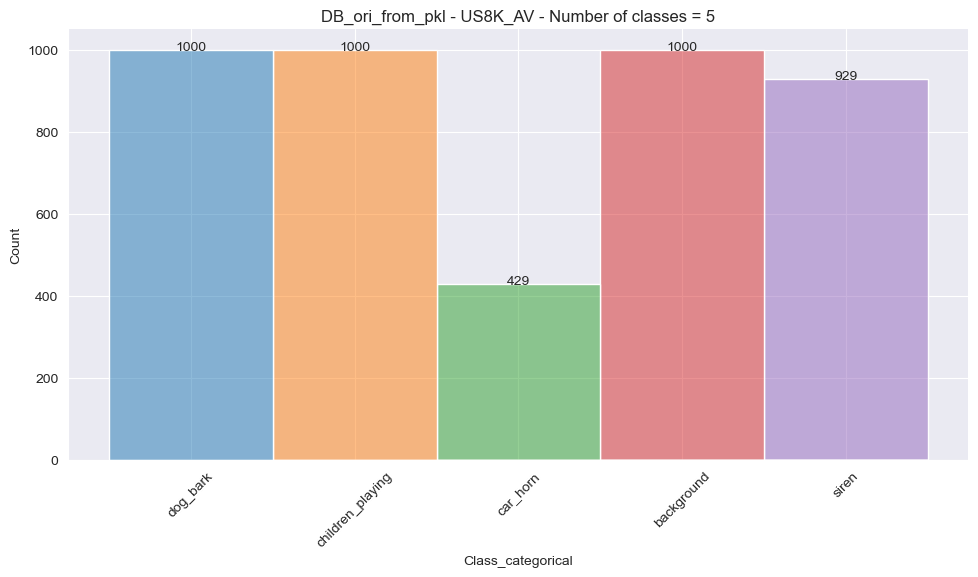

In [11]:
# Analysis of the class balancing

sns.set_style("darkgrid")
gTitle = 'DB_ori_from_pkl - ' + nom_dataset + ' - Number of classes = ' + str(len(pd.Series(DB_ori_from_pkl['Class_categorical']).unique()))
g = sns.displot(DB_ori_from_pkl,x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=45)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

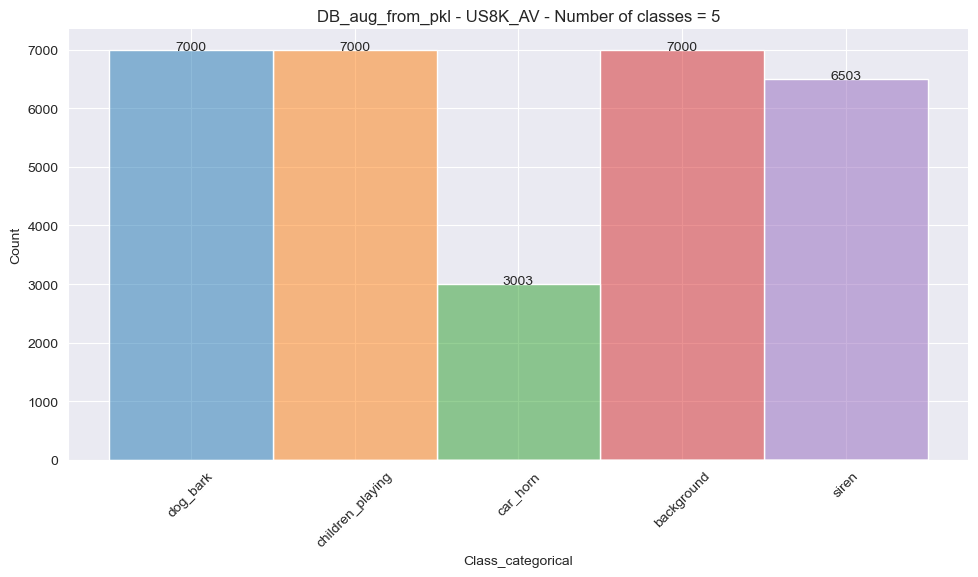

In [12]:
# Analysis of the class balancing

sns.set_style("darkgrid")
gTitle = 'DB_aug_from_pkl - ' + nom_dataset + ' - Number of classes = ' + str(len(pd.Series(DB_aug_from_pkl['Class_categorical']).unique()))
g = sns.displot(DB_aug_from_pkl,x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=45)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

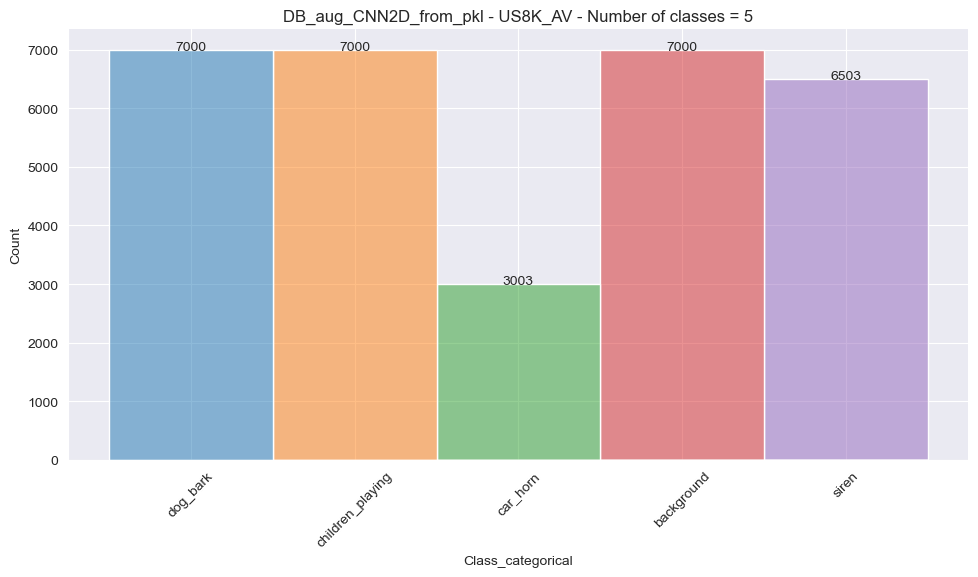

In [13]:
# Analysis of the class balancing

sns.set_style("darkgrid")
gTitle = 'DB_aug_CNN2D_from_pkl - ' + nom_dataset + ' - Number of classes = ' + str(len(pd.Series(DB_aug_CNN2D_from_pkl['Class_categorical']).unique()))
g = sns.displot(DB_aug_CNN2D_from_pkl,x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=45)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

In [14]:
# Group by the class and get one random sample of each class
k = DB_aug_from_pkl.groupby('Class_categorical')['Class_OHEV'].apply(lambda s: s.sample(1))
print(k)

# Convert the pandas series into a dataframe
temp_k_df = k.reset_index()

# Delete the index from the grouppby result
del temp_k_df['level_1']

# Set the "Class" as the dataframe index
temp_k_df.set_index("Class_categorical", inplace=True)

# Convert the dataframe to a dictionary (Class: Class_encoder)
encoder_dict = temp_k_df["Class_OHEV"].to_dict()
encoder_dict

Class_categorical       
background         21120    [1, 0, 0, 0, 0]
car_horn           26717    [0, 1, 0, 0, 0]
children_playing   859      [0, 0, 1, 0, 0]
dog_bark           27962    [0, 0, 0, 1, 0]
siren              3048     [0, 0, 0, 0, 1]
Name: Class_OHEV, dtype: object


{'background': array([1, 0, 0, 0, 0]),
 'car_horn': array([0, 1, 0, 0, 0]),
 'children_playing': array([0, 0, 1, 0, 0]),
 'dog_bark': array([0, 0, 0, 1, 0]),
 'siren': array([0, 0, 0, 0, 1])}

In [15]:
# Number of classes in the dataset

num_classes = len(encoder_dict.keys())
num_classes

5

In [16]:
# Name of the classes

nom_classes = list(encoder_dict.keys())

with open(os.path.join(path_arrays, 'nom_classes.csv'), 'w') as file:
    for value in nom_classes:
        file.write(value + '\n')

nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'siren']

In [17]:
# Retrieve the name of the classes

nom_classes = []
with open(os.path.join(path_arrays, 'nom_classes.csv'), 'r') as file:
    for line in file:
        nom_classes.append(line.strip())
nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'siren']

In [18]:
for col in DB_ori_from_pkl.columns:
    print(col)

Audio
Class_categorical
Class_OHEV
Fold
RMSE
ZCR
CENTROIDS
BANDWIDTH
ROLLOFF
MEL_1
MEL_2
MEL_3
MEL_4
MEL_5
MEL_6
MEL_7
MEL_8
MEL_9
MEL_10
MEL_11
MEL_12
MEL_13
MEL_14
MEL_15
MEL_16
MEL_17
MEL_18
MEL_19
MEL_20
MEL_21
MEL_22
MEL_23
MEL_24
MEL_25
MEL_26
MEL_27
MEL_28
MEL_29
MEL_30
MEL_31
MEL_32
MEL_33
MEL_34
MEL_35
MEL_36
MEL_37
MEL_38
MEL_39
MEL_40
MEL_41
MEL_42
MEL_43
MEL_44
MEL_45
MEL_46
MEL_47
MEL_48
MEL_49
MEL_50
MEL_51
MEL_52
MEL_53
MEL_54
MEL_55
MEL_56
MEL_57
MEL_58
MEL_59
MEL_60
MEL_61
MEL_62
MEL_63
MEL_64
MEL_65
MEL_66
MEL_67
MEL_68
MEL_69
MEL_70
MEL_71
MEL_72
MEL_73
MEL_74
MEL_75
MEL_76
MEL_77
MEL_78
MEL_79
MEL_80
MEL_81
MEL_82
MEL_83
MEL_84
MEL_85
MEL_86
MEL_87
MEL_88
MEL_89
MEL_90
MEL_91
MEL_92
MEL_93
MEL_94
MEL_95
MEL_96
MEL_97
MEL_98
MEL_99
MEL_100
MEL_101
MEL_102
MEL_103
MEL_104
MEL_105
MEL_106
MEL_107
MEL_108
MEL_109
MEL_110
MEL_111
MEL_112
MEL_113
MEL_114
MEL_115
MEL_116
MEL_117
MEL_118
MEL_119
MEL_120
MEL_121
MEL_122
MEL_123
MEL_124
MEL_125
MEL_126
MEL_127
MEL_128
MFCC_1


In [19]:
# Separate 1 fold for validation and create a DB for the training / testing

DB_ori_from_pkl_VAL = DB_ori_from_pkl[DB_ori_from_pkl['Fold'] == fold_name].copy()
DB_ori_from_pkl_TRN = DB_ori_from_pkl[DB_ori_from_pkl['Fold'] != fold_name].copy()

In [20]:
# Separate 1 fold for validation and create a DB for the training / testing

DB_aug_from_pkl_VAL = DB_aug_from_pkl[DB_aug_from_pkl['Fold'] == fold_name].copy()
DB_aug_from_pkl_TRN = DB_aug_from_pkl[DB_aug_from_pkl['Fold'] != fold_name].copy()

In [21]:
print(len(DB_ori_from_pkl_VAL))
print(len(DB_ori_from_pkl_TRN))
print('Total: ', len(DB_ori_from_pkl_VAL) + len(DB_ori_from_pkl_TRN),'\n')
print(len(DB_aug_from_pkl_VAL))
print(len(DB_aug_from_pkl_TRN))
print('Total: ', len(DB_aug_from_pkl_VAL) + len(DB_aug_from_pkl_TRN))

430
3928
Total:  4358 

3010
27496
Total:  30506


In [22]:
# Separating data and labels for training
X      = DB_aug_from_pkl_TRN.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
y_cat  = np.array(DB_aug_from_pkl_TRN.Class_categorical.to_list())
y_OHEV = np.array(DB_aug_from_pkl_TRN.Class_OHEV.to_list())

# Separating data and labels for validation
X_val      = DB_aug_from_pkl_VAL.drop(columns=['Audio','Class_categorical','Class_OHEV', 'Fold'])
y_val_cat  = np.array(DB_aug_from_pkl_VAL.Class_categorical.to_list())
y_OHEV_val = np.array(DB_aug_from_pkl_VAL.Class_OHEV.to_list())

In [23]:
type(X.at[1, 'RMSE'])

numpy.float64

In [24]:
# Select from normalization or standartization

def scaler(X: pd.DataFrame, X_val: pd.DataFrame, opc:int):
    opc = opc
    while str(opc) not in '12':
        print()
        print("1-) Normalization (Scaled from 0 to 1)")
        print("2-) Standartization (Standard deviation of 1)")

        opc = input("\nSelect the dataset: ")
        if opc.isdigit():
            opc = int(opc)
        else:
            opc = 0

    X_statistics = pd.DataFrame({'mean': X.mean(), 'std': X.std(), 'min': X.min(), 'max': X.max()})

    X_mean   = X_statistics.values[:, 0]
    X_std    = X_statistics.values[:, 1]
    X_min    = X_statistics.values[:, 2]
    X_max    = X_statistics.values[:, 3]
    
    # Save Min, Max, Mean and standard deviation to be used in the next notebooks

    X_mean.tofile(os.path.join(path_arrays, 'X_train_mean.csv'), sep=',')
    X_std.tofile(os.path.join(path_arrays,  'X_train_std.csv'),  sep=',')
    X_min.tofile(os.path.join(path_arrays,  'X_train_min.csv'),  sep=',')
    X_max.tofile(os.path.join(path_arrays,  'X_train_max.csv'),  sep=',')
        
    if opc == 1:
        X_train_norm = (X.values - X_min) / (X_max - X_min)
        X_val_norm   = (X_val.values - X_min) / (X_max - X_min)
        batch_type    = '_norm'
        print(f'\nX_train_norm shape...:{X_train_norm.shape}')
        print(f'X_val_norm shape.....:{X_val_norm.shape}\n')

    elif opc == 2:
        X_train_norm = (X.values - X_mean) / X_std
        X_val_norm   = (X_val.values - X_mean) / X_std
        batch_type    = '_std'
        print(f'\nX_train_norm shape...:{X_train_norm.shape}')
        print(f'X_val_norm shape.....:{X_val_norm.shape}\n')
            
    return X_train_norm, X_val_norm

In [25]:
X_norm, X_val_norm = scaler(X, X_val, 1)


X_train_norm shape...:(27496, 375)
X_val_norm shape.....:(3010, 375)



In [26]:
RMSE_lst = []
for i in X_norm:
    RMSE_lst.append([i][0][0])
    
print(np.mean(RMSE_lst))

0.08779795319423672


In [27]:
X_t= X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_t.describe()

RMSE           ZCR     CENTROIDS     BANDWIDTH  ...  TONNETZ_std_6  TONNETZ_median_6  TONNETZ_skew_6  TONNETZ_kurtosis_6
count  27496.000000  27496.000000  27496.000000  27496.000000  ...   27496.000000      27496.000000    27496.000000        27496.000000
mean       0.087798      0.173688      0.256450      0.378917  ...       0.099956          0.395129        0.578798            0.069517
std        0.093580      0.117800      0.133928      0.139132  ...       0.088276          0.067473        0.072283            0.046378
min        0.000000      0.000000      0.000000      0.000000  ...       0.000000          0.000000        0.000000            0.000000
25%        0.025530      0.101113      0.165673      0.276386  ...       0.052194          0.362705        0.535161            0.042750
50%        0.056446      0.147041      0.232181      0.367313  ...       0.076216          0.394680        0.577393            0.059358
75%        0.117743      0.203369      0.308281      0.467391  ...       0.117657          0.427130        0.620565            0.082411
max        1.000000      1.000000      1.000000      1.000000  ...       1.000000          1.000000        1.000000            1.000000

[8 rows x 375 columns]

In [28]:
X_t['RMSE'].mean()

0.08779795319423672

In [29]:
X_std, X_val_std = scaler(X, X_val, 2)


X_train_norm shape...:(27496, 375)
X_val_norm shape.....:(3010, 375)



In [30]:
RMSE_lst2 = []
for i in X_std:
    RMSE_lst2.append([i][0][0])
    
print(np.mean(RMSE_lst2))

-8.269336465057902e-18


In [31]:
X_t2= X.apply(lambda x: (x - x.mean()) / x.std())
X_t2.describe()

RMSE           ZCR     CENTROIDS     BANDWIDTH  ...  TONNETZ_std_6  TONNETZ_median_6  TONNETZ_skew_6  TONNETZ_kurtosis_6
count  2.749600e+04  2.749600e+04  2.749600e+04  2.749600e+04  ...   2.749600e+04      2.749600e+04    27496.000000        2.749600e+04
mean  -8.269336e-18 -5.788536e-17  1.488481e-16 -5.126989e-16  ...   5.168335e-17     -2.144859e-17        0.000000       -1.033667e-17
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  ...   1.000000e+00      1.000000e+00        1.000000        1.000000e+00
min   -9.382175e-01 -1.474433e+00 -1.914828e+00 -2.723426e+00  ...  -1.132315e+00     -5.856130e+00       -8.007378       -1.498921e+00
25%   -6.654041e-01 -6.160890e-01 -6.778024e-01 -7.369316e-01  ...  -5.410548e-01     -4.805513e-01       -0.603696       -5.771418e-01
50%   -3.350271e-01 -2.262003e-01 -1.812077e-01 -8.340514e-02  ...  -2.689247e-01     -6.645925e-03       -0.019429       -2.190398e-01
75%    3.199957e-01  2.519650e-01  3.870092e-01  6.358991e-01  ...   2.005251e-01      4.742897e-01        0.577832        2.780233e-01
max    9.747881e+00  7.014547e+00  5.551850e+00  4.463971e+00  ...   1.019584e+01      8.964689e+00        5.827128        2.006315e+01

[8 rows x 375 columns]

In [32]:
X_t2['RMSE'].mean()

-8.269336465057902e-18

In [33]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [34]:
# Plot the confusion matrix

def plot_confusion_matrix(y_test_enc, y_pred_saved, score_saved, cmap, model_name, ax=None, savepic = True):
    
    picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'
    
    if type(score_saved) == list:
        score = score_saved[1]
    else:
        score = score_saved
    
    conf_matrix = metrics.confusion_matrix(y_test_enc, y_pred_saved)
    title = nom_dataset + ' - ' + model_name[:-17] + ' (best model) - Highest accuracy validation: '+ str("{:0.2f}%".format(score*100))

    if ax is None:
        plt.figure(figsize = (10,10))
        ax = plt.gca()
        
    sns.heatmap(conf_matrix, 
                annot=True, 
                fmt='g', 
                cmap=cmap_cm, 
                annot_kws={"size": 12}, 
                xticklabels=nom_classes, 
                yticklabels=nom_classes,
                ax=ax)
    ax.set_title(title, fontsize = 14)
    
    if savepic:
        plt.savefig(os.path.join(path_pic, picture_name))

In [35]:
print(X_std.shape)
print(y_OHEV.shape)
print(y_cat.shape)
print("=====================")
print(X_val_std.shape)
print(y_OHEV_val.shape)
print(y_val_cat.shape)

(27496, 375)
(27496, 5)
(27496,)
(3010, 375)
(3010, 5)
(3010,)


In [36]:
print(X_norm.shape)
print(y_OHEV.shape)
print(y_cat.shape)
print("=====================")
print(X_val_norm.shape)
print(y_OHEV_val.shape)
print(y_val_cat.shape)

(27496, 375)
(27496, 5)
(27496,)
(3010, 375)
(3010, 5)
(3010,)


In [37]:
# Retrieve the indexes used for training the classifiers in the notebook 04_ML_modeling.ipynb

idx_trn = np.genfromtxt(os.path.join(path_models,  '_idx_trn_US8K_AV_windowed.csv'), delimiter=',', dtype = int)
idx_tst = np.genfromtxt(os.path.join(path_models,  '_idx_tst_US8K_AV_windowed.csv'), delimiter=',', dtype = int)

In [38]:
idx_trn

array([ 5221, 26886, 26007, ...,  1207, 16801, 16613])

In [39]:
idx_tst

array([12980,  2697, 15451, ...,  5356, 21051, 12598])

In [40]:
X_train     = X_norm[idx_trn]
X_test      = X_norm[idx_tst]
X_trainS    = X_std[idx_trn]
X_testS     = X_std[idx_tst]
y_train     = y_OHEV[idx_trn]
y_test      = y_OHEV[idx_tst]
y_train_cat = y_cat[idx_trn]
y_test_cat  = y_cat[idx_tst]

In [41]:
print(f'Training data norm.....: {X_train.shape}')
print(f'Training data std......: {X_trainS.shape}')
print(f'Training label.........: {y_train.shape}')
print(f'Training label catg....: {y_train_cat.shape}')
print("========================================")
print(f'Testing data norm......: {X_test.shape}')
print(f'Testing data std.......: {X_testS.shape}')
print(f'Testing label..........: {y_test.shape}')
print(f'Testing label catg.....: {y_test_cat.shape}')
print("========================================")
print(f'Validation data norm...: {X_val_norm.shape}')
print(f'Validation data std....: {X_val_std.shape}')
print(f'Validation label.......: {y_OHEV_val.shape}')
print(f'Validation label catg..: {y_val_cat.shape}')
print("========================================")


Training data norm.....: (24746, 375)
Training data std......: (24746, 375)
Training label.........: (24746, 5)
Training label catg....: (24746,)
Testing data norm......: (2750, 375)
Testing data std.......: (2750, 375)
Testing label..........: (2750, 5)
Testing label catg.....: (2750,)
Validation data norm...: (3010, 375)
Validation data std....: (3010, 375)
Validation label.......: (3010, 5)
Validation label catg..: (3010,)


In [42]:
# For OHEV

Counter_test     = Counter(map(tuple, y_test))
Counter_test_cat = Counter(y_test_cat)
Counter_train    = Counter(map(tuple, y_train))

In [43]:
print('Training samples')
Counter_train

Training samples


Counter({(0, 0, 0, 0, 1): 5311,
         (0, 0, 0, 1, 0): 5670,
         (0, 1, 0, 0, 0): 2476,
         (0, 0, 1, 0, 0): 5670,
         (1, 0, 0, 0, 0): 5619})

In [44]:
print('Testing samples')
Counter_test

Testing samples


Counter({(1, 0, 0, 0, 0): 625,
         (0, 0, 0, 1, 0): 630,
         (0, 1, 0, 0, 0): 275,
         (0, 0, 1, 0, 0): 630,
         (0, 0, 0, 0, 1): 590})

In [45]:
print('Testing samples')
Counter_test_cat

Testing samples


Counter({'background': 625,
         'dog_bark': 630,
         'car_horn': 275,
         'children_playing': 630,
         'siren': 590})

In [46]:
n_dim = X_train.shape[1]
n_dim

375

In [47]:
# Separate 1 fold for validation and create a DB for the training / testing CNN2D

DB_aug_from_pkl_VAL_CNN2D = DB_aug_CNN2D_from_pkl[DB_aug_CNN2D_from_pkl['Fold'] == fold_name].copy()
DB_aug_from_pkl_TRN_CNN2D = DB_aug_CNN2D_from_pkl[DB_aug_CNN2D_from_pkl['Fold'] != fold_name].copy()

In [48]:
print(f'dbComplete_VAL size..: {str(len(DB_aug_from_pkl_VAL_CNN2D))}')
print(f'dbComplete size......: {str(len(DB_aug_from_pkl_TRN_CNN2D))}')

dbComplete_VAL size..: 3010
dbComplete size......: 27496


In [49]:
X_val_CNN2D   = DB_aug_from_pkl_VAL_CNN2D['features'].to_numpy()
y_val_CNN2D   = np.array(DB_aug_from_pkl_VAL_CNN2D.Class_OHEV.to_list())
X_train_CNN2D = DB_aug_from_pkl_TRN_CNN2D['features'].to_numpy()
y_train_CNN2D = np.array(DB_aug_from_pkl_TRN_CNN2D.Class_OHEV.to_list())
print(f'X_train antes do stack...........: {len(X_train_CNN2D)}')
print(f'Shape do X_train antes do stack..: {X_train_CNN2D.shape}')

X_train antes do stack...........: 27496
Shape do X_train antes do stack..: (27496,)


In [50]:
X_val_CNN2D   = np.stack(X_val_CNN2D)
X_train_CNN2D = np.stack(X_train_CNN2D)

In [51]:
print(f'X_train depis do stack...........: {len(X_train_CNN2D)}')
print(f'Shape do X_train depois do stack..: {X_train_CNN2D.shape}')

X_train depis do stack...........: 27496
Shape do X_train depois do stack..: (27496, 180, 44, 1)


In [52]:
# Passing all elements as float32
X_train_CNN2D = np.asarray(X_train_CNN2D).astype(np.float32)
y_train_CNN2D = np.asarray(y_train_CNN2D).astype(np.float32)
X_val_CNN2D   = np.asarray(X_val_CNN2D).astype(np.float32)
y_val_CNN2D   = np.asarray(y_val_CNN2D).astype(np.float32)

In [53]:
X_train_CNN2D_final = X_train_CNN2D[idx_trn]
X_test_CNN2D        = X_train_CNN2D[idx_tst]
y_train_CNN2D_final = y_train_CNN2D[idx_trn]
y_test_CNN2D        = y_train_CNN2D[idx_tst]

In [54]:
print(f'X_train_CNN2D_final shape..: {np.shape(X_train_CNN2D_final)}')
print(f'y_train_CNN2D_final shape..: {np.shape(y_train_CNN2D_final)}')
print(f'X_test_CNN2D shape.........: {np.shape(X_test_CNN2D)}')
print(f'y_test_CNN2D shape.........: {np.shape(y_test_CNN2D)}')
print(f'X_val_CNN2D shape..........: {np.shape(X_val_CNN2D)}')
print(f'y_val_CNN2D shape..........: {np.shape(y_val_CNN2D)}')

X_train_CNN2D_final shape..: (24746, 180, 44, 1)
y_train_CNN2D_final shape..: (24746, 5)
X_test_CNN2D shape.........: (2750, 180, 44, 1)
y_test_CNN2D shape.........: (2750, 5)
X_val_CNN2D shape..........: (3010, 180, 44, 1)
y_val_CNN2D shape..........: (3010, 5)


### BEFORE STARTING

To avoid misuse of the previous saved models, before starting, copy the following files used for training the classifiers considering the fold 1 as the validation set to the folder:

**_ESR\Saved_models_fold_1_validation**

* Model_ANN_weights_0_best_norm_windowed.hdf5
* Model_CNN_1D_weights_0_best_norm_windowed.hdf5
* Model_CNN_2D_weights_0_best_windowed.hdf5
* Model_Forest_norm_windowed.pkl
* Model_LogisticR_norm_windowed.pkl
* Model_SVC_norm_windowed.pkl

### Train / Test / Validation sets according classifiers

The train / test split was carried out to confirm the results from the previous notebook. For simplicity, this checking was omitted in this notebook and only the validation sets were explicitly confirmed.

**MLP, CNN1D**
   
* X_trainN    
* X_testN  
* y_train     
* y_test
* X_val_norm
* y_val

**LR, SVC, RF**

* X_trainN    
* X_testN  
* y_train_cat 
* y_test_cat 
* X_val_norm
* y_val_cat

**CNN2D**

* X_train_CNN2D_final
* X_test_CNN2D
* y_train_CNN2D_final 
* y_test_CNN2D
* X_val_CNN2D
* y_val_CNN2D

## Partial conclusion presented in the qualification exam

* Despite not being the main focus of this study, in at least one of the proposed models, the accuracy surpassed the benchmark of the selected datasets;

* The custom dataset US8K_AV achieved an average accuracy of 81% to 82% using LR, MLP and 1D CNN;

* Principal Component Analysis (PCA) resulted in an average reduction of 50% or more in the number of attributes without significantly affecting the accuracy of the classifiers;

* The inclusion of Mutual Information resulted in a significant increase in the accuracy of the Random Forest classifier, additionally there was an average reduction of 50% in the number of attributes and therefore this classifier will continue to be analyzed in the next stages;

* In light of the advantages derived from the 1-second response time, the utilization of the window technique has demonstrated a constrained impact on accuracy and will be the established as the only technique to continue to be investigated.

### Models to be investigated (for training: all windowed)

* LR - Logistic Regression with **standardized** (Accuracy: 80.43% +/- 2.54%). 
    * Best folds 2, 1, 10, 8.
* RF - Random Forest with **un-normalized Mutual Information** (Accuracy 80.50% +/-3.28%). Non-windowed validation set. 
    * Best folds 1, 6, 2, 3.
* MLP - Multilayer Perceptron with **standardized** (Accuracy: 81.24% +/-2.96%). 
    * Best folds 9, 3, 1, 5.
* CNN_1D - Convolution Neural Network 1D with **standardized** (Accuracy: 80.44% +/- 3.58%). 
    * Best folds 9, 1, 8, 5.
* CNN_2D - Convolution Neural Network 2D **Log-Mel agg with delta** (Accuracy: 80.76% +/- 2.59%). 
    * Best folds 3, 9, 1, 6.

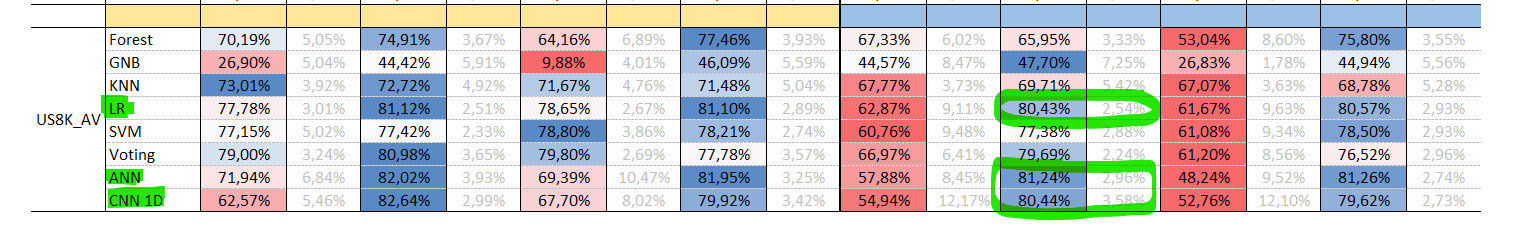

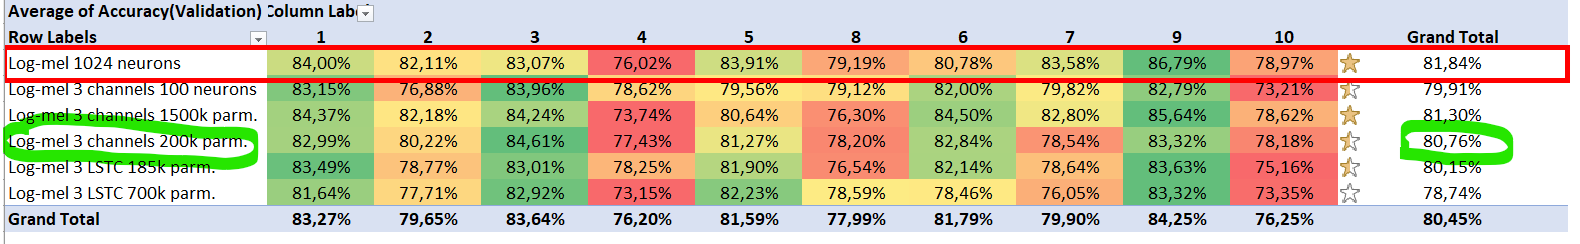

The "Log-mel 1024 neurons" and "Log-mel 3 channels 1500h param." models wer not choosen give its huge numbers of parameters (15.5M and 1.5M respectively). The third best model was defined instead as a compromise between accuracy and size.

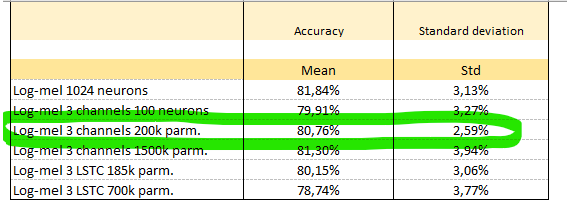


***
For the next steps, the fold 1 will be chosen as the validation set given it's presence in all selected classifiers.

* Fold 1 samples (validation): 2,968
* Training samples: 27,538 (24,784 training / 2,754 testing)
* Total:  30,506

***

## Checking the results with the classifiers saved models

### SVC - Expected results for fold 1 validation: 81.36% 

### SVC - Expected results for fold 1 validation based on k-fold cross-validation: 81.83% 

Images from the file: 04_ML_modeling.ipynb

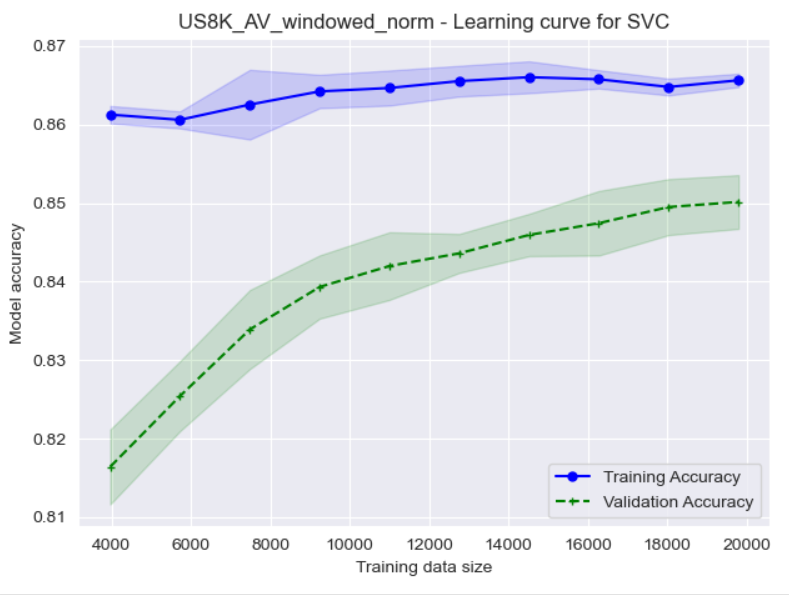
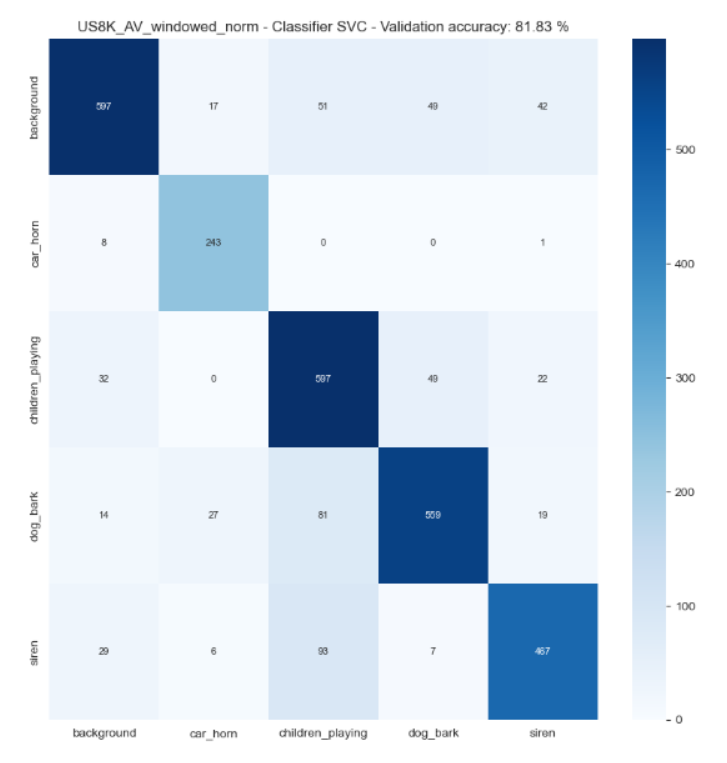

In [55]:
# Load the classifier from file

with open(os.path.join(path_modelsVal, 'Model_SVC_norm_windowed.pkl'), 'rb') as file:
    SVC_c_saved = pickle.load(file)

In [56]:
score_SVC_c_saved = SVC_c_saved.score(X_val_norm, y_val_cat)
print("Test score (R2): {0:.2f} %".format(100 * score_SVC_c_saved))

Test score (R2): 81.83 %


In [57]:
score_SVC_c_saved

0.8182724252491694

In [58]:
t_srt                   = time.perf_counter_ns()
SVC_c_saved_predict_val = SVC_c_saved.predict(X_val_norm)
t_end                   = time.perf_counter_ns()
proc_time               = ((t_end - t_srt) / 1000000)

print(SVC_c_saved_predict_val)
print(f'\nNumber of predicted samples..: {len(X_val_norm)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_norm),6)}ms')

['dog_bark' 'dog_bark' 'dog_bark' ... 'car_horn' 'car_horn' 'car_horn']

Number of predicted samples..: 3010
Total predicting time:.......: 7188.9954ms
Predicting time per sample...: 2.388371ms


In [59]:
SVC_c_saved_val_class_report = metrics.classification_report(y_val_cat, 
                                                             SVC_c_saved_predict_val, 
                                                             target_names = nom_classes, 
                                                             output_dict = False)
print(SVC_c_saved_val_class_report)

                  precision    recall  f1-score   support

      background       0.88      0.79      0.83       756
        car_horn       0.83      0.96      0.89       252
children_playing       0.73      0.85      0.78       700
        dog_bark       0.84      0.80      0.82       700
           siren       0.85      0.78      0.81       602

        accuracy                           0.82      3010
       macro avg       0.82      0.84      0.83      3010
    weighted avg       0.82      0.82      0.82      3010



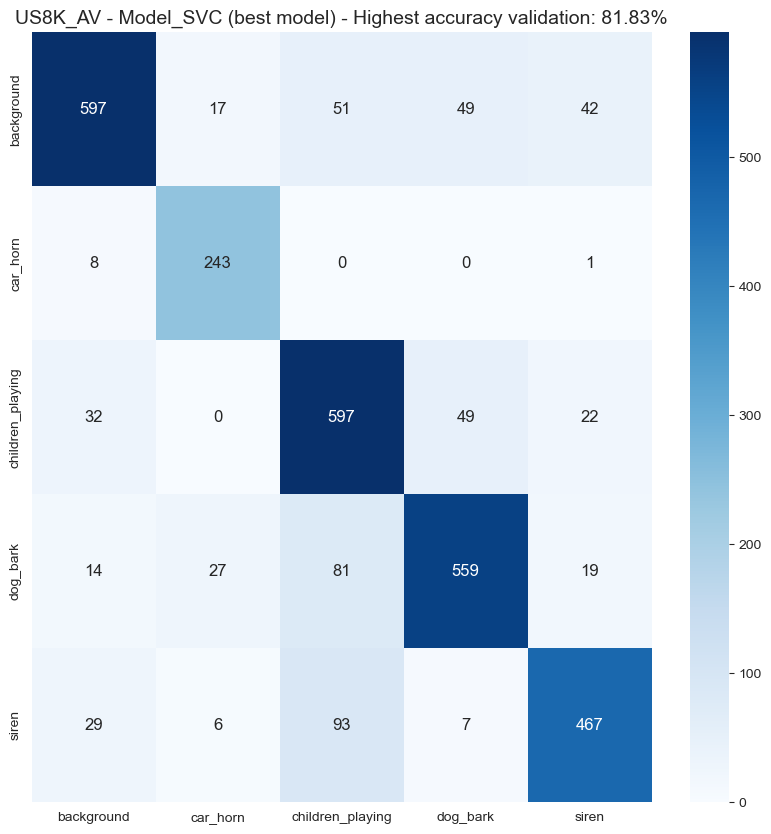

In [60]:
plot_confusion_matrix(y_val_cat, 
                      SVC_c_saved_predict_val, 
                      score_SVC_c_saved, 
                      cmap_cm, 
                      'Model_SVC_confusion_matrix',
                      ax = None,
                      savepic = True)

### LR - Expected results for fold 1 validation: 81.89% 

### LR - Expected results for fold 1 validation based on k-fold cross-validation: 81.99% 

Images from the file: 04_ML_modeling.ipynb

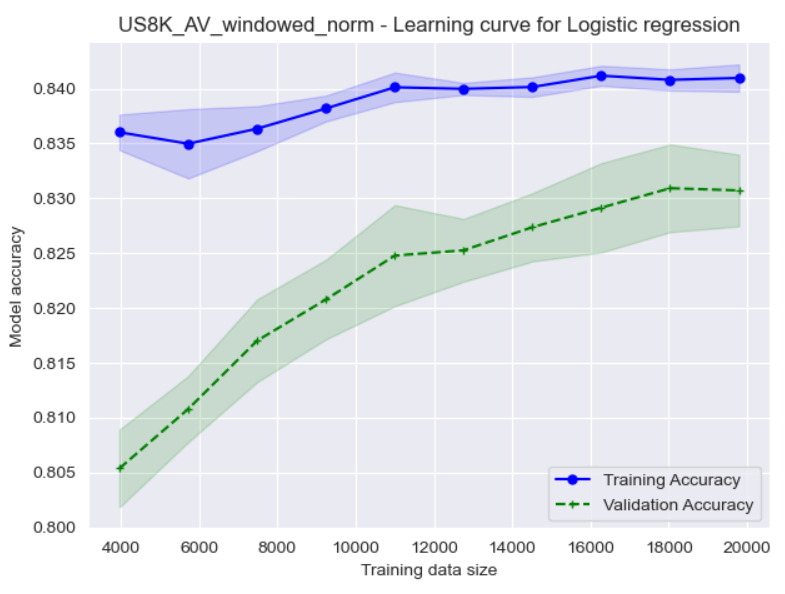
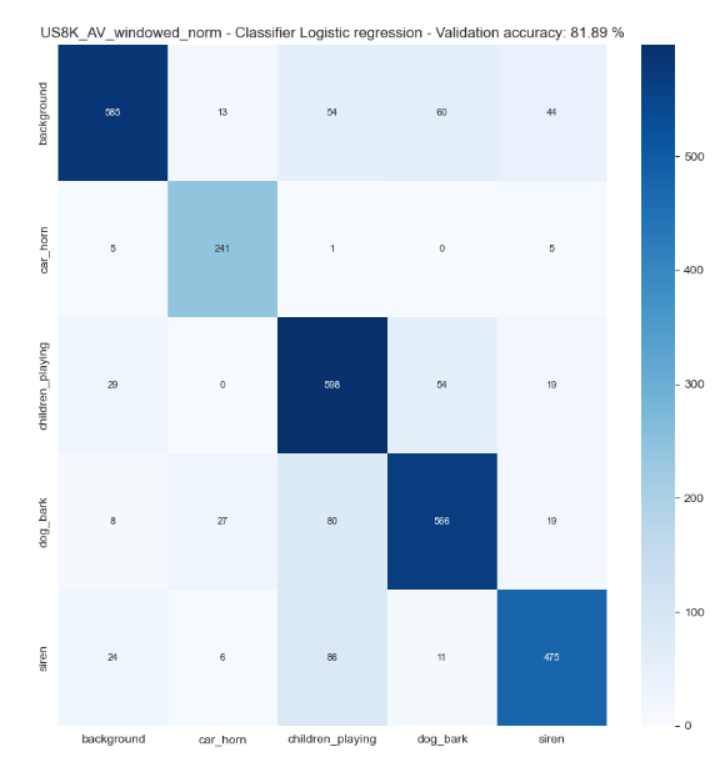

In [61]:
# Load the classifier from file

with open(os.path.join(path_modelsVal, 'Model_LogisticR_norm_windowed.pkl'), 'rb') as file:
    LR_c_saved = pickle.load(file)

In [62]:
score_LR_c_saved = LR_c_saved.score(X_val_norm, y_val_cat)
print("Test score (R2): {0:.2f} %".format(100 * score_LR_c_saved))

Test score (R2): 81.89 %


In [63]:
score_LR_c_saved

0.8189368770764119

In [64]:
t_srt                  = time.perf_counter_ns()
LR_c_saved_predict_val = LR_c_saved.predict(X_val_norm)
t_end                  = time.perf_counter_ns()
proc_time              = ((t_end - t_srt) / 1000000)

print(LR_c_saved_predict_val)
print(f'\nNumber of predicted samples..: {len(X_val_norm)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_norm),6)}ms')

['dog_bark' 'dog_bark' 'dog_bark' ... 'car_horn' 'car_horn' 'car_horn']

Number of predicted samples..: 3010
Total predicting time:.......: 4.2578ms
Predicting time per sample...: 0.001415ms


In [65]:
for i in LR_c_saved_predict_val:
    print(i)

dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
children_playing
background
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
children_playing
children_playing
dog_bark
children_playing
children_playing
dog_bark
children_playing
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
children_playing
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background
background

In [66]:
LR_c_saved_val_class_report = metrics.classification_report(y_val_cat, 
                                                            LR_c_saved_predict_val, 
                                                            target_names = nom_classes, 
                                                            output_dict = False)
print(LR_c_saved_val_class_report)

                  precision    recall  f1-score   support

      background       0.90      0.77      0.83       756
        car_horn       0.84      0.96      0.89       252
children_playing       0.73      0.85      0.79       700
        dog_bark       0.82      0.81      0.81       700
           siren       0.85      0.79      0.82       602

        accuracy                           0.82      3010
       macro avg       0.83      0.84      0.83      3010
    weighted avg       0.83      0.82      0.82      3010



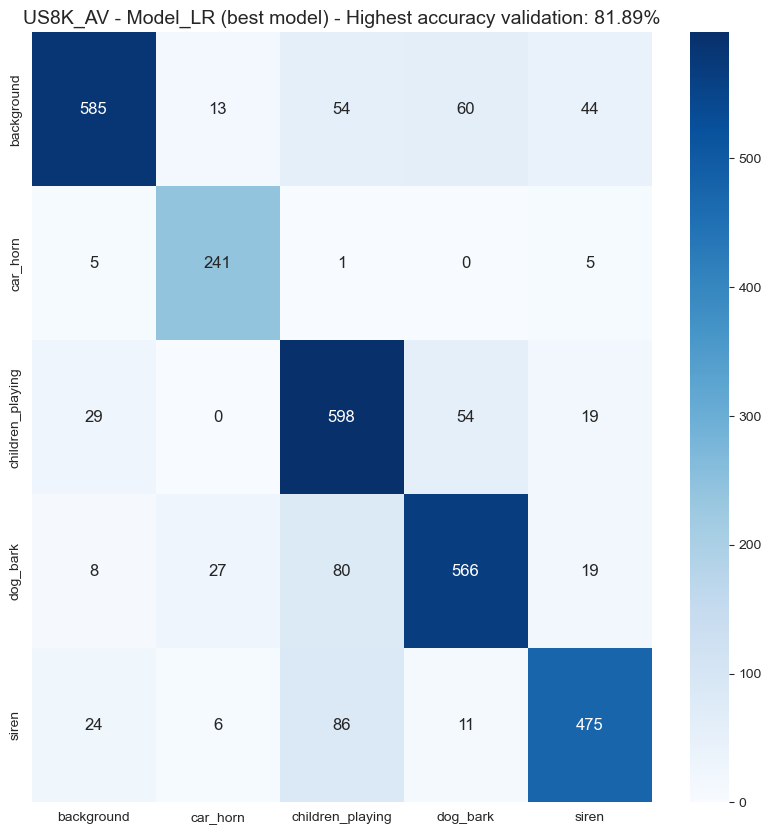

In [67]:
plot_confusion_matrix(y_val_cat, 
                      LR_c_saved_predict_val, 
                      score_LR_c_saved, 
                      cmap_cm, 
                      'Model_LR_confusion_matrix',
                      ax = None,
                      savepic = True)

### RF - Expected results for fold 1 validation: 80.56% 

### RF - Expected results for fold 1 validation based on k-fold cross-validation: 80.10% 

Images from the file: 04_ML_modeling.ipynb

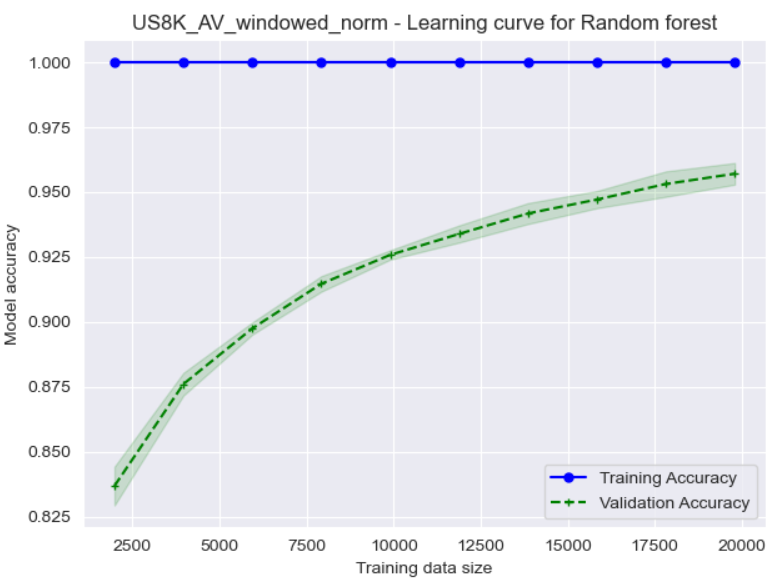
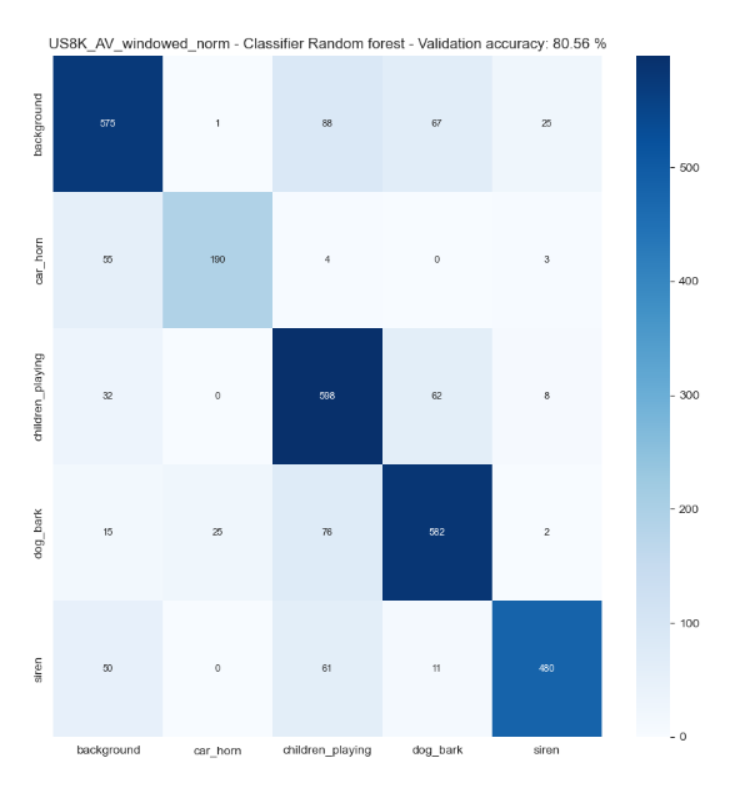

In [68]:
# Load the classifier from file

with open(os.path.join(path_modelsVal,  'Model_Forest_norm_windowed.pkl'), 'rb') as file:
    RF_c_saved = pickle.load(file)

In [69]:
score_RF_c_saved = RF_c_saved.score(X_val_norm, y_val_cat)
print("Test score (R2): {0:.2f} %".format(100 * score_RF_c_saved))

Test score (R2): 80.56 %


In [70]:
score_RF_c_saved

0.8056478405315615

In [71]:
t_srt                  = time.perf_counter_ns()
RF_c_saved_predict_val = RF_c_saved.predict(X_val_norm)
t_end                  = time.perf_counter_ns()
proc_time              = ((t_end - t_srt) / 1000000)

print(RF_c_saved_predict_val)
print(f'\nNumber of predicted samples..: {len(X_val_norm)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_norm),6)}ms')

['dog_bark' 'dog_bark' 'dog_bark' ... 'background' 'background'
 'background']

Number of predicted samples..: 3010
Total predicting time:.......: 262.6687ms
Predicting time per sample...: 0.087265ms


In [72]:
RF_c_saved_val_class_report = metrics.classification_report(y_val_cat, 
                                                            RF_c_saved_predict_val, 
                                                            target_names = nom_classes, 
                                                            output_dict = False)
print(RF_c_saved_val_class_report)

                  precision    recall  f1-score   support

      background       0.79      0.76      0.78       756
        car_horn       0.88      0.75      0.81       252
children_playing       0.72      0.85      0.78       700
        dog_bark       0.81      0.83      0.82       700
           siren       0.93      0.80      0.86       602

        accuracy                           0.81      3010
       macro avg       0.83      0.80      0.81      3010
    weighted avg       0.81      0.81      0.81      3010



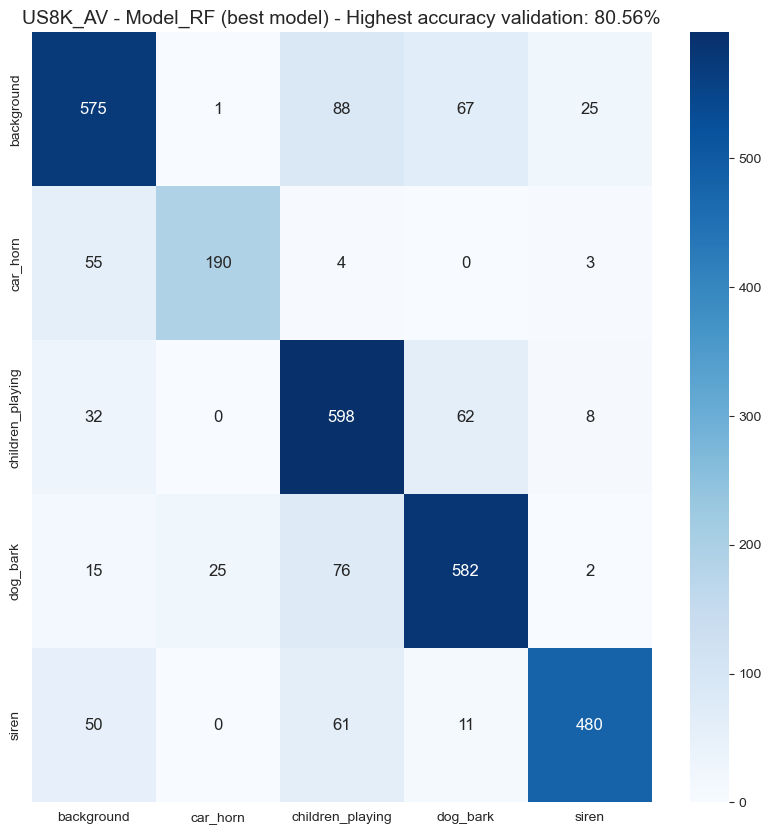

In [73]:
plot_confusion_matrix(y_val_cat, 
                      RF_c_saved_predict_val, 
                      score_RF_c_saved, 
                      cmap_cm, 
                      'Model_RF_confusion_matrix',
                      ax = None,
                      savepic = True)

### MLP - Expected results for fold 1 validation: 82.19% 

### MLP - Expected results for fold 1 validation based on k-fold cross-validation: 80.73% 

Images from the file: 04_ML_modeling.ipynb

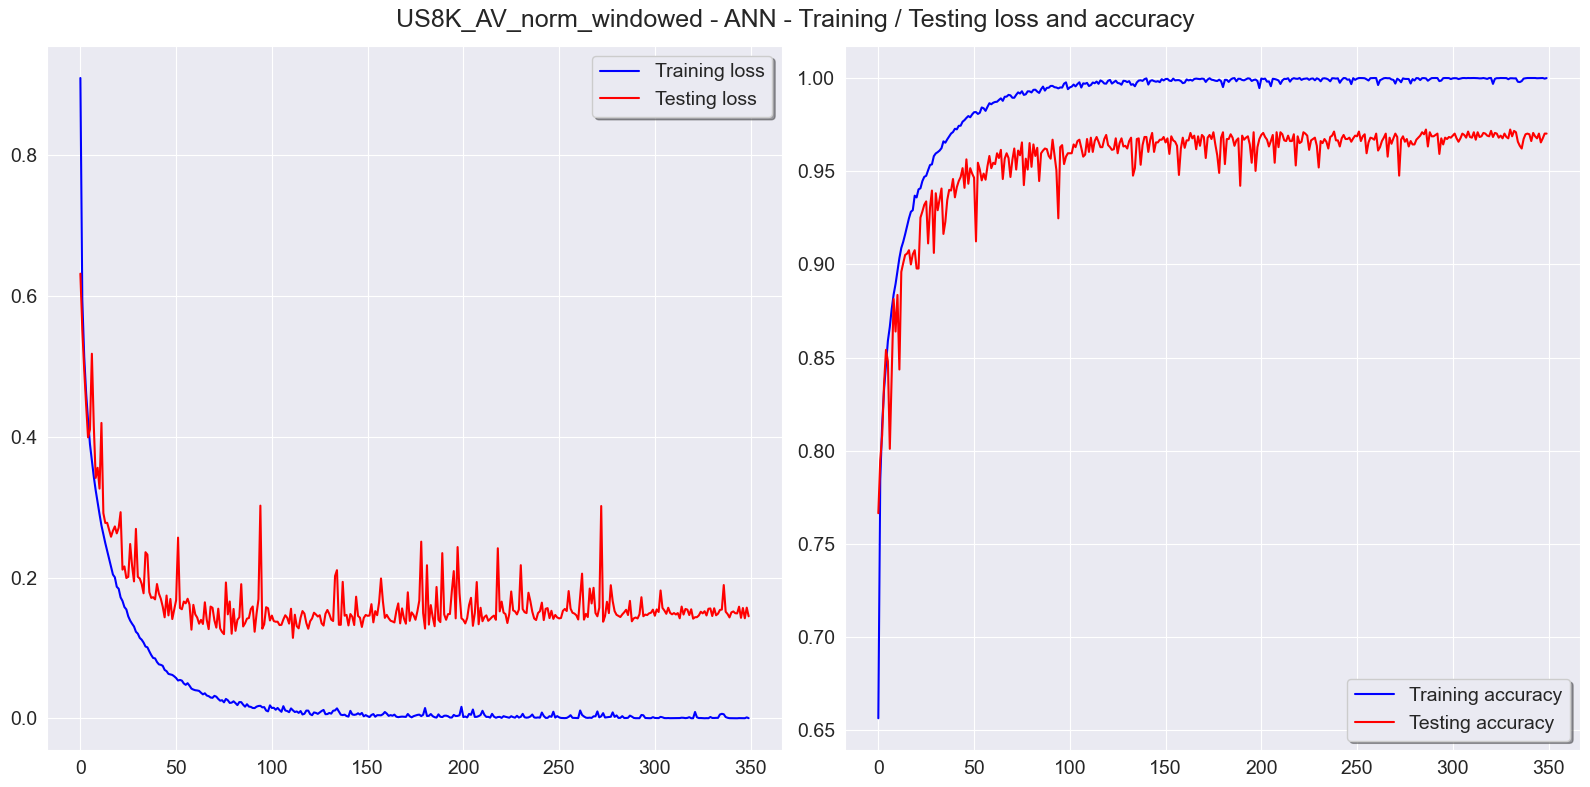
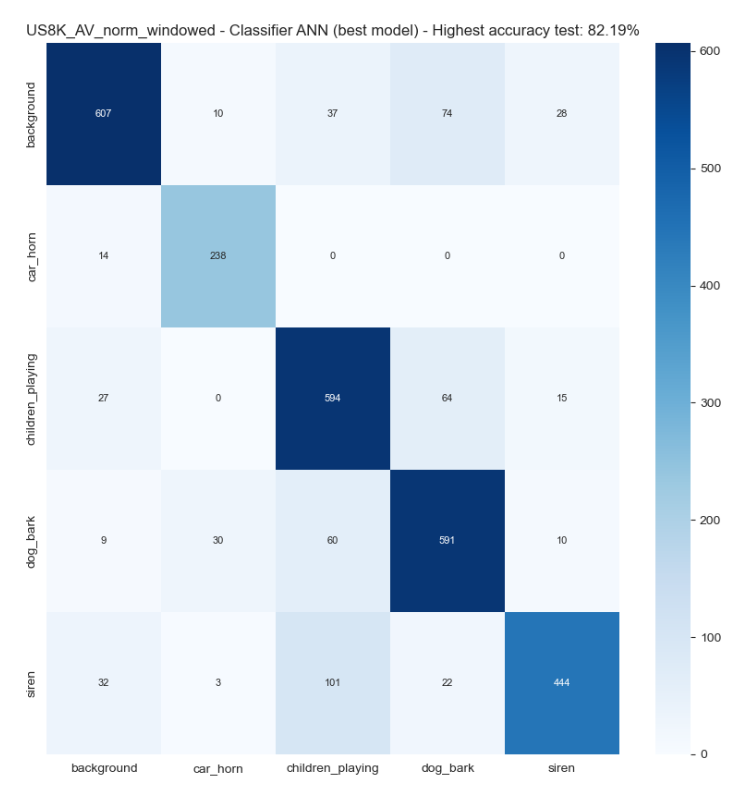

In [74]:
# Load the model with the highest accuracy

model_ANN_saved = load_model(os.path.join(path_modelsVal,  'Model_ANN_weights_0_best_norm_windowed.hdf5'))
model_ANN_saved.summary()

Model: "ANN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 375)               141000    
_________________________________________________________________
Hiden_1 (Dense)              (None, 375)               141000    
_________________________________________________________________
Dropout_1 (Dropout)          (None, 375)               0         
_________________________________________________________________
Hiden_2 (Dense)              (None, 750)               282000    
_________________________________________________________________
Dropout_2 (Dropout)          (None, 750)               0         
_________________________________________________________________
Output (Dense)               (None, 5)                 3755      
Total params: 567,755
Trainable params: 567,755
Non-trainable params: 0
_______________________________________________________

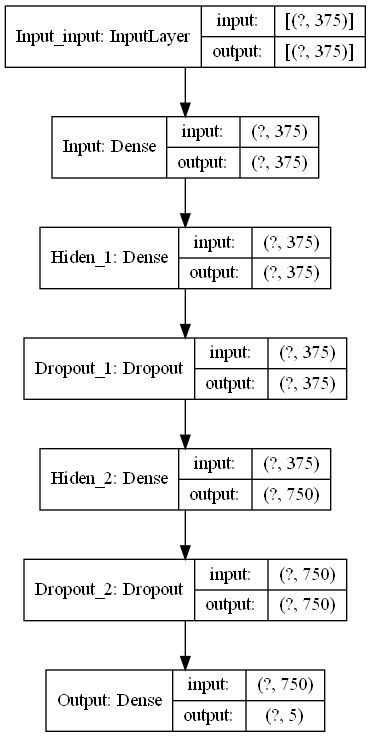

In [75]:
tf.keras.utils.plot_model(model_ANN_saved,  show_shapes=True)

In [76]:
score_ANN_saved = model_ANN_saved.evaluate(X_val_norm, y_OHEV_val, verbose=1, batch_size = 32)
print('Test loss:', score_ANN_saved[0])
print('Test accuracy:', score_ANN_saved[1])

95/95 [==============================] - 0s 2ms/step - loss: 2.5394 - accuracy: 0.8219
Test loss: 2.539357900619507
Test accuracy: 0.8219268918037415


In [77]:
score_ANN_saved[1]

0.8219268918037415

In [78]:
t_srt            = time.perf_counter_ns()
y_pred_ANN_saved = np.argmax(model_ANN_saved.predict(X_val_norm),axis=1)
t_end            = time.perf_counter_ns()
proc_time        = ((t_end - t_srt) / 1000000)

print(y_pred_ANN_saved)
print(f'\nNumber of predicted samples..: {len(X_val_norm)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_norm),6)}ms')

[3 3 3 ... 0 0 0]

Number of predicted samples..: 3010
Total predicting time:.......: 236.1529ms
Predicting time per sample...: 0.078456ms


In [79]:
y_test_enc = np.argmax(y_OHEV_val, axis=1)
y_test_enc

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [80]:
metrics_set_ANN = classification_report(y_test_enc, y_pred_ANN_saved, target_names=nom_classes)
print(metrics_set_ANN)

                  precision    recall  f1-score   support

      background       0.88      0.80      0.84       756
        car_horn       0.85      0.94      0.89       252
children_playing       0.75      0.85      0.80       700
        dog_bark       0.79      0.84      0.81       700
           siren       0.89      0.74      0.81       602

        accuracy                           0.82      3010
       macro avg       0.83      0.84      0.83      3010
    weighted avg       0.83      0.82      0.82      3010



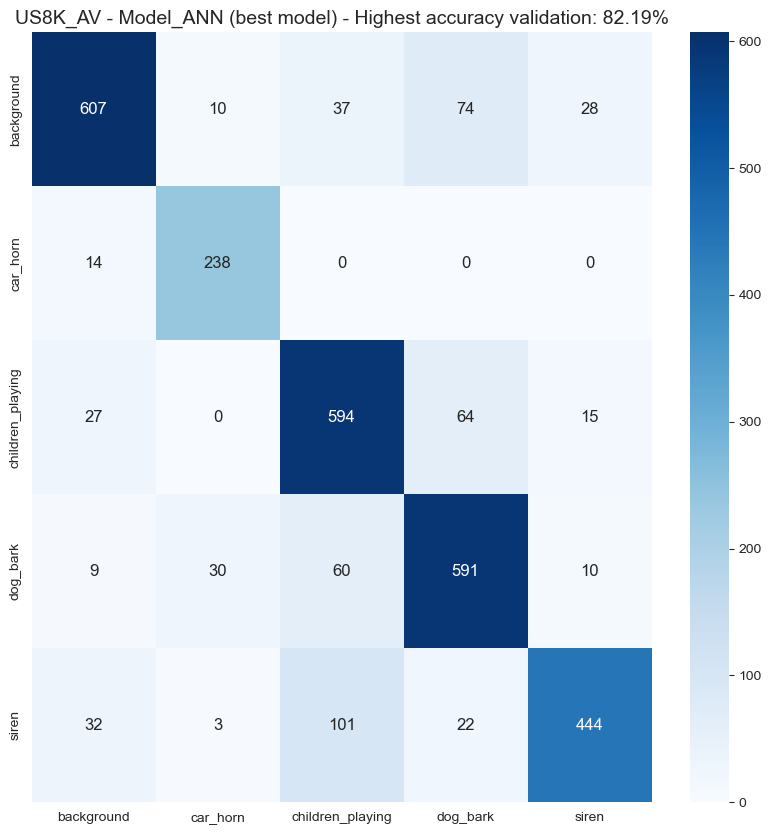

In [81]:
plot_confusion_matrix(y_test_enc, 
                      y_pred_ANN_saved, 
                      score_ANN_saved, 
                      cmap_cm, 
                      'Model_ANN_confusion_matrix',
                      ax = None,
                      savepic = True)

### CNN 1D - Expected results for fold 1 validation: 77.51% 

### CNN 1D - Expected results for fold 1 validation based on k-fold cross-validation: 79.24% 

Images from the file: 04_ML_modeling.ipynb

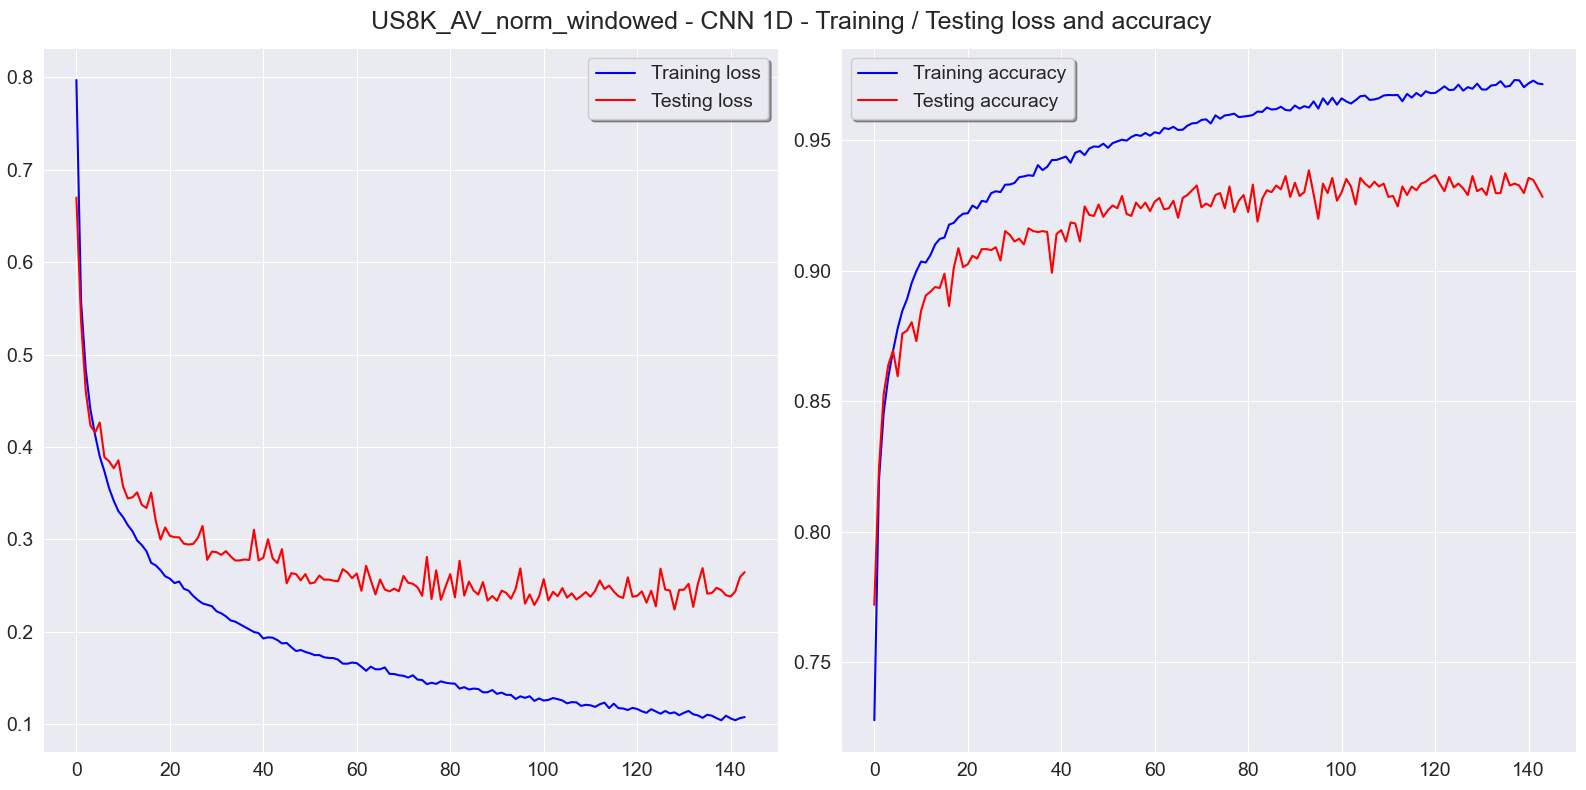
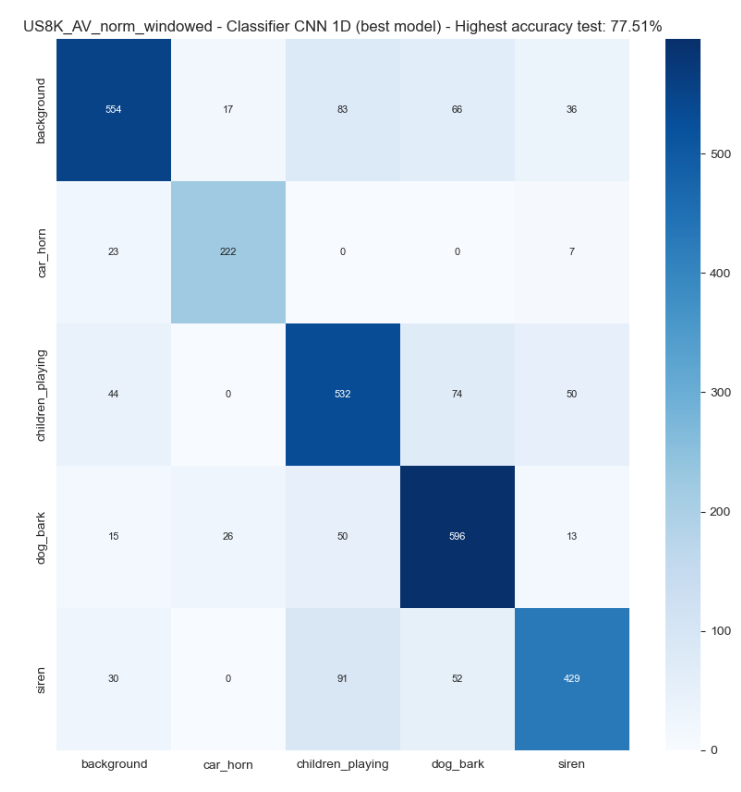

In [82]:
# Load the model with the highest accuracy

model_CNN_1D_saved = load_model(os.path.join(path_modelsVal, 'Model_CNN_1D_weights_0_best_norm_windowed.hdf5'))
model_CNN_1D_saved.summary()

Model: "CNN_1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 369, 28)           224       
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 369, 34)           4794      
_________________________________________________________________
Conv1D_3 (Conv1D)            (None, 369, 56)           5768      
_________________________________________________________________
MaxPool1D_3 (MaxPooling1D)   (None, 184, 56)           0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 184, 56)           0         
_________________________________________________________________
flatten (Flatten)            (None, 10304)             0         
_________________________________________________________________
Dense (Dense)                (None, 50)                51525

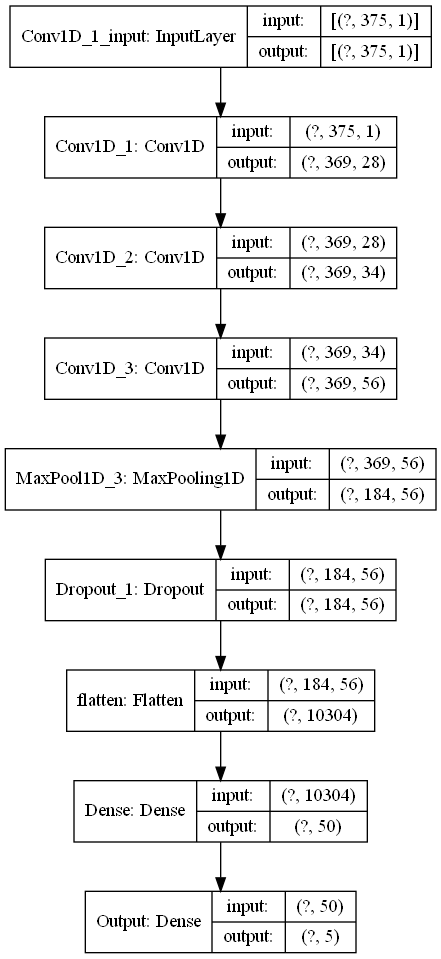

In [83]:
tf.keras.utils.plot_model(model_CNN_1D_saved,  show_shapes=True)

In [84]:
score_CNN_1D_saved = model_CNN_1D_saved.evaluate(X_val_norm[..., np.newaxis], y_OHEV_val, verbose=1, batch_size = 32)
print('Test loss:', score_CNN_1D_saved[0])
print('Test accuracy:', score_CNN_1D_saved[1])

95/95 [==============================] - 0s 3ms/step - loss: 1.7807 - accuracy: 0.7751
Test loss: 1.7807343006134033
Test accuracy: 0.775083065032959


In [85]:
score_CNN_1D_saved[1]

0.775083065032959

In [86]:
y_pred_CNN_1D_saved = np.argmax(model_CNN_1D_saved.predict(X_val_norm[..., np.newaxis]),axis=1)
y_pred_CNN_1D_saved

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [87]:
t_srt               = time.perf_counter_ns()
y_pred_CNN_1D_saved = np.argmax(model_CNN_1D_saved.predict(X_val_norm[..., np.newaxis]),axis=1)
t_end               = time.perf_counter_ns()
proc_time           = ((t_end - t_srt) / 1000000)

print(y_pred_CNN_1D_saved)
print(f'\nNumber of predicted samples..: {len(X_val_norm)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_norm),6)}ms')

[3 3 3 ... 0 0 0]

Number of predicted samples..: 3010
Total predicting time:.......: 154.7085ms
Predicting time per sample...: 0.051398ms


In [88]:
y_test_enc = np.argmax(y_OHEV_val, axis=1)
y_test_enc

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [89]:
metrics_set_CNN_1D_saved = classification_report(y_test_enc, y_pred_CNN_1D_saved, target_names=nom_classes)
print(metrics_set_CNN_1D_saved)

                  precision    recall  f1-score   support

      background       0.83      0.73      0.78       756
        car_horn       0.84      0.88      0.86       252
children_playing       0.70      0.76      0.73       700
        dog_bark       0.76      0.85      0.80       700
           siren       0.80      0.71      0.75       602

        accuracy                           0.78      3010
       macro avg       0.79      0.79      0.78      3010
    weighted avg       0.78      0.78      0.77      3010



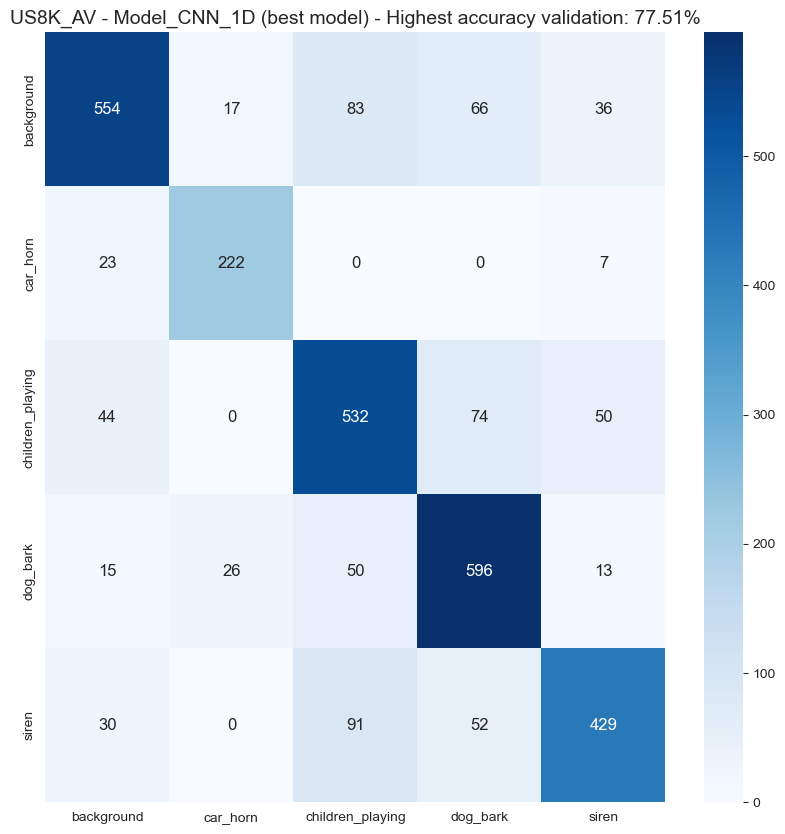

In [90]:
plot_confusion_matrix(y_test_enc, 
                      y_pred_CNN_1D_saved, 
                      score_CNN_1D_saved, 
                      cmap_cm, 
                      'Model_CNN_1D_confusion_matrix',
                      ax = None,
                      savepic = True)

### CNN 2D - Expected results for fold 1 validation: 82.99% 

### CNN 2D - Expected results for fold 1 validation based on k-fold cross-validation: 82.43% 

Images from the file: 09_CNN_2D.ipynb

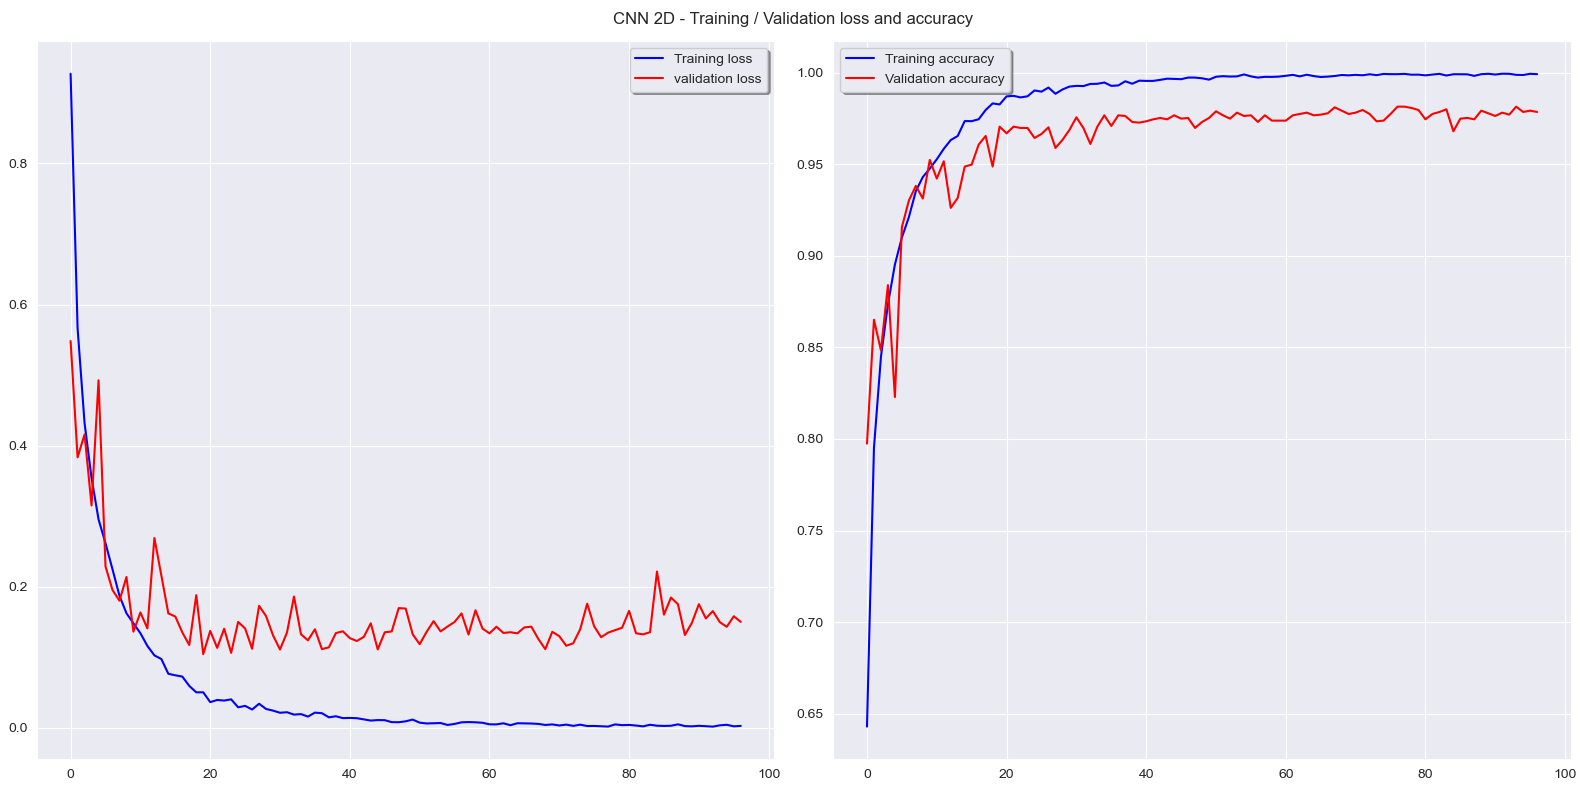
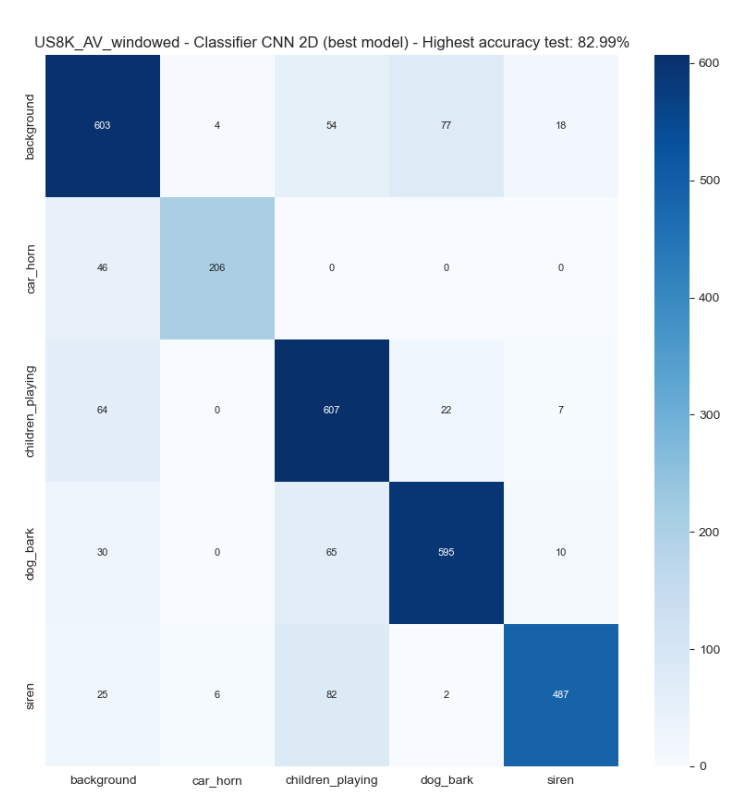

In [91]:
# Load the model with the highest accuracy

model_CNN_2D_saved = load_model(os.path.join(path_modelsVal,  'Model_CNN_2D_weights_0_best_windowed.hdf5'))
model_CNN_2D_saved.summary()

Model: "Model_CNN_2D_Luz"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 180, 44, 24)       624       
_________________________________________________________________
batch_normalization_4 (Batch (None, 180, 44, 24)       96        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 22, 24)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 22, 48)        28848     
_________________________________________________________________
batch_normalization_5 (Batch (None, 90, 22, 48)        192       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 11, 48)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 11, 48)   

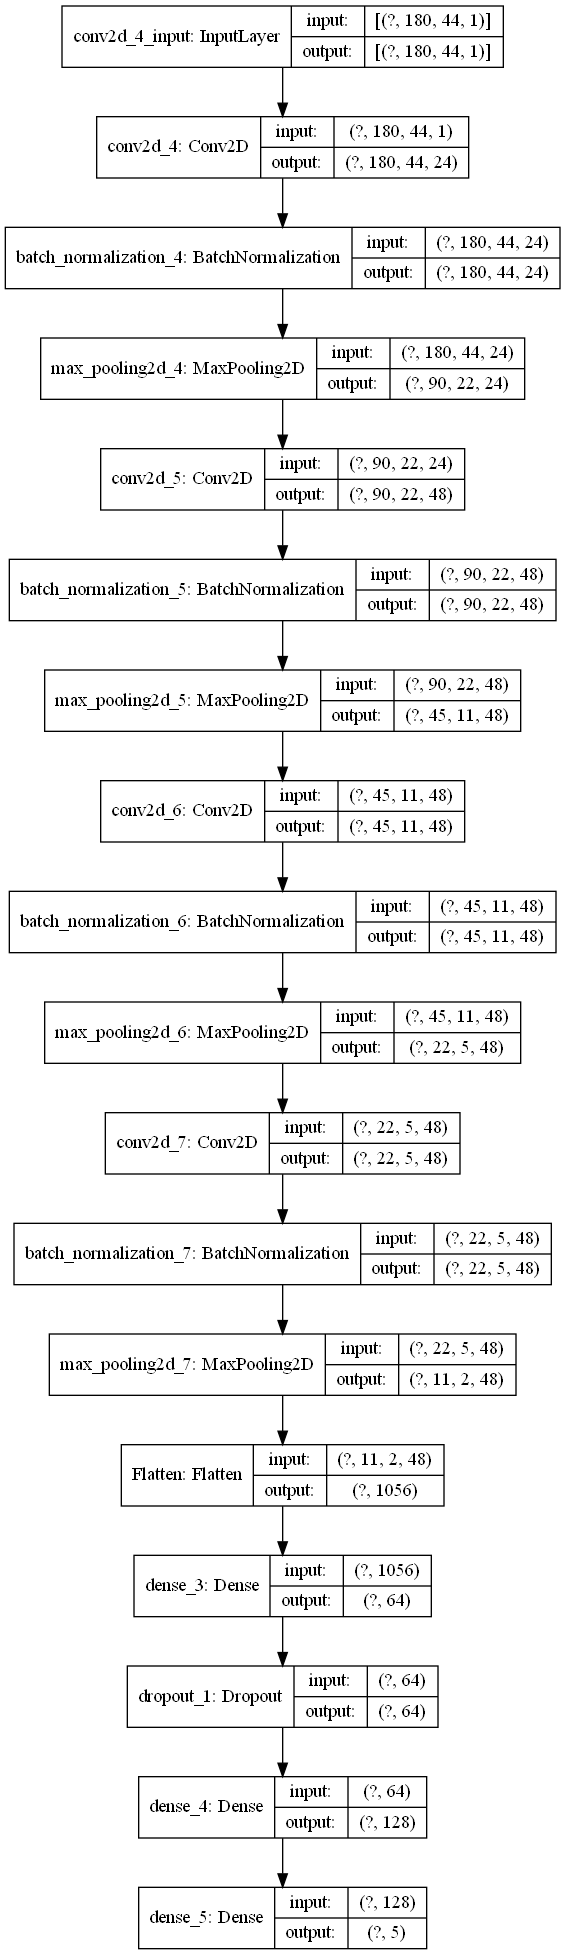

In [92]:
tf.keras.utils.plot_model(model_CNN_2D_saved,  show_shapes=True)

In [93]:
score_CNN_2D_saved = model_CNN_2D_saved.evaluate(X_val_CNN2D, y_val_CNN2D, verbose=1, batch_size = 32)
print('Test loss:', score_CNN_2D_saved[0])
print('Test accuracy:', score_CNN_2D_saved[1])

95/95 [==============================] - 1s 10ms/step - loss: 1.6384 - accuracy: 0.8299
Test loss: 1.6384106874465942
Test accuracy: 0.829900324344635


In [94]:
score_CNN_2D_saved[1]

0.829900324344635

In [95]:
t_srt               = time.perf_counter_ns()
y_pred_CNN_2D_saved = np.argmax(model_CNN_2D_saved.predict(X_val_CNN2D),axis=1)
t_end               = time.perf_counter_ns()
proc_time           = ((t_end - t_srt) / 1000000)

print(y_pred_CNN_2D_saved)
print(f'\nNumber of predicted samples..: {len(X_val_CNN2D)}')
print(f'Total predicting time:.......: {proc_time}ms')

print(f'Predicting time per sample...: {round(proc_time/len(X_val_CNN2D),6)}ms')

[3 3 3 ... 0 0 0]

Number of predicted samples..: 3010
Total predicting time:.......: 753.803ms
Predicting time per sample...: 0.250433ms


In [96]:
y_test_enc = np.argmax(y_val_CNN2D, axis=1)
y_test_enc

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [97]:
metrics_set_CNN_2D_saved = classification_report(y_test_enc, y_pred_CNN_2D_saved, target_names=nom_classes)
print(metrics_set_CNN_2D_saved)

                  precision    recall  f1-score   support

      background       0.79      0.80      0.79       756
        car_horn       0.95      0.82      0.88       252
children_playing       0.75      0.87      0.81       700
        dog_bark       0.85      0.85      0.85       700
           siren       0.93      0.81      0.87       602

        accuracy                           0.83      3010
       macro avg       0.86      0.83      0.84      3010
    weighted avg       0.84      0.83      0.83      3010



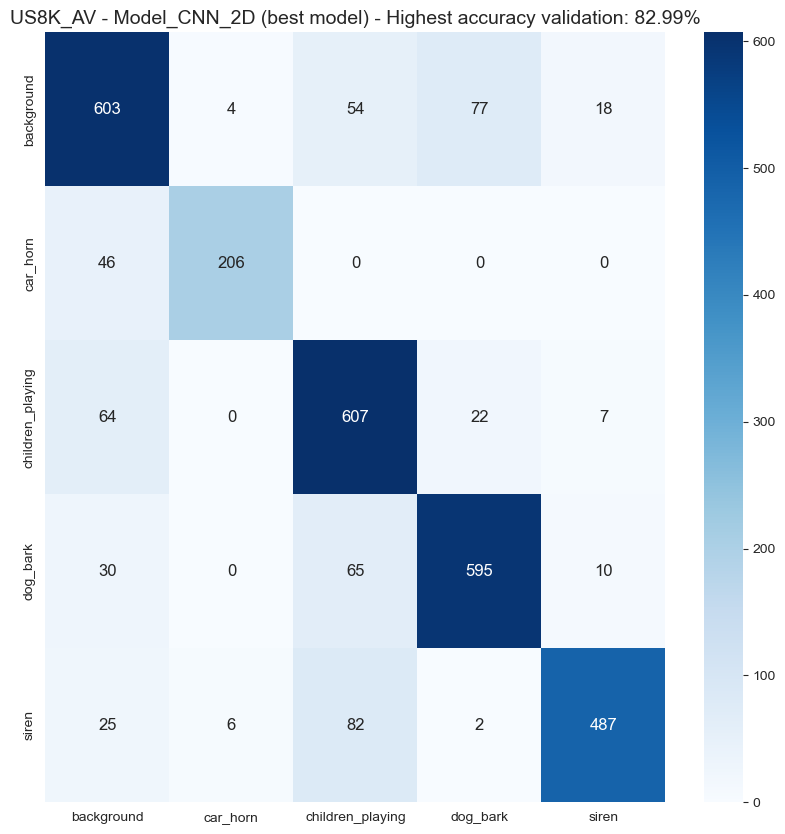

In [98]:
plot_confusion_matrix(y_test_enc, 
                      y_pred_CNN_2D_saved, 
                      score_CNN_2D_saved, 
                      cmap_cm, 
                      'Model_CNN_2D_confusion_matrix',
                      ax = None,
                      savepic = True)

### Feature extraction evaluation on the validation set

Select the original audio for the validation set

In [99]:
val_audioW = np.array(DB_aug_from_pkl_VAL.Audio.to_list())
val_audioW.shape

(3010, 22016)

In [100]:
val_audio = np.array(DB_ori_from_pkl_VAL.Audio.to_list())
val_audio

array([[ 6.40211074e-05,  8.26949836e-05,  5.21230577e-05, ...,
        -9.90534551e-04, -1.04527897e-03, -1.12278771e-03],
       [-1.63099641e-04, -1.47700383e-04, -1.09524306e-04, ...,
         8.95090925e-04,  1.02632504e-03,  1.10134820e-03],
       [ 2.32642919e-01,  3.51767898e-01,  2.96772093e-01, ...,
         1.11169368e-01,  8.34129453e-02,  5.04262894e-02],
       ...,
       [-1.33019298e-01, -1.66331232e-01, -1.35999262e-01, ...,
         1.03915721e-01,  1.94399461e-01,  5.43059632e-02],
       [ 3.92560661e-02,  7.70680532e-02,  1.03511095e-01, ...,
         1.14013448e-01,  7.45912045e-02,  8.32999796e-02],
       [ 1.45196602e-01,  1.46330804e-01,  7.95801356e-02, ...,
        -1.42012641e-01, -8.45199227e-02, -3.31722349e-02]], dtype=float32)

In [101]:
val_audio.shape

(430, 88200)

In [102]:
y_val_audio_cat = np.array(DB_ori_from_pkl_VAL.Class_categorical.to_list())
y_val_audio_cat

array(['dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'background', 'background',
       'background', 'background', 'background', 'background',
       'background', 'background', 'background', 'background',
       'background', 'background', 'background', 'background',
       'background', 'background', 'background', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'siren', 'siren', 'siren', 'siren',
       'background', 'background', 'background', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'background', 'background', 'background',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'siren', 'siren', 'siren'

In [103]:
y_val_audio_cat.shape

(430,)

In [104]:
y_val_audio_cat[1]

'dog_bark'

In [105]:
y_val_audio = np.array(DB_ori_from_pkl_VAL.Class_OHEV.to_list())
y_val_audio

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [106]:
y_val_audio.shape

(430, 5)

In [107]:
ipd.Audio(val_audio[0], rate = SR)

### Apply the windowing technique on each audio

Import the class to window and extract the features of the audio data

In [108]:
# Retrieve the X_min and X_max used for normalizing the training set

X_min = np.genfromtxt(os.path.join(path_arrays,  'X_train_min.csv'), delimiter=',', dtype = 'float32')
X_max = np.genfromtxt(os.path.join(path_arrays,  'X_train_max.csv'), delimiter=',', dtype = 'float32')

In [109]:
from MT_audioPPFE_ML import audioPPFE_ML

In [110]:
def feature_extractor(audioList: list, mutual: bool):
    
    # Start the time
    tExt_srt        = time.perf_counter_ns()

    # Call the class to window and extract the ML features
    PPFE_ML         = audioPPFE_ML(audioList, CNN2D = False, time_length = 4)
    audio_windowed  = np.array(PPFE_ML.audio_windowed)
    audio_features  = np.array(PPFE_ML.features_array)

    # Replace NaN values by 0
    audio_features[np.isnan(audio_features)] = 0
    
    if mutual:
        # Keep original data NEITHER normalized NOR standardized
        audio_features_norm = audio_features
    
    else:
        # Normalize the validation set using the min and max from training
        audio_features_norm = (audio_features - X_min) / (X_max - X_min)
        
    # Stop the timer and compute the extracting time
    tExt_end            = time.perf_counter_ns()
    extract_time        = ((tExt_end - tExt_srt) / 1000000)

    print(f'\nNumber of samples for extraction..: {len(audio_windowed)}')
    print(f'Total extracting time:............: {extract_time:.4f}ms')

    print(f'Extracting time per sample........: {(extract_time/len(audio_windowed)):.4f}ms')
    
    return audio_windowed, audio_features_norm

In [111]:
val_audio_windowed, val_audio_features = feature_extractor(val_audio[0:1], mutual = False)


Number of samples for extraction..: 7
Total extracting time:............: 8228.8935ms
Extracting time per sample........: 1175.5562ms


In [112]:
val_audio_windowed.shape

(7, 22016)

In [113]:
val_audio_features.shape

(7, 375)

In [114]:
def logMel_extractor(audioList: list):
    
    # Start the time
    tExt_srt        = time.perf_counter_ns()

    # Call the class to window and extract the ML features
    PPFE_ML             = audioPPFE_ML(audioList, CNN2D = True, time_length = 4)
    audio_windowed      = np.array(PPFE_ML.audio_windowed)
    audio_features_agg  = np.array(PPFE_ML.features_agg).astype(np.float32)
    
    # Stop the timer and compute the extracting time
    tExt_end            = time.perf_counter_ns()
    extract_time        = ((tExt_end - tExt_srt) / 1000000)

    print(f'\nNumber of samples for extraction..: {len(audio_windowed)}')
    print(f'Total extracting time:............: {extract_time:.4f}ms')

    print(f'Extracting time per sample........: {(extract_time/len(audio_windowed)):.4f}ms')
    
    return audio_windowed, audio_features_agg

In [115]:
val_audio_windowedCNN2D, val_audio_featuresCNN2D = logMel_extractor(val_audio[0:1])


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 51.5287ms
Extracting time per sample........: 7.3612ms


In [116]:
val_audio_windowedCNN2D.shape

(7, 22016)

In [117]:
val_audio_featuresCNN2D.shape

(7, 180, 44, 1)

In [118]:
def predicSample(classifier: str, samples: list, samplesNr: int):
    
    predict_audioClip = []
    predict_audio     = []

    j = 1
    
    mutual = False

    for i in range(samplesNr):
        print(f'\n=========================================================================')
        print(f'\nSample...: {i}')

        # SVC - Support Vector Classifer
        if classifier   == 'SVC':
            # Window and extract the features, apply X_min and X_max used for normalizing the training set
            audio_windowed, audio_features = feature_extractor(samples[i:j], mutual = False)
            
            # Perform the prediction
            predict_val = SVC_c_saved.predict(audio_features)
            print()
            for predict in predict_val:
                print(predict)           
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])        
            print(f'\nAudio is most likely...: {counter.most_common(1)[0][0]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')            

            
        # LR - Logistic Regression
        if classifier   == 'LR':
            # Window and extract the features, apply X_min and X_max used for normalizing the training set
            audio_windowed, audio_features = feature_extractor(samples[i:j], mutual = False)
            
            # Perform the prediction
            predict_val = LR_c_saved.predict(audio_features)
            print()
            for predict in predict_val:
                print(predict)           
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])        
            print(f'\nAudio is most likely...: {counter.most_common(1)[0][0]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')            
        
        
        # RF - Random Forest
        if classifier   == 'RF':
            # Window and extract the features: NEITHER normalized NOR standardized, rather with Mutual Information
            audio_windowed, audio_features = feature_extractor(samples[i:j], mutual = mutual)
            
            if mutual:
                # Select the features according the indexes of the Mutual Information applied to the training set
                audio_features  = audio_features[:, mutual_idx_TRN]

            # Perform the prediction
            predict_val = RF_c_saved.predict(audio_features)
            print()
            for predict in predict_val:
                print(predict)
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])
            print(f'\nAudio is most likely...: {counter.most_common(1)[0][0]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')            

            
        # ANN - Artificial Neural Network or MLP (Multi Layer Perceptron)
        if classifier   == 'ANN':
            # Window and extract the features, apply X_min and X_max used for normalizing the training set
            audio_windowed, audio_features = feature_extractor(samples[i:j], mutual = False)
            
            # Perform the prediction
            predict_val = np.argmax(model_ANN_saved.predict(audio_features),axis=1)
            print()
            for predict in predict_val:
                print(nom_classes[predict])
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])  
            print(f'\nAudio is most likely...: {nom_classes[counter.most_common(1)[0][0]]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')                
                

        # CNN1D - Convolutional Neural Network 1D
        if classifier   == 'CNN1D':
            # Window and extract the features, apply X_min and X_max used for normalizing the training set
            audio_windowed, audio_features = feature_extractor(samples[i:j], mutual = False)
            
            # Perform the prediction
            predict_val = np.argmax(model_CNN_1D_saved.predict(audio_features[..., np.newaxis]),axis=1)
            print()
            for predict in predict_val:
                print(nom_classes[predict])
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])  
            print(f'\nAudio is most likely...: {nom_classes[counter.most_common(1)[0][0]]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')             

            
        # CNN2D - Convolutional Neural Network 2D
        if classifier   == 'CNN2D':
            # Window and extract the features, apply X_min and X_max used for normalizing the training set
            audio_windowed, audio_features = logMel_extractor(samples[i:j])

            # Perform the prediction
            predict_val = np.argmax(model_CNN_2D_saved.predict(audio_features),axis=1)
            print()
            for predict in predict_val:
                print(nom_classes[predict])
            counter = Counter(predict_val)
            predict_audio.append(counter.most_common(1)[0][0])  
            print(f'\nAudio is most likely...: {nom_classes[counter.most_common(1)[0][0]]}')
            print(f'Ground truth is........: {y_val_audio_cat[i]}')   
            
      
        predict_audioClip.append(predict_val)
      
        j += 1
    
    return audio_windowed, audio_features, np.array(predict_audioClip).flatten(), predict_audio

In [119]:
#t = 2

In [120]:
classifiers = ['SVC', 'LR', 'RF', 'ANN', 'CNN1D', 'CNN2D']

In [121]:
ipd.Audio(val_audio[0], rate = SR)

In [122]:
# audio_windowed, audio_features  = predicSample(val_audio[t:t+1], 1)

audio_windowed, audio_features, predict_audioClip, predict_audio = predicSample(classifiers[0], val_audio, 10)



Sample...: 0

Number of samples for extraction..: 7
Total extracting time:............: 2524.3711ms
Extracting time per sample........: 360.6244ms

dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 1

Number of samples for extraction..: 7
Total extracting time:............: 2551.8224ms
Extracting time per sample........: 364.5461ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 2

Number of samples for extraction..: 7
Total extracting time:............: 2366.1754ms
Extracting time per sample........: 338.0251ms

dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 3

Number of samples for extraction..: 7
Total extracting time:............: 2490.5677ms
Extracting time per sample........: 

In [123]:
predict_audioClip

array(['dog_bark', 'dog_bark', 'dog_bark', 'children_playing', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'children_playing', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'children_playing',
       'background', 'children_playing', 'children_playing', 'dog_bark',
       'children_playing', 'dog_bark', 'dog_bark', 'dog_bark',
       'children_playing', 'children_playing', 'dog_bark',
       'children_playing', 'children_playing', 'dog_bark', 'dog_bark',
       'children_playing', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'children_playing', 'background', 'background', 'background',
       'background', 'background', 'background', 'background',
       'background', 'background',

In [124]:
predict_audio

['dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'children_playing',
 'children_playing',
 'dog_bark',
 'background',
 'background']

In [125]:
audio_windowed.shape

(7, 22016)

In [126]:
audio_features.shape

(7, 375)

In [127]:
classifiers

['SVC', 'LR', 'RF', 'ANN', 'CNN1D', 'CNN2D']

In [128]:
predict_audioClip_dic = {}
predict_audio_dic     = {}

for classifier in classifiers:
    print(f'\nClassifier....: {classifier}')
    predict_audioClip_classifier = f'predict_audioClip_{classifier}'
    predict_audio_classifier     = f'predict_audio_{classifier}'
    
    audio_windowed, audio_features, predict_audioClip_classifier, predict_audio_classifier = predicSample(classifier, val_audio, len(val_audio))
    
    predict_audioClip_dic[f'predict_audioClip_{classifier}'] = predict_audioClip_classifier
    predict_audio_dic[f'predict_audio_{classifier}'] = predict_audio_classifier



Classifier....: SVC


Sample...: 0

Number of samples for extraction..: 7
Total extracting time:............: 2439.7308ms
Extracting time per sample........: 348.5330ms

dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 1

Number of samples for extraction..: 7
Total extracting time:............: 2459.4698ms
Extracting time per sample........: 351.3528ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 2

Number of samples for extraction..: 7
Total extracting time:............: 2418.1363ms
Extracting time per sample........: 345.4480ms

dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 3

Number of samples for extraction..: 7
Total extracting time:............: 2347.4866ms
Extracting time


Number of samples for extraction..: 7
Total extracting time:............: 2665.9817ms
Extracting time per sample........: 380.8545ms

children_playing
siren
children_playing
children_playing
siren
background
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 23

Number of samples for extraction..: 7
Total extracting time:............: 2621.7643ms
Extracting time per sample........: 374.5378ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
siren

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 24

Number of samples for extraction..: 7
Total extracting time:............: 2723.6056ms
Extracting time per sample........: 389.0865ms

children_playing
children_playing
background
children_playing
background
siren
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 25

Number of samp


Number of samples for extraction..: 7
Total extracting time:............: 2182.3082ms
Extracting time per sample........: 311.7583ms

children_playing
children_playing
children_playing
children_playing
background
children_playing
siren

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 44

Number of samples for extraction..: 7
Total extracting time:............: 2204.2036ms
Extracting time per sample........: 314.8862ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 45

Number of samples for extraction..: 7
Total extracting time:............: 2226.9355ms
Extracting time per sample........: 318.1336ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground tru


Number of samples for extraction..: 7
Total extracting time:............: 2251.0981ms
Extracting time per sample........: 321.5854ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 67

Number of samples for extraction..: 7
Total extracting time:............: 2148.3923ms
Extracting time per sample........: 306.9132ms

siren
siren
siren
siren
children_playing
background
background

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 68

Number of samples for extraction..: 7
Total extracting time:............: 2236.0861ms
Extracting time per sample........: 319.4409ms

children_playing
background
background
children_playing
children_playing
background
children_playing

Audio is most likely...: children_playing
Ground truth is........: siren


Sample...: 69

Number of samples for extraction..: 7
Total extracting time:............: 2211.7800ms
Extracting time per sample........: 315.9686ms

childr


Number of samples for extraction..: 7
Total extracting time:............: 2199.8803ms
Extracting time per sample........: 314.2686ms

background
dog_bark
dog_bark
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 89

Number of samples for extraction..: 7
Total extracting time:............: 2188.7991ms
Extracting time per sample........: 312.6856ms

children_playing
children_playing
children_playing
children_playing
children_playing
dog_bark
dog_bark

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 90

Number of samples for extraction..: 7
Total extracting time:............: 2280.8698ms
Extracting time per sample........: 325.8385ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 91

Number of samples for extr


Number of samples for extraction..: 7
Total extracting time:............: 2226.9099ms
Extracting time per sample........: 318.1300ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 110

Number of samples for extraction..: 7
Total extracting time:............: 2201.3834ms
Extracting time per sample........: 314.4833ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 111

Number of samples for extraction..: 7
Total extracting time:............: 2240.0750ms
Extracting time per sample........: 320.0107ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children


Number of samples for extraction..: 7
Total extracting time:............: 2201.7828ms
Extracting time per sample........: 314.5404ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 132

Number of samples for extraction..: 7
Total extracting time:............: 2364.4239ms
Extracting time per sample........: 337.7748ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 133

Number of samples for extraction..: 7
Total extracting time:............: 2294.0701ms
Extracting time per sample........: 327.7243ms

siren
siren
siren
siren
siren
background
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 134

Number of samples for extraction..: 7
Total extracting time:............: 2177.6149ms
Extracting time per sample........: 311.0878ms

siren
background
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground tru


Number of samples for extraction..: 7
Total extracting time:............: 2193.1304ms
Extracting time per sample........: 313.3043ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 157

Number of samples for extraction..: 7
Total extracting time:............: 2222.8937ms
Extracting time per sample........: 317.5562ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 158

Number of samples for extraction..: 7
Total extracting time:............: 2303.1322ms
Extracting time per sample........: 329.0189ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 159

Number of samples for extraction..: 7
Total extracting time:............: 2253.1213ms
Extracting time per sample........: 321.8745ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 2178.4671ms
Extracting time per sample........: 311.2096ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 181

Number of samples for extraction..: 7
Total extracting time:............: 2380.4208ms
Extracting time per sample........: 340.0601ms

children_playing
children_playing
children_playing
dog_bark
dog_bark
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 182

Number of samples for extraction..: 7
Total extracting time:............: 2398.3285ms
Extracting time per sample........: 342.6184ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 183

Number of samples f


Number of samples for extraction..: 7
Total extracting time:............: 2157.7581ms
Extracting time per sample........: 308.2512ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 204

Number of samples for extraction..: 7
Total extracting time:............: 2211.5869ms
Extracting time per sample........: 315.9410ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 205

Number of samples for extraction..: 7
Total extracting time:............: 2235.4083ms
Extracting time per sample........: 319.3440ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
background

Audio is most likely...: children_playi


Number of samples for extraction..: 7
Total extracting time:............: 2233.0937ms
Extracting time per sample........: 319.0134ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 226

Number of samples for extraction..: 7
Total extracting time:............: 2204.9246ms
Extracting time per sample........: 314.9892ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 227

Number of samples for extraction..: 7
Total extracting time:............: 2278.3468ms
Extracting time per sample........: 325.4781ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 228

Num


Number of samples for extraction..: 7
Total extracting time:............: 2354.4996ms
Extracting time per sample........: 336.3571ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 248

Number of samples for extraction..: 7
Total extracting time:............: 2287.1022ms
Extracting time per sample........: 326.7289ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 249

Number of samples for extraction..: 7
Total extracting time:............: 2369.6213ms
Extracting time per sample........: 338.5173ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 250

Number of samples for extraction..: 7
Total extracting time:............: 2343.7417ms
Extracting time per sample........: 334.8202ms

dog_bark
dog_


Number of samples for extraction..: 7
Total extracting time:............: 2182.8007ms
Extracting time per sample........: 311.8287ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 270

Number of samples for extraction..: 7
Total extracting time:............: 2270.2789ms
Extracting time per sample........: 324.3256ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 271

Number of samples for extraction..: 7
Total extracting time:............: 2232.2561ms
Extracting time per sample........: 318.8937ms

children_playing
children_playing
dog_bark
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...


Number of samples for extraction..: 7
Total extracting time:............: 2190.9932ms
Extracting time per sample........: 312.9990ms

dog_bark
dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 290

Number of samples for extraction..: 7
Total extracting time:............: 2206.9511ms
Extracting time per sample........: 315.2787ms

children_playing
dog_bark
dog_bark
children_playing
children_playing
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 291

Number of samples for extraction..: 7
Total extracting time:............: 2281.1208ms
Extracting time per sample........: 325.8744ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 292

Number of samples for extraction..: 7
Total extracting time:............: 2172.0032ms
Extracting ti


Number of samples for extraction..: 7
Total extracting time:............: 2204.7343ms
Extracting time per sample........: 314.9620ms

children_playing
children_playing
dog_bark
dog_bark
background
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 311

Number of samples for extraction..: 7
Total extracting time:............: 2216.9702ms
Extracting time per sample........: 316.7100ms

background
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
children_playing

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 312

Number of samples for extraction..: 7
Total extracting time:............: 2186.2436ms
Extracting time per sample........: 312.3205ms

dog_bark
dog_bark
children_playing
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 313

Number of samples for extraction..: 7
Total extracting time:............: 2238.0828ms
Extracting time p


Number of samples for extraction..: 7
Total extracting time:............: 2149.5582ms
Extracting time per sample........: 307.0797ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 334

Number of samples for extraction..: 7
Total extracting time:............: 2155.4083ms
Extracting time per sample........: 307.9155ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 335

Number of samples for extraction..: 7
Total extracting time:............: 2177.9369ms
Extracting time per sample........: 311.1338ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 336

Number of samples for extraction..: 7
Total extracting time:............: 2224.5501ms
Extracting time per sample........: 317.792


Number of samples for extraction..: 7
Total extracting time:............: 2179.7236ms
Extracting time per sample........: 311.3891ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 356

Number of samples for extraction..: 7
Total extracting time:............: 2205.7986ms
Extracting time per sample........: 315.1141ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 357

Number of samples for extraction..: 7
Total extracting time:............: 2315.0102ms
Extracting time per sample........: 330.7157ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 358

Number of samples for extraction..: 7
Total extracting time:............: 2253.0748ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 2289.8497ms
Extracting time per sample........: 327.1214ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 379

Number of samples for extraction..: 7
Total extracting time:............: 2309.1214ms
Extracting time per sample........: 329.8745ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 380

Number of samples for extraction..: 7
Total extracting time:............: 2343.6877ms
Extracting time per sample........: 334.8125ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 381

Number of samples for extraction..: 7
Total extracting time:............: 2228.1680ms
Extracting time per sample........: 318.3097ms

dog_bark
dog_


Number of samples for extraction..: 7
Total extracting time:............: 2667.8923ms
Extracting time per sample........: 381.1275ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 402

Number of samples for extraction..: 7
Total extracting time:............: 2732.3312ms
Extracting time per sample........: 390.3330ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 403

Number of samples for extraction..: 7
Total extracting time:............: 2495.4209ms
Extracting time per sample........: 356.4887ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 404

Number of samples for extraction..: 7
Total extracting time:............: 2519.3814ms
Extracting time per sample........: 359.911


Number of samples for extraction..: 7
Total extracting time:............: 2656.1134ms
Extracting time per sample........: 379.4448ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 424

Number of samples for extraction..: 7
Total extracting time:............: 2616.6725ms
Extracting time per sample........: 373.8104ms

children_playing
children_playing
dog_bark
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 425

Number of samples for extraction..: 7
Total extracting time:............: 2488.4617ms
Extracting time per sample........: 355.4945ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...


Number of samples for extraction..: 7
Total extracting time:............: 2507.4294ms
Extracting time per sample........: 358.2042ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 16

Number of samples for extraction..: 7
Total extracting time:............: 2883.9092ms
Extracting time per sample........: 411.9870ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 17

Number of samples for extraction..: 7
Total extracting time:............: 2388.9877ms
Extracting time per sample........: 341.2840ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 18

Number of samples for extraction..: 7
Total extracting time:............: 2224.8121ms
Extracting


Number of samples for extraction..: 7
Total extracting time:............: 2185.5969ms
Extracting time per sample........: 312.2281ms

children_playing
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 37

Number of samples for extraction..: 7
Total extracting time:............: 2166.6301ms
Extracting time per sample........: 309.5186ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 38

Number of samples for extraction..: 7
Total extracting time:............: 2187.4963ms
Extracting time per sample........: 312.4995ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 39

Number of samples for extraction..: 7
Total extracting time:............: 2297.2918ms
Extracting time per sample........: 328.1845


Number of samples for extraction..: 7
Total extracting time:............: 2309.5909ms
Extracting time per sample........: 329.9416ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 59

Number of samples for extraction..: 7
Total extracting time:............: 2229.1973ms
Extracting time per sample........: 318.4568ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 60

Number of samples for extraction..: 7
Total extracting time:............: 2260.1549ms
Extracting time per sample........: 322.8793ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 61

Number of samples for extraction..: 7
Total extracting time:............: 2277.3120ms
Extracting time per sample........: 325.3303ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: si


Number of samples for extraction..: 7
Total extracting time:............: 2251.2794ms
Extracting time per sample........: 321.6113ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 83

Number of samples for extraction..: 7
Total extracting time:............: 2216.1072ms
Extracting time per sample........: 316.5867ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
dog_bark

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 84

Number of samples for extraction..: 7
Total extracting time:............: 2189.7844ms
Extracting time per sample........: 312.8263ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
background

Audio is most likely...: children_playing
Ground 


Number of samples for extraction..: 7
Total extracting time:............: 2268.3137ms
Extracting time per sample........: 324.0448ms

children_playing
dog_bark
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 104

Number of samples for extraction..: 7
Total extracting time:............: 2239.9850ms
Extracting time per sample........: 319.9979ms

background
children_playing
children_playing
background
background
background
background

Audio is most likely...: background
Ground truth is........: children_playing


Sample...: 105

Number of samples for extraction..: 7
Total extracting time:............: 2169.8336ms
Extracting time per sample........: 309.9762ms

children_playing
children_playing
children_playing
children_playing
background
background
dog_bark

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 106

N


Number of samples for extraction..: 7
Total extracting time:............: 2206.5852ms
Extracting time per sample........: 315.2265ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 125

Number of samples for extraction..: 7
Total extracting time:............: 2156.0621ms
Extracting time per sample........: 308.0089ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 126

Number of samples for extraction..: 7
Total extracting time:............: 2204.3385ms
Extracting time per sample........: 314.9055ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 127

Number of samples for extraction..: 7
Total extracting time:............: 2167.3152ms
Extracting time per sample........: 309.6165ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...:


Number of samples for extraction..: 7
Total extracting time:............: 2197.3539ms
Extracting time per sample........: 313.9077ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 150

Number of samples for extraction..: 7
Total extracting time:............: 2262.4250ms
Extracting time per sample........: 323.2036ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 151

Number of samples for extraction..: 7
Total extracting time:............: 2209.2672ms
Extracting time per sample........: 315.6096ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 152

Number of samples for extraction..: 7
Total extracting time:............: 2187.7063ms
Extracting time per sample........: 312.5295ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 2283.1471ms
Extracting time per sample........: 326.1639ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 175

Number of samples for extraction..: 7
Total extracting time:............: 2215.8582ms
Extracting time per sample........: 316.5512ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 176

Number of samples for extraction..: 7
Total extracting time:............: 2176.4419ms
Extracting time per sample........: 310.9203ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children


Number of samples for extraction..: 7
Total extracting time:............: 2228.2590ms
Extracting time per sample........: 318.3227ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 197

Number of samples for extraction..: 7
Total extracting time:............: 2123.4268ms
Extracting time per sample........: 303.3467ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 198

Number of samples for extraction..: 7
Total extracting time:............: 2169.0332ms
Extracting time per sample........: 309.8619ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 199

Number of samples for extraction..: 7
Total extracting time:............: 2170.4325ms
Extracting time per sample........: 310.0618ms

children_play


Number of samples for extraction..: 7
Total extracting time:............: 2220.5132ms
Extracting time per sample........: 317.2162ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 219

Number of samples for extraction..: 7
Total extracting time:............: 2186.7473ms
Extracting time per sample........: 312.3925ms

dog_bark
dog_bark
background
dog_bark
dog_bark
dog_bark
background

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 220

Number of samples for extraction..: 7
Total extracting time:............: 2410.9361ms
Extracting time per sample........: 344.4194ms

dog_bark
dog_bark
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 221

Number of samples for extraction..: 7
Total extracting time:............: 236


Number of samples for extraction..: 7
Total extracting time:............: 2192.1769ms
Extracting time per sample........: 313.1681ms

dog_bark
siren
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 241

Number of samples for extraction..: 7
Total extracting time:............: 2276.9333ms
Extracting time per sample........: 325.2762ms

children_playing
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 242

Number of samples for extraction..: 7
Total extracting time:............: 2227.2927ms
Extracting time per sample........: 318.1847ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
siren

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 243

Number of samples for extraction..: 7
Total extracting time:............: 2223.3391ms
Extracting time per sample........: 317.6199ms

backg


Number of samples for extraction..: 7
Total extracting time:............: 2195.2327ms
Extracting time per sample........: 313.6047ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 264

Number of samples for extraction..: 7
Total extracting time:............: 2186.5021ms
Extracting time per sample........: 312.3574ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 265

Number of samples for extraction..: 7
Total extracting time:............: 2248.6775ms
Extracting time per sample........: 321.2396ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 266

Number of samples for extraction..: 7
Total extracting time:............: 2192.8665ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 2173.9900ms
Extracting time per sample........: 310.5700ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 285

Number of samples for extraction..: 7
Total extracting time:............: 2246.8279ms
Extracting time per sample........: 320.9754ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
siren

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 286

Number of samples for extraction..: 7
Total extracting time:............: 2167.3068ms
Extracting time per sample........: 309.6153ms

children_playing
children_playing
siren
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth 


Number of samples for extraction..: 7
Total extracting time:............: 2861.0189ms
Extracting time per sample........: 408.7170ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 306

Number of samples for extraction..: 7
Total extracting time:............: 2729.7615ms
Extracting time per sample........: 389.9659ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 307

Number of samples for extraction..: 7
Total extracting time:............: 2699.7663ms
Extracting time per sample........: 385.6809ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 308

Number of samples for extraction..: 7
Total extracting time:............: 3


Number of samples for extraction..: 7
Total extracting time:............: 2611.4906ms
Extracting time per sample........: 373.0701ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 328

Number of samples for extraction..: 7
Total extracting time:............: 2626.6909ms
Extracting time per sample........: 375.2416ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 329

Number of samples for extraction..: 7
Total extracting time:............: 2753.3686ms
Extracting time per sample........: 393.3384ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 330

Number of samples for extraction..: 7
Total extracting time:............: 2668.0392ms
Extracting time per sample........: 381.1485ms

car_horn
car_


Number of samples for extraction..: 7
Total extracting time:............: 2546.5861ms
Extracting time per sample........: 363.7980ms

background
children_playing
background
background
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: siren


Sample...: 350

Number of samples for extraction..: 7
Total extracting time:............: 2626.5778ms
Extracting time per sample........: 375.2254ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: siren


Sample...: 351

Number of samples for extraction..: 7
Total extracting time:............: 2595.5800ms
Extracting time per sample........: 370.7971ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: siren



Number of samples for extraction..: 7
Total extracting time:............: 2360.4749ms
Extracting time per sample........: 337.2107ms

background
background
children_playing
dog_bark
dog_bark
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 373

Number of samples for extraction..: 7
Total extracting time:............: 2273.7034ms
Extracting time per sample........: 324.8148ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 374

Number of samples for extraction..: 7
Total extracting time:............: 2703.8118ms
Extracting time per sample........: 386.2588ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 375

Number of samples for extraction..: 7
Total extracting time:............: 2686.4222ms
Extracting time per sample........: 383.7


Number of samples for extraction..: 7
Total extracting time:............: 2393.8437ms
Extracting time per sample........: 341.9777ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 396

Number of samples for extraction..: 7
Total extracting time:............: 2308.1096ms
Extracting time per sample........: 329.7299ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 397

Number of samples for extraction..: 7
Total extracting time:............: 2333.2151ms
Extracting time per sample........: 333.3164ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 398

Number of samples for extraction..: 7
Total extracting time:............: 2386.0979ms
Extracting time per sample........: 340.871


Number of samples for extraction..: 7
Total extracting time:............: 2446.7858ms
Extracting time per sample........: 349.5408ms

children_playing
background
children_playing
siren
dog_bark
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 419

Number of samples for extraction..: 7
Total extracting time:............: 2519.5806ms
Extracting time per sample........: 359.9401ms

dog_bark
dog_bark
children_playing
children_playing
children_playing
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 420

Number of samples for extraction..: 7
Total extracting time:............: 2499.4178ms
Extracting time per sample........: 357.0597ms

children_playing
children_playing
children_playing
siren
siren
siren
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 421

Number of samples for


Number of samples for extraction..: 7
Total extracting time:............: 2449.6703ms
Extracting time per sample........: 349.9529ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 11

Number of samples for extraction..: 7
Total extracting time:............: 2502.5661ms
Extracting time per sample........: 357.5094ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 12

Number of samples for extraction..: 7
Total extracting time:............: 2271.9120ms
Extracting time per sample........: 324.5589ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 13

Number of samples for extraction..: 7
Total extracting time:............: 2241.2806ms
Extracting


Number of samples for extraction..: 7
Total extracting time:............: 2440.4445ms
Extracting time per sample........: 348.6349ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 32

Number of samples for extraction..: 7
Total extracting time:............: 2451.1487ms
Extracting time per sample........: 350.1641ms

children_playing
children_playing
children_playing
children_playing
children_playing
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 33

Number of samples for extraction..: 7
Total extracting time:............: 2687.9742ms
Extracting time per sample........: 383.9963ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: siren


Sample...: 34

N


Number of samples for extraction..: 7
Total extracting time:............: 2230.7965ms
Extracting time per sample........: 318.6852ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 53

Number of samples for extraction..: 7
Total extracting time:............: 2233.8012ms
Extracting time per sample........: 319.1145ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 54

Number of samples for extraction..: 7
Total extracting time:............: 2187.4185ms
Extracting time per sample........: 312.4884ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 55

Number of samples for extraction..: 7
Total extracting time:............: 2260.5059ms
Extracting time per sample........: 322.9294ms

dog_bark
dog_bar


Number of samples for extraction..: 7
Total extracting time:............: 3250.8444ms
Extracting time per sample........: 464.4063ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 76

Number of samples for extraction..: 7
Total extracting time:............: 2824.6310ms
Extracting time per sample........: 403.5187ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 77

Number of samples for extraction..: 7
Total extracting time:............: 2543.1143ms
Extracting time per sample........: 363.3020ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 78

Number of samples for extraction..: 7
Total extracting time:............: 2581.8676ms
Extracting time per sample........: 368.8382ms


Number of samples for extraction..: 7
Total extracting time:............: 2337.7715ms
Extracting time per sample........: 333.9674ms

dog_bark
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: children_playing


Sample...: 97

Number of samples for extraction..: 7
Total extracting time:............: 2309.0061ms
Extracting time per sample........: 329.8580ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: children_playing


Sample...: 98

Number of samples for extraction..: 7
Total extracting time:............: 2550.8839ms
Extracting time per sample........: 364.4120ms

dog_bark
dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: children_playing


Sample...: 99

Number of samples for extraction..: 7
Total extracting time:............: 2666.3538ms
Extracting time per samp


Number of samples for extraction..: 7
Total extracting time:............: 2458.8739ms
Extracting time per sample........: 351.2677ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 118

Number of samples for extraction..: 7
Total extracting time:............: 2463.7135ms
Extracting time per sample........: 351.9591ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 119

Number of samples for extraction..: 7
Total extracting time:............: 2365.6975ms
Extracting time per sample........: 337.9568ms

background
background
background
background
background
siren
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 120

Number of samples for extraction..: 7
Total extracting time:............: 2180.9218ms
Extracting time per sample........: 311.5603ms




Number of samples for extraction..: 7
Total extracting time:............: 2412.2413ms
Extracting time per sample........: 344.6059ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 142

Number of samples for extraction..: 7
Total extracting time:............: 2454.5066ms
Extracting time per sample........: 350.6438ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 143

Number of samples for extraction..: 7
Total extracting time:............: 2349.8868ms
Extracting time per sample........: 335.6981ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 144

Number of samples for extraction..: 7
Total extracting time:............: 2435.0608ms
Extracting time per sample........: 347.8658ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 2670.2778ms
Extracting time per sample........: 381.4683ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 167

Number of samples for extraction..: 7
Total extracting time:............: 2954.4776ms
Extracting time per sample........: 422.0682ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 168

Number of samples for extraction..: 7
Total extracting time:............: 2861.6936ms
Extracting time per sample........: 408.8134ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 169

Number of samples for extraction..: 7
Total extracting time:............: 2812.0379ms
Extracting time per sample........: 401.7197ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 2465.5260ms
Extracting time per sample........: 352.2180ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 189

Number of samples for extraction..: 7
Total extracting time:............: 2298.8796ms
Extracting time per sample........: 328.4114ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 190

Number of samples for extraction..: 7
Total extracting time:............: 2317.2785ms
Extracting time per sample........: 331.0398ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 191

Number of samples for extraction..: 7
Total extracting time:............: 2318.2639ms
Extracting time per sample........: 331.1806ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 2270.4998ms
Extracting time per sample........: 324.3571ms

background
children_playing
children_playing
children_playing
background
background
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 212

Number of samples for extraction..: 7
Total extracting time:............: 2279.8141ms
Extracting time per sample........: 325.6877ms

children_playing
children_playing
children_playing
children_playing
background
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 213

Number of samples for extraction..: 7
Total extracting time:............: 2296.5058ms
Extracting time per sample........: 328.0723ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 214

Number of samples for


Number of samples for extraction..: 7
Total extracting time:............: 2487.4909ms
Extracting time per sample........: 355.3558ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 234

Number of samples for extraction..: 7
Total extracting time:............: 2664.2470ms
Extracting time per sample........: 380.6067ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 235

Number of samples for extraction..: 7
Total extracting time:............: 2534.3929ms
Extracting time per sample........: 362.0561ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: background


Sample...: 236

Number of samples for extraction..: 7
Total extracting time:...........


Number of samples for extraction..: 7
Total extracting time:............: 2312.5492ms
Extracting time per sample........: 330.3642ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 257

Number of samples for extraction..: 7
Total extracting time:............: 2407.2809ms
Extracting time per sample........: 343.8973ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 258

Number of samples for extraction..: 7
Total extracting time:............: 2481.7168ms
Extracting time per sample........: 354.5310ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 259

Number of samples for extraction..: 7
Total extracting time:............: 2641.0553ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 2411.2621ms
Extracting time per sample........: 344.4660ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 278

Number of samples for extraction..: 7
Total extracting time:............: 2431.3406ms
Extracting time per sample........: 347.3344ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 279

Number of samples for extraction..: 7
Total extracting time:............: 2517.9669ms
Extracting time per sample........: 359.7096ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 280

Number of samples for extraction..: 7
Total extracting time:............: 2


Number of samples for extraction..: 7
Total extracting time:............: 2681.7838ms
Extracting time per sample........: 383.1120ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 299

Number of samples for extraction..: 7
Total extracting time:............: 2653.2878ms
Extracting time per sample........: 379.0411ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 300

Number of samples for extraction..: 7
Total extracting time:............: 2841.6125ms
Extracting time per sample........: 405.9446ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children


Number of samples for extraction..: 7
Total extracting time:............: 2679.4805ms
Extracting time per sample........: 382.7829ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 321

Number of samples for extraction..: 7
Total extracting time:............: 2589.9181ms
Extracting time per sample........: 369.9883ms

children_playing
car_horn
car_horn
car_horn
car_horn
children_playing
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 322

Number of samples for extraction..: 7
Total extracting time:............: 2788.5725ms
Extracting time per sample........: 398.3675ms

car_horn
children_playing
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 323

Number of samples for extraction..: 7
Total extracting time:............: 2453.6138ms
Extracting time per


Number of samples for extraction..: 7
Total extracting time:............: 2859.9537ms
Extracting time per sample........: 408.5648ms

background
background
dog_bark
dog_bark
dog_bark
background
background

Audio is most likely...: background
Ground truth is........: siren


Sample...: 344

Number of samples for extraction..: 7
Total extracting time:............: 2779.9671ms
Extracting time per sample........: 397.1382ms

background
background
siren
siren
siren
dog_bark
dog_bark

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 345

Number of samples for extraction..: 7
Total extracting time:............: 2492.9521ms
Extracting time per sample........: 356.1360ms

siren
dog_bark
dog_bark
siren
siren
background
background

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 346

Number of samples for extraction..: 7
Total extracting time:............: 2243.4562ms
Extracting time per sample........: 320.4937ms

siren
background
background



Number of samples for extraction..: 7
Total extracting time:............: 2472.8369ms
Extracting time per sample........: 353.2624ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 367

Number of samples for extraction..: 7
Total extracting time:............: 2513.4341ms
Extracting time per sample........: 359.0620ms

children_playing
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 368

Number of samples for extraction..: 7
Total extracting time:............: 2597.4947ms
Extracting time per sample........: 371.0707ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 369

Number of samples for extraction..: 7
Total extracting time:............: 2427.0889ms
Extracting time per sample........: 346.7270ms

backg


Number of samples for extraction..: 7
Total extracting time:............: 2721.7633ms
Extracting time per sample........: 388.8233ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 389

Number of samples for extraction..: 7
Total extracting time:............: 2640.1471ms
Extracting time per sample........: 377.1639ms

dog_bark
dog_bark
children_playing
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 390

Number of samples for extraction..: 7
Total extracting time:............: 2744.6771ms
Extracting time per sample........: 392.0967ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 391

Number of samples for extraction..: 7
Total extracting time:............: 2621.7770ms
Extracting time per sample........: 374.5396ms

dog_b


Number of samples for extraction..: 7
Total extracting time:............: 2841.3966ms
Extracting time per sample........: 405.9138ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 412

Number of samples for extraction..: 7
Total extracting time:............: 2603.1081ms
Extracting time per sample........: 371.8726ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 413

Number of samples for extraction..: 7
Total extracting time:............: 2457.3757ms
Extracting time per sample........: 351.0537ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 414

Number of samples for extraction..: 7
Total extracting time:............: 2412.5550ms
Extracting time per sample........: 344.6507ms

dog_bark
dog_


Number of samples for extraction..: 7
Total extracting time:............: 2429.6854ms
Extracting time per sample........: 347.0979ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 4

Number of samples for extraction..: 7
Total extracting time:............: 2449.2866ms
Extracting time per sample........: 349.8981ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 5

Number of samples for extraction..: 7
Total extracting time:............: 2545.0933ms
Extracting time per sample........: 363.5848ms

dog_bark
children_playing
children_playing
children_playing
children_playing
dog_bark
dog_bark

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 6

Number of samples for extraction..: 7
Total extracting time:............: 2444.2976ms
Extracting time per sample.


Number of samples for extraction..: 7
Total extracting time:............: 2689.0827ms
Extracting time per sample........: 384.1547ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 26

Number of samples for extraction..: 7
Total extracting time:............: 2513.3138ms
Extracting time per sample........: 359.0448ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 27

Number of samples for extraction..: 7
Total extracting time:............: 2561.9421ms
Extracting time per sample........: 365.9917ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_p


Number of samples for extraction..: 7
Total extracting time:............: 2681.4622ms
Extracting time per sample........: 383.0660ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 46

Number of samples for extraction..: 7
Total extracting time:............: 2675.5386ms
Extracting time per sample........: 382.2198ms

children_playing
children_playing
children_playing
siren
children_playing
siren
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 47

Number of samples for extraction..: 7
Total extracting time:............: 2530.6214ms
Extracting time per sample........: 361.5173ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is


Number of samples for extraction..: 7
Total extracting time:............: 2434.7222ms
Extracting time per sample........: 347.8175ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: siren


Sample...: 69

Number of samples for extraction..: 7
Total extracting time:............: 2440.7862ms
Extracting time per sample........: 348.6837ms

siren
children_playing
children_playing
siren
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: siren


Sample...: 70

Number of samples for extraction..: 7
Total extracting time:............: 2559.7411ms
Extracting time per sample........: 365.6773ms

siren
children_playing
children_playing
children_playing
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 71

Number of samples for extraction..: 7
Total 


Number of samples for extraction..: 7
Total extracting time:............: 2429.1694ms
Extracting time per sample........: 347.0242ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 91

Number of samples for extraction..: 7
Total extracting time:............: 2432.2217ms
Extracting time per sample........: 347.4602ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 92

Number of samples for extraction..: 7
Total extracting time:............: 2362.3422ms
Extracting time per sample........: 337.4775ms

children_playing
dog_bark
children_playing
children_playing
siren
background
children_playing

Audio is most likely...: children_playing
Ground truth is........: dog_bark


Sample...: 93

Number of samples for extraction..: 7
Total extracting time:............: 2


Number of samples for extraction..: 7
Total extracting time:............: 2539.1010ms
Extracting time per sample........: 362.7287ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 112

Number of samples for extraction..: 7
Total extracting time:............: 2557.7122ms
Extracting time per sample........: 365.3875ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 113

Number of samples for extraction..: 7
Total extracting time:............: 2586.6152ms
Extracting time per sample........: 369.5165ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 114

Number of samples for extraction..: 7
T


Number of samples for extraction..: 7
Total extracting time:............: 2262.9209ms
Extracting time per sample........: 323.2744ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 135

Number of samples for extraction..: 7
Total extracting time:............: 2281.8894ms
Extracting time per sample........: 325.9842ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 136

Number of samples for extraction..: 7
Total extracting time:............: 2377.0546ms
Extracting time per sample........: 339.5792ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 137

Number of samples for extraction..: 7
Total extracting time:............: 2491.3549ms
Extracting time per sample........: 355.9078ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is.....


Number of samples for extraction..: 7
Total extracting time:............: 2545.9388ms
Extracting time per sample........: 363.7055ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 160

Number of samples for extraction..: 7
Total extracting time:............: 2545.5995ms
Extracting time per sample........: 363.6571ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 161

Number of samples for extraction..: 7
Total extracting time:............: 2584.0755ms
Extracting time per sample........: 369.1536ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 162

Number of samples for extraction..: 7
Total extracting time:............: 2468.6581ms
Extracting time per sample........: 352.6654ms

siren
siren
siren
siren
siren
siren
dog_bark

Audio is most likely...: siren
Ground truth is..


Number of samples for extraction..: 7
Total extracting time:............: 2255.9290ms
Extracting time per sample........: 322.2756ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 183

Number of samples for extraction..: 7
Total extracting time:............: 2205.5941ms
Extracting time per sample........: 315.0849ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 184

Number of samples for extraction..: 7
Total extracting time:............: 2291.5981ms
Extracting time per sample........: 327.3712ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 185

Number of samples for extraction..: 7
Total extracting time:............: 2254.5087ms
Extracting time per sample........: 322.072


Number of samples for extraction..: 7
Total extracting time:............: 2248.5321ms
Extracting time per sample........: 321.2189ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 206

Number of samples for extraction..: 7
Total extracting time:............: 2283.6810ms
Extracting time per sample........: 326.2401ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 207

Number of samples for extraction..: 7
Total extracting time:............: 2254.2609ms
Extracting time per sample........: 322.0373ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 208

Number of samples for extraction..: 7
T


Number of samples for extraction..: 7
Total extracting time:............: 2382.3891ms
Extracting time per sample........: 340.3413ms

siren
background
background
children_playing
dog_bark
background
children_playing

Audio is most likely...: background
Ground truth is........: children_playing


Sample...: 228

Number of samples for extraction..: 7
Total extracting time:............: 2312.5555ms
Extracting time per sample........: 330.3651ms

children_playing
children_playing
children_playing
children_playing
dog_bark
dog_bark
dog_bark

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 229

Number of samples for extraction..: 7
Total extracting time:............: 2324.8623ms
Extracting time per sample........: 332.1232ms

children_playing
dog_bark
children_playing
children_playing
background
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 230

Number of samples fo


Number of samples for extraction..: 7
Total extracting time:............: 2231.5683ms
Extracting time per sample........: 318.7955ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 250

Number of samples for extraction..: 7
Total extracting time:............: 2226.9980ms
Extracting time per sample........: 318.1426ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 251

Number of samples for extraction..: 7
Total extracting time:............: 2202.1197ms
Extracting time per sample........: 314.5885ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 252

Number of samples for extraction..: 7
Total extracting time:............: 2216.4373ms
Extracting time per sample........: 316.633


Number of samples for extraction..: 7
Total extracting time:............: 2263.1827ms
Extracting time per sample........: 323.3118ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 272

Number of samples for extraction..: 7
Total extracting time:............: 2183.6326ms
Extracting time per sample........: 311.9475ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 273

Number of samples for extraction..: 7
Total extracting time:............: 2285.6845ms
Extracting time per sample........: 326.5264ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children


Number of samples for extraction..: 7
Total extracting time:............: 2241.7325ms
Extracting time per sample........: 320.2475ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 292

Number of samples for extraction..: 7
Total extracting time:............: 2185.3762ms
Extracting time per sample........: 312.1966ms

dog_bark
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 293

Number of samples for extraction..: 7
Total extracting time:............: 2246.6576ms
Extracting time per sample........: 320.9511ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 294

Number of samples for extraction..: 7
Total extracting time:.......


Number of samples for extraction..: 7
Total extracting time:............: 2442.9186ms
Extracting time per sample........: 348.9884ms

dog_bark
dog_bark
children_playing
children_playing
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 313

Number of samples for extraction..: 7
Total extracting time:............: 2209.5388ms
Extracting time per sample........: 315.6484ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 314

Number of samples for extraction..: 7
Total extracting time:............: 2126.7110ms
Extracting time per sample........: 303.8159ms

dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 315

Number of samples for extraction..: 7
Total extracting time:............: 2212.0823ms
Extracting time per sample........: 3


Number of samples for extraction..: 7
Total extracting time:............: 2212.5375ms
Extracting time per sample........: 316.0768ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 336

Number of samples for extraction..: 7
Total extracting time:............: 2168.7521ms
Extracting time per sample........: 309.8217ms

children_playing
children_playing
children_playing
siren
siren
background
background

Audio is most likely...: children_playing
Ground truth is........: siren


Sample...: 337

Number of samples for extraction..: 7
Total extracting time:............: 2182.1455ms
Extracting time per sample........: 311.7351ms

children_playing
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 338

Number of samples for extraction..: 7
Total extracting time:............: 2310.9686ms



Number of samples for extraction..: 7
Total extracting time:............: 2229.7774ms
Extracting time per sample........: 318.5396ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 358

Number of samples for extraction..: 7
Total extracting time:............: 2235.5387ms
Extracting time per sample........: 319.3627ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 359

Number of samples for extraction..: 7
Total extracting time:............: 2176.1498ms
Extracting time per sample........: 310.8785ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 360

Number of samples for extraction..: 7
Total extracting time:............: 2225.9324ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 2322.3018ms
Extracting time per sample........: 331.7574ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 381

Number of samples for extraction..: 7
Total extracting time:............: 2351.1300ms
Extracting time per sample........: 335.8757ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 382

Number of samples for extraction..: 7
Total extracting time:............: 2284.4448ms
Extracting time per sample........: 326.3493ms

children_playing
background
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 383

Number of samples for extraction..: 7
Total extracting time:............: 2335.2098ms
E


Number of samples for extraction..: 7
Total extracting time:............: 2216.4614ms
Extracting time per sample........: 316.6373ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 404

Number of samples for extraction..: 7
Total extracting time:............: 2174.8437ms
Extracting time per sample........: 310.6920ms

background
car_horn
car_horn
car_horn
background
car_horn
background

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 405

Number of samples for extraction..: 7
Total extracting time:............: 2178.1649ms
Extracting time per sample........: 311.1664ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: car_horn


Sample...: 406

Number of samples for extraction..: 7
Total extracting time:............: 2188.7217ms
Extracting time per sample........: 312


Number of samples for extraction..: 7
Total extracting time:............: 2219.4735ms
Extracting time per sample........: 317.0676ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 426

Number of samples for extraction..: 7
Total extracting time:............: 2316.5647ms
Extracting time per sample........: 330.9378ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 427

Number of samples for extraction..: 7
Total extracting time:............: 2202.6309ms
Extracting time per sample........: 314.6616ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 428

Number of samples for extraction..: 7
Total extracting time:............: 2263.5044ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 2238.2767ms
Extracting time per sample........: 319.7538ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 19

Number of samples for extraction..: 7
Total extracting time:............: 2187.2910ms
Extracting time per sample........: 312.4701ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 20

Number of samples for extraction..: 7
Total extracting time:............: 2382.3187ms
Extracting time per sample........: 340.3312ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 21




Number of samples for extraction..: 7
Total extracting time:............: 2664.7836ms
Extracting time per sample........: 380.6834ms

car_horn
car_horn
car_horn
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 39

Number of samples for extraction..: 7
Total extracting time:............: 2484.2068ms
Extracting time per sample........: 354.8867ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 40

Number of samples for extraction..: 7
Total extracting time:............: 2534.7394ms
Extracting time per sample........: 362.1056ms

children_playing
children_playing
background
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 41

Number of samples for extraction..: 7
Total extracting


Number of samples for extraction..: 7
Total extracting time:............: 2415.5383ms
Extracting time per sample........: 345.0769ms

children_playing
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 61

Number of samples for extraction..: 7
Total extracting time:............: 2581.0758ms
Extracting time per sample........: 368.7251ms

siren
children_playing
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 62

Number of samples for extraction..: 7
Total extracting time:............: 2423.4132ms
Extracting time per sample........: 346.2019ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 63

Number of samples for extraction..: 7
Total extracting time:............: 2378.7827ms
Extracting time per sample........: 339.8261ms

siren
siren
siren
children_playing
children_playing
siren
siren

Audio is m


Number of samples for extraction..: 7
Total extracting time:............: 2338.3187ms
Extracting time per sample........: 334.0455ms

dog_bark
dog_bark
children_playing
dog_bark
background
children_playing
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: children_playing


Sample...: 84

Number of samples for extraction..: 7
Total extracting time:............: 2207.6889ms
Extracting time per sample........: 315.3841ms

children_playing
children_playing
children_playing
children_playing
siren
dog_bark
dog_bark

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 85

Number of samples for extraction..: 7
Total extracting time:............: 2346.8174ms
Extracting time per sample........: 335.2596ms

dog_bark
children_playing
children_playing
dog_bark
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 86

Number of samples for e


Number of samples for extraction..: 7
Total extracting time:............: 2407.6370ms
Extracting time per sample........: 343.9481ms

children_playing
children_playing
children_playing
children_playing
children_playing
background
background

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 106

Number of samples for extraction..: 7
Total extracting time:............: 2485.4812ms
Extracting time per sample........: 355.0687ms

background
dog_bark
dog_bark
background
dog_bark
dog_bark
background

Audio is most likely...: dog_bark
Ground truth is........: children_playing


Sample...: 107

Number of samples for extraction..: 7
Total extracting time:............: 2437.6667ms
Extracting time per sample........: 348.2381ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
dog_bark

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 108

Number of


Number of samples for extraction..: 7
Total extracting time:............: 2248.0049ms
Extracting time per sample........: 321.1436ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 128

Number of samples for extraction..: 7
Total extracting time:............: 2169.8853ms
Extracting time per sample........: 309.9836ms

siren
siren
siren
siren
siren
dog_bark
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 129

Number of samples for extraction..: 7
Total extracting time:............: 2244.4560ms
Extracting time per sample........: 320.6366ms

siren
dog_bark
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 130

Number of samples for extraction..: 7
Total extracting time:............: 2209.3498ms
Extracting time per sample........: 315.6214ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth i


Number of samples for extraction..: 7
Total extracting time:............: 2371.6110ms
Extracting time per sample........: 338.8016ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 153

Number of samples for extraction..: 7
Total extracting time:............: 2347.5349ms
Extracting time per sample........: 335.3621ms

siren
siren
siren
dog_bark
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 154

Number of samples for extraction..: 7
Total extracting time:............: 2398.7905ms
Extracting time per sample........: 342.6844ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 155

Number of samples for extraction..: 7
Total extracting time:............: 2398.6539ms
Extracting time per sample........: 342.6648ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is..


Number of samples for extraction..: 7
Total extracting time:............: 2361.4609ms
Extracting time per sample........: 337.3516ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 178

Number of samples for extraction..: 7
Total extracting time:............: 2457.8379ms
Extracting time per sample........: 351.1197ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 179

Number of samples for extraction..: 7
Total extracting time:............: 2487.4199ms
Extracting time per sample........: 355.3457ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children


Number of samples for extraction..: 7
Total extracting time:............: 2782.6229ms
Extracting time per sample........: 397.5176ms

children_playing
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: children_playing


Sample...: 200

Number of samples for extraction..: 7
Total extracting time:............: 2699.1874ms
Extracting time per sample........: 385.5982ms

background
background
background
background
siren
background
background

Audio is most likely...: background
Ground truth is........: children_playing


Sample...: 201

Number of samples for extraction..: 7
Total extracting time:............: 2742.7401ms
Extracting time per sample........: 391.8200ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 202

Number of samples for extr


Number of samples for extraction..: 7
Total extracting time:............: 2366.1126ms
Extracting time per sample........: 338.0161ms

dog_bark
children_playing
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 222

Number of samples for extraction..: 7
Total extracting time:............: 2636.1367ms
Extracting time per sample........: 376.5910ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 223

Number of samples for extraction..: 7
Total extracting time:............: 2709.8812ms
Extracting time per sample........: 387.1259ms

dog_bark
dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 224

Number of samples for extraction..: 7
Total extracting time:............: 2363.2941ms
Extracting time per sample........: 337.6134m


Number of samples for extraction..: 7
Total extracting time:............: 2269.0466ms
Extracting time per sample........: 324.1495ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 244

Number of samples for extraction..: 7
Total extracting time:............: 2509.9549ms
Extracting time per sample........: 358.5650ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 245

Number of samples for extraction..: 7
Total extracting time:............: 2254.1314ms
Extracting time per sample........: 322.0188ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 246

Number of samples for extraction..: 7
Total extracting time:............: 2290.1020ms
Extracting time per sampl


Number of samples for extraction..: 7
Total extracting time:............: 2433.9651ms
Extracting time per sample........: 347.7093ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 267

Number of samples for extraction..: 7
Total extracting time:............: 2500.1213ms
Extracting time per sample........: 357.1602ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 268

Number of samples for extraction..: 7
Total extracting time:............: 2593.4399ms
Extracting time per sample........: 370.4914ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 269

Number of samples for extraction..: 7
Total extracting time:............: 2464.2132ms
Extract


Number of samples for extraction..: 7
Total extracting time:............: 2509.4907ms
Extracting time per sample........: 358.4987ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 288

Number of samples for extraction..: 7
Total extracting time:............: 2452.3953ms
Extracting time per sample........: 350.3422ms

siren
children_playing
children_playing
children_playing
siren
children_playing
siren

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 289

Number of samples for extraction..: 7
Total extracting time:............: 2418.9638ms
Extracting time per sample........: 345.5663ms

dog_bark
dog_bark
dog_bark
dog_bark
children_playing
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 290

Number of samples for extrac


Number of samples for extraction..: 7
Total extracting time:............: 2486.8865ms
Extracting time per sample........: 355.2695ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 309

Number of samples for extraction..: 7
Total extracting time:............: 2450.4308ms
Extracting time per sample........: 350.0615ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 310

Number of samples for extraction..: 7
Total extracting time:............: 2452.0279ms
Extracting time per sample........: 350.2897ms

dog_bark
background
dog_bark
dog_bark
dog_bark
children_playing
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 311

Number of samples for extraction..: 7
Total extracting time:............: 2598.7896ms
Extracting time per sample........: 371.2557ms

dog


Number of samples for extraction..: 7
Total extracting time:............: 2462.3132ms
Extracting time per sample........: 351.7590ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 332

Number of samples for extraction..: 7
Total extracting time:............: 2439.8439ms
Extracting time per sample........: 348.5491ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 333

Number of samples for extraction..: 7
Total extracting time:............: 2504.3107ms
Extracting time per sample........: 357.7587ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 334

Number of samples for extraction..: 7
Total extracting time:............: 2392.4910ms
Extracting time per sample........: 341.7844ms

car_horn
car_


Number of samples for extraction..: 7
Total extracting time:............: 2425.7524ms
Extracting time per sample........: 346.5361ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 355

Number of samples for extraction..: 7
Total extracting time:............: 2388.8929ms
Extracting time per sample........: 341.2704ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 356

Number of samples for extraction..: 7
Total extracting time:............: 2405.3593ms
Extracting time per sample........: 343.6228ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 357

Number of samples for extraction..: 7
Total extracting time:............: 2591.4310ms
Extracting time per sample........: 370.2044ms

back


Number of samples for extraction..: 7
Total extracting time:............: 2362.6800ms
Extracting time per sample........: 337.5257ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: background


Sample...: 378

Number of samples for extraction..: 7
Total extracting time:............: 2568.7292ms
Extracting time per sample........: 366.9613ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 379

Number of samples for extraction..: 7
Total extracting time:............: 2488.8343ms
Extracting time per sample........: 355.5478ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 380

Number of samples for extraction..: 7
Total extracting time:............: 2427.68


Number of samples for extraction..: 7
Total extracting time:............: 2538.0680ms
Extracting time per sample........: 362.5811ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 401

Number of samples for extraction..: 7
Total extracting time:............: 2378.2907ms
Extracting time per sample........: 339.7558ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 402

Number of samples for extraction..: 7
Total extracting time:............: 2469.0987ms
Extracting time per sample........: 352.7284ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 403

Number of samples for extraction..: 7
Total extracting time:............: 2481.0933ms
Extracting time per sampl


Number of samples for extraction..: 7
Total extracting time:............: 2428.8348ms
Extracting time per sample........: 346.9764ms

children_playing
background
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 424

Number of samples for extraction..: 7
Total extracting time:............: 2421.3850ms
Extracting time per sample........: 345.9121ms

children_playing
siren
dog_bark
children_playing
dog_bark
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 425

Number of samples for extraction..: 7
Total extracting time:............: 2434.5024ms
Extracting time per sample........: 347.7861ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 426

Number of samples 


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 50.4713ms
Extracting time per sample........: 7.2102ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 14

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 38.3118ms
Extracting time per sample........: 5.4731ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 15

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 39.0205ms
Extracting time per sample........: 5.5744ms

background
background
background
background
background
back


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 53.8194ms
Extracting time per sample........: 7.6885ms

children_playing
children_playing
children_playing
children_playing
children_playing
background
background

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 33

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 41.2965ms
Extracting time per sample........: 5.8995ms

background
siren
children_playing
background
background
background
children_playing

Audio is most likely...: background
Ground truth is........: siren


Sample...: 34

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 37.0322ms
Extracting time per sample........: 5.2903ms

background
back


dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 52

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 45.4222ms
Extracting time per sample........: 6.4889ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 53

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 41.4172ms
Extracting time per sample........: 5.9167ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 54

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 48


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 50.9537ms
Extracting time per sample........: 7.2791ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 73

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 40.5524ms
Extracting time per sample........: 5.7932ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 74

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 38.8793ms
Extracting time per sample........: 5.5542ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 75




Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 55.3957ms
Extracting time per sample........: 7.9137ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 91

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 53.0620ms
Extracting time per sample........: 7.5803ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 92

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 43.0600ms
Extracting time per sample........: 6.1514ms

background
background
dog_bark
siren
children_playing
child


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 55.6260ms
Extracting time per sample........: 7.9466ms

dog_bark
dog_bark
children_playing
children_playing
children_playing
dog_bark
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 109

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 56.7677ms
Extracting time per sample........: 8.1097ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 110

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 47.2545ms
Extracting time per


siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 128

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 40.5253ms
Extracting time per sample........: 5.7893ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 129

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 50.1263ms
Extracting time per sample........: 7.1609ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 130

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 56.5573ms
Extracting time per sample........: 8.0796ms

siren
siren
siren
siren



siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 149

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 42.8017ms
Extracting time per sample........: 6.1145ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 150

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 44.1913ms
Extracting time per sample........: 6.3130ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 151

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 48.2943ms
Extracting time per sample........: 6.8992ms

siren
siren
siren
siren



Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 44.3646ms
Extracting time per sample........: 6.3378ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 172

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 55.7954ms
Extracting time per sample........: 7.9708ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 173

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 41.8284ms
Extracting time per sample........: 5.9755ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 174

Mel spectrograms created


siren
siren
siren
children_playing
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 191

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 44.2410ms
Extracting time per sample........: 6.3201ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 192

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 40.6013ms
Extracting time per sample........: 5.8002ms

siren
siren
siren
siren
siren
siren
siren

Audio is most likely...: siren
Ground truth is........: siren


Sample...: 193

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 46.6374ms
Extracting time per sample........: 6.6625ms

siren
siren
s


dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 211

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 44.4320ms
Extracting time per sample........: 6.3474ms

background
background
children_playing
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 212

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 45.3063ms
Extracting time per sample........: 6.4723ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 213

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extractio


children_playing
children_playing
children_playing
background
background
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 230

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 78.1394ms
Extracting time per sample........: 11.1628ms

children_playing
children_playing
children_playing
background
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 231

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 50.9919ms
Extracting time per sample........: 7.2846ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground


dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 249

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 46.6587ms
Extracting time per sample........: 6.6655ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 250

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 40.4213ms
Extracting time per sample........: 5.7745ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 251

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............:


background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 268

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 34.9437ms
Extracting time per sample........: 4.9920ms

background
background
background
background
background
background
children_playing

Audio is most likely...: background
Ground truth is........: background


Sample...: 269

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 34.8714ms
Extracting time per sample........: 4.9816ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 270

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of sam


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 45.7385ms
Extracting time per sample........: 6.5341ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 286

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 36.1256ms
Extracting time per sample........: 5.1608ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 287

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 34.34


children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 305

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 46.9717ms
Extracting time per sample........: 6.7102ms

children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 306

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 58.4202ms
Extracting time per sample........: 8.3457ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 307

M


car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 323

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 46.5976ms
Extracting time per sample........: 6.6568ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 324

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 39.6753ms
Extracting time per sample........: 5.6679ms

car_horn
car_horn
car_horn
car_horn
car_horn
car_horn
car_horn

Audio is most likely...: car_horn
Ground truth is........: car_horn


Sample...: 325

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............:


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 50.1021ms
Extracting time per sample........: 7.1574ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 343

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 39.1488ms
Extracting time per sample........: 5.5927ms

children_playing
siren
children_playing
children_playing
car_horn
car_horn
children_playing

Audio is most likely...: children_playing
Ground truth is........: siren


Sample...: 344

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 40.5773ms
Extracting time per sample........: 5.7968ms

car_horn
car_horn
children_playing
children_playing
siren
c


background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 362

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 49.9187ms
Extracting time per sample........: 7.1312ms

dog_bark
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: dog_bark


Sample...: 363

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 50.3903ms
Extracting time per sample........: 7.1986ms

dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 364

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Tot


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 48.0311ms
Extracting time per sample........: 6.8616ms

children_playing
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 383

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 46.2160ms
Extracting time per sample........: 6.6023ms

children_playing
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 384

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 49.7722ms
Extracting time per sample........: 7.1103ms

background
background
children_playing
backgr


Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 49.0004ms
Extracting time per sample........: 7.0001ms

background
background
background
background
background
background
background

Audio is most likely...: background
Ground truth is........: background


Sample...: 402

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 44.5579ms
Extracting time per sample........: 6.3654ms

dog_bark
dog_bark
children_playing
children_playing
dog_bark
dog_bark
dog_bark

Audio is most likely...: dog_bark
Ground truth is........: dog_bark


Sample...: 403

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 46.7930ms
Extracting time per sample........: 6.6847ms

background
background
background
background
background
back


children_playing
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: children_playing


Sample...: 422

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 42.0189ms
Extracting time per sample........: 6.0027ms

background
dog_bark
background
background
children_playing
children_playing
children_playing

Audio is most likely...: background
Ground truth is........: children_playing


Sample...: 423

Mel spectrograms created by a 1.02 seconds audio. Number of frames: 44

Number of samples for extraction..: 7
Total extracting time:............: 39.3304ms
Extracting time per sample........: 5.6186ms

background
children_playing
children_playing
children_playing
children_playing
children_playing
children_playing

Audio is most likely...: children_playing
Ground truth is........: ch

In [129]:
predict_audioClip_dic

{'predict_audioClip_SVC': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'car_horn', 'car_horn',
        'car_horn'], dtype='<U16'),
 'predict_audioClip_LR': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'car_horn', 'car_horn',
        'car_horn'], dtype='<U16'),
 'predict_audioClip_RF': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'background',
        'background', 'background'], dtype='<U16'),
 'predict_audioClip_ANN': array([3, 3, 3, ..., 0, 0, 0], dtype=int64),
 'predict_audioClip_CNN1D': array([3, 3, 3, ..., 0, 0, 0], dtype=int64),
 'predict_audioClip_CNN2D': array([3, 3, 3, ..., 0, 0, 0], dtype=int64)}

In [130]:
predict_audio_dic

{'predict_audio_SVC': ['dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'children_playing',
  'children_playing',
  'dog_bark',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'siren',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'siren',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'background',
  'background',
  'background',
  'dog_bark',
  'dog_bark',
 

In [131]:
predict_audioClip_dic['predict_audioClip_SVC']

array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'car_horn', 'car_horn',
       'car_horn'], dtype='<U16')

In [132]:
np.array_equal(predict_audioClip_dic['predict_audioClip_SVC'], SVC_c_saved_predict_val)

True

In [133]:
predict_audioClip_dic['predict_audioClip_LR']

array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'car_horn', 'car_horn',
       'car_horn'], dtype='<U16')

In [134]:
np.array_equal(predict_audioClip_dic['predict_audioClip_LR'], LR_c_saved_predict_val)

True

In [135]:
predict_audioClip_dic['predict_audioClip_RF']

array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'background',
       'background', 'background'], dtype='<U16')

In [136]:
np.array_equal(predict_audioClip_dic['predict_audioClip_RF'], RF_c_saved_predict_val)

True

In [137]:
predict_audioClip_dic['predict_audioClip_ANN']

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [138]:
np.array_equal(predict_audioClip_dic['predict_audioClip_ANN'], y_pred_ANN_saved)

True

In [139]:
predict_audioClip_dic['predict_audioClip_CNN1D']

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [140]:
np.array_equal(predict_audioClip_dic['predict_audioClip_CNN1D'], y_pred_CNN_1D_saved)

True

In [141]:
predict_audioClip_dic['predict_audioClip_CNN2D']

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [142]:
np.array_equal(predict_audioClip_dic['predict_audioClip_CNN2D'], y_pred_CNN_2D_saved)

True

In [143]:
# Save all predictions as CSV files

SVC_c_saved_predict_val.tofile(os.path.join(path_arrays, '_saved_predict_val_SVC.csv'), sep=',')
LR_c_saved_predict_val.tofile(os.path.join(path_arrays, '_saved_predict_val_LR.csv'), sep=',')
RF_c_saved_predict_val.tofile(os.path.join(path_arrays, '_saved_predict_val_RF.csv'), sep=',')
y_pred_ANN_saved.tofile(os.path.join(path_arrays,  '_saved_predict_val_ANN.csv'), sep=',')
y_pred_CNN_1D_saved.tofile(os.path.join(path_arrays, '_saved_predict_val_CNN1D.csv'), sep=',')
y_pred_CNN_2D_saved.tofile(os.path.join(path_arrays, '_saved_predict_val_CNN2D.csv'), sep=',')

In [144]:
# Save the prediction dictionaries as NUMPY files

np.save(os.path.join(path_arrays,  '_predict_audioClip_dic.npy'), predict_audioClip_dic)
np.save(os.path.join(path_arrays,  '_predict_audio_dic.npy'), predict_audio_dic)

In [145]:
predict_audioClip_dicR = np.load(os.path.join(path_arrays, '_predict_audioClip_dic.npy'), allow_pickle='TRUE').item()
predict_audioClip_dicR

{'predict_audioClip_SVC': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'car_horn', 'car_horn',
        'car_horn'], dtype='<U16'),
 'predict_audioClip_LR': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'car_horn', 'car_horn',
        'car_horn'], dtype='<U16'),
 'predict_audioClip_RF': array(['dog_bark', 'dog_bark', 'dog_bark', ..., 'background',
        'background', 'background'], dtype='<U16'),
 'predict_audioClip_ANN': array([3, 3, 3, ..., 0, 0, 0], dtype=int64),
 'predict_audioClip_CNN1D': array([3, 3, 3, ..., 0, 0, 0], dtype=int64),
 'predict_audioClip_CNN2D': array([3, 3, 3, ..., 0, 0, 0], dtype=int64)}

In [146]:
print(np.array_equal(predict_audioClip_dic['predict_audioClip_SVC'], predict_audioClip_dicR['predict_audioClip_SVC']))
print(np.array_equal(predict_audioClip_dic['predict_audioClip_LR'], predict_audioClip_dicR['predict_audioClip_LR']))
print(np.array_equal(predict_audioClip_dic['predict_audioClip_RF'], predict_audioClip_dicR['predict_audioClip_RF']))
print(np.array_equal(predict_audioClip_dic['predict_audioClip_ANN'], predict_audioClip_dicR['predict_audioClip_ANN']))
print(np.array_equal(predict_audioClip_dic['predict_audioClip_CNN1D'], predict_audioClip_dicR['predict_audioClip_CNN1D']))
print(np.array_equal(predict_audioClip_dic['predict_audioClip_CNN2D'], predict_audioClip_dicR['predict_audioClip_CNN2D']))

True
True
True
True
True
True


In [147]:
predict_audio_dicR = np.load(os.path.join(path_arrays,  '_predict_audio_dic.npy'), allow_pickle='TRUE').item()
predict_audio_dicR

{'predict_audio_SVC': ['dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'children_playing',
  'children_playing',
  'dog_bark',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'siren',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'siren',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'background',
  'background',
  'background',
  'dog_bark',
  'dog_bark',
 

In [148]:
predict_audio_dic

{'predict_audio_SVC': ['dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'dog_bark',
  'children_playing',
  'children_playing',
  'dog_bark',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'siren',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'siren',
  'background',
  'background',
  'background',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'children_playing',
  'background',
  'background',
  'background',
  'dog_bark',
  'dog_bark',
 

In [149]:
print(np.array_equal(predict_audio_dic, predict_audio_dicR))

True


### Classification report per audio clip

In [150]:
audio_class_report_SVC = classification_report(y_val_audio_cat,
                                               predict_audio_dic['predict_audio_SVC'],
                                               target_names = nom_classes,
                                               output_dict  = True)
audio_class_report_SVC_acc = audio_class_report_SVC['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_SVC_acc*100:.2f}%\n')

audio_class_report_SVC = metrics.classification_report(y_val_audio_cat, 
                                                       predict_audio_dic['predict_audio_SVC'], 
                                                       target_names = nom_classes, 
                                                       output_dict  = False)
print(audio_class_report_SVC)

Accuracy for decision matrix: 85.35%

                  precision    recall  f1-score   support

      background       0.96      0.80      0.87       108
        car_horn       0.83      0.97      0.90        36
children_playing       0.74      0.93      0.82       100
        dog_bark       0.89      0.83      0.86       100
           siren       0.89      0.81      0.85        86

        accuracy                           0.85       430
       macro avg       0.86      0.87      0.86       430
    weighted avg       0.87      0.85      0.85       430



In [151]:
audio_class_report_LR = classification_report(y_val_audio_cat,
                                              predict_audio_dic['predict_audio_LR'],
                                              target_names = nom_classes,
                                              output_dict  = True)
audio_class_report_LR_acc = audio_class_report_LR['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_LR_acc*100:.2f}%\n')

audio_class_report_LR = metrics.classification_report(y_val_audio_cat, 
                                                      predict_audio_dic['predict_audio_LR'], 
                                                      target_names = nom_classes, 
                                                      output_dict = False)
print(audio_class_report_LR)

Accuracy for decision matrix: 85.35%

                  precision    recall  f1-score   support

      background       0.95      0.80      0.86       108
        car_horn       0.85      0.97      0.91        36
children_playing       0.76      0.92      0.83       100
        dog_bark       0.85      0.84      0.84       100
           siren       0.90      0.81      0.85        86

        accuracy                           0.85       430
       macro avg       0.86      0.87      0.86       430
    weighted avg       0.86      0.85      0.85       430



In [152]:
audio_class_report_RF = classification_report(y_val_audio_cat,
                                              predict_audio_dic['predict_audio_RF'],
                                              target_names = nom_classes,
                                              output_dict  = True)
audio_class_report_RF_acc = audio_class_report_RF['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_RF_acc*100:.2f}%\n')

audio_class_report_RF = metrics.classification_report(y_val_audio_cat, 
                                                      predict_audio_dic['predict_audio_RF'], 
                                                      target_names = nom_classes, 
                                                      output_dict = False)
print(audio_class_report_RF)

Accuracy for decision matrix: 81.16%

                  precision    recall  f1-score   support

      background       0.80      0.76      0.78       108
        car_horn       0.88      0.78      0.82        36
children_playing       0.72      0.89      0.79       100
        dog_bark       0.82      0.82      0.82       100
           siren       0.94      0.79      0.86        86

        accuracy                           0.81       430
       macro avg       0.83      0.81      0.82       430
    weighted avg       0.82      0.81      0.81       430



In [153]:
y_test_enc = np.argmax(y_val_audio, axis=1)
y_test_enc

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 3, 3, 3, 3, 3, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 3, 2, 2, 2, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 0, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 0, 0, 0, 0, 1, 1, 0, 0, 3,
       3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,

In [154]:
audio_class_report_ANN = classification_report(y_test_enc,
                                               predict_audio_dic['predict_audio_ANN'],
                                               target_names = nom_classes,
                                               output_dict  = True)
audio_class_report_ANN_acc = audio_class_report_ANN['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_ANN_acc*100:.2f}%\n')

audio_class_report_ANN = classification_report(y_test_enc, 
                                               predict_audio_dic['predict_audio_ANN'], 
                                               target_names=nom_classes,
                                               output_dict = False)
print(audio_class_report_ANN)

Accuracy for decision matrix: 86.51%

                  precision    recall  f1-score   support

      background       0.92      0.85      0.88       108
        car_horn       0.90      0.97      0.93        36
children_playing       0.78      0.90      0.84       100
        dog_bark       0.85      0.89      0.87       100
           siren       0.93      0.77      0.84        86

        accuracy                           0.87       430
       macro avg       0.88      0.88      0.87       430
    weighted avg       0.87      0.87      0.87       430



In [155]:
audio_class_report_CNN1D = classification_report(y_test_enc,
                                                 predict_audio_dic['predict_audio_CNN1D'],
                                                 target_names = nom_classes,
                                                 output_dict  = True)
audio_class_report_CNN1D_acc = audio_class_report_CNN1D['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_CNN1D_acc*100:.2f}%\n')

audio_class_report_CNN1D = classification_report(y_test_enc, 
                                                 predict_audio_dic['predict_audio_CNN1D'], 
                                                 target_names=nom_classes,
                                                 output_dict  = False)
print(audio_class_report_CNN1D)

Accuracy for decision matrix: 81.86%

                  precision    recall  f1-score   support

      background       0.89      0.78      0.83       108
        car_horn       0.84      0.89      0.86        36
children_playing       0.76      0.83      0.79       100
        dog_bark       0.80      0.88      0.84       100
           siren       0.82      0.76      0.79        86

        accuracy                           0.82       430
       macro avg       0.82      0.83      0.82       430
    weighted avg       0.82      0.82      0.82       430



In [156]:
audio_class_report_CNN2D = classification_report(y_test_enc,
                                                 predict_audio_dic['predict_audio_CNN2D'],
                                                 target_names = nom_classes,
                                                 output_dict  = True)
audio_class_report_CNN2D_acc = audio_class_report_CNN2D['accuracy']
print(f'Accuracy for decision matrix: {audio_class_report_CNN2D_acc*100:.2f}%\n')

audio_class_report_CNN2D = classification_report(y_test_enc, 
                                                 predict_audio_dic['predict_audio_CNN2D'], 
                                                 target_names=nom_classes,
                                                 output_dict  = False)
print(audio_class_report_CNN2D)

Accuracy for decision matrix: 84.88%

                  precision    recall  f1-score   support

      background       0.81      0.82      0.82       108
        car_horn       1.00      0.81      0.89        36
children_playing       0.78      0.92      0.84       100
        dog_bark       0.86      0.86      0.86       100
           siren       0.95      0.80      0.87        86

        accuracy                           0.85       430
       macro avg       0.88      0.84      0.86       430
    weighted avg       0.86      0.85      0.85       430



In [157]:
# Save the ground truth labels of the original audio (430 samples) as categorical an one hot encoder vector OHEV.

y_val_audio_cat.tofile(os.path.join(path_arrays, '_y_val_audio_cat.csv'), sep=',')
y_test_enc.tofile(os.path.join(path_arrays, '_y_val_audio_enc.csv'), sep=',')

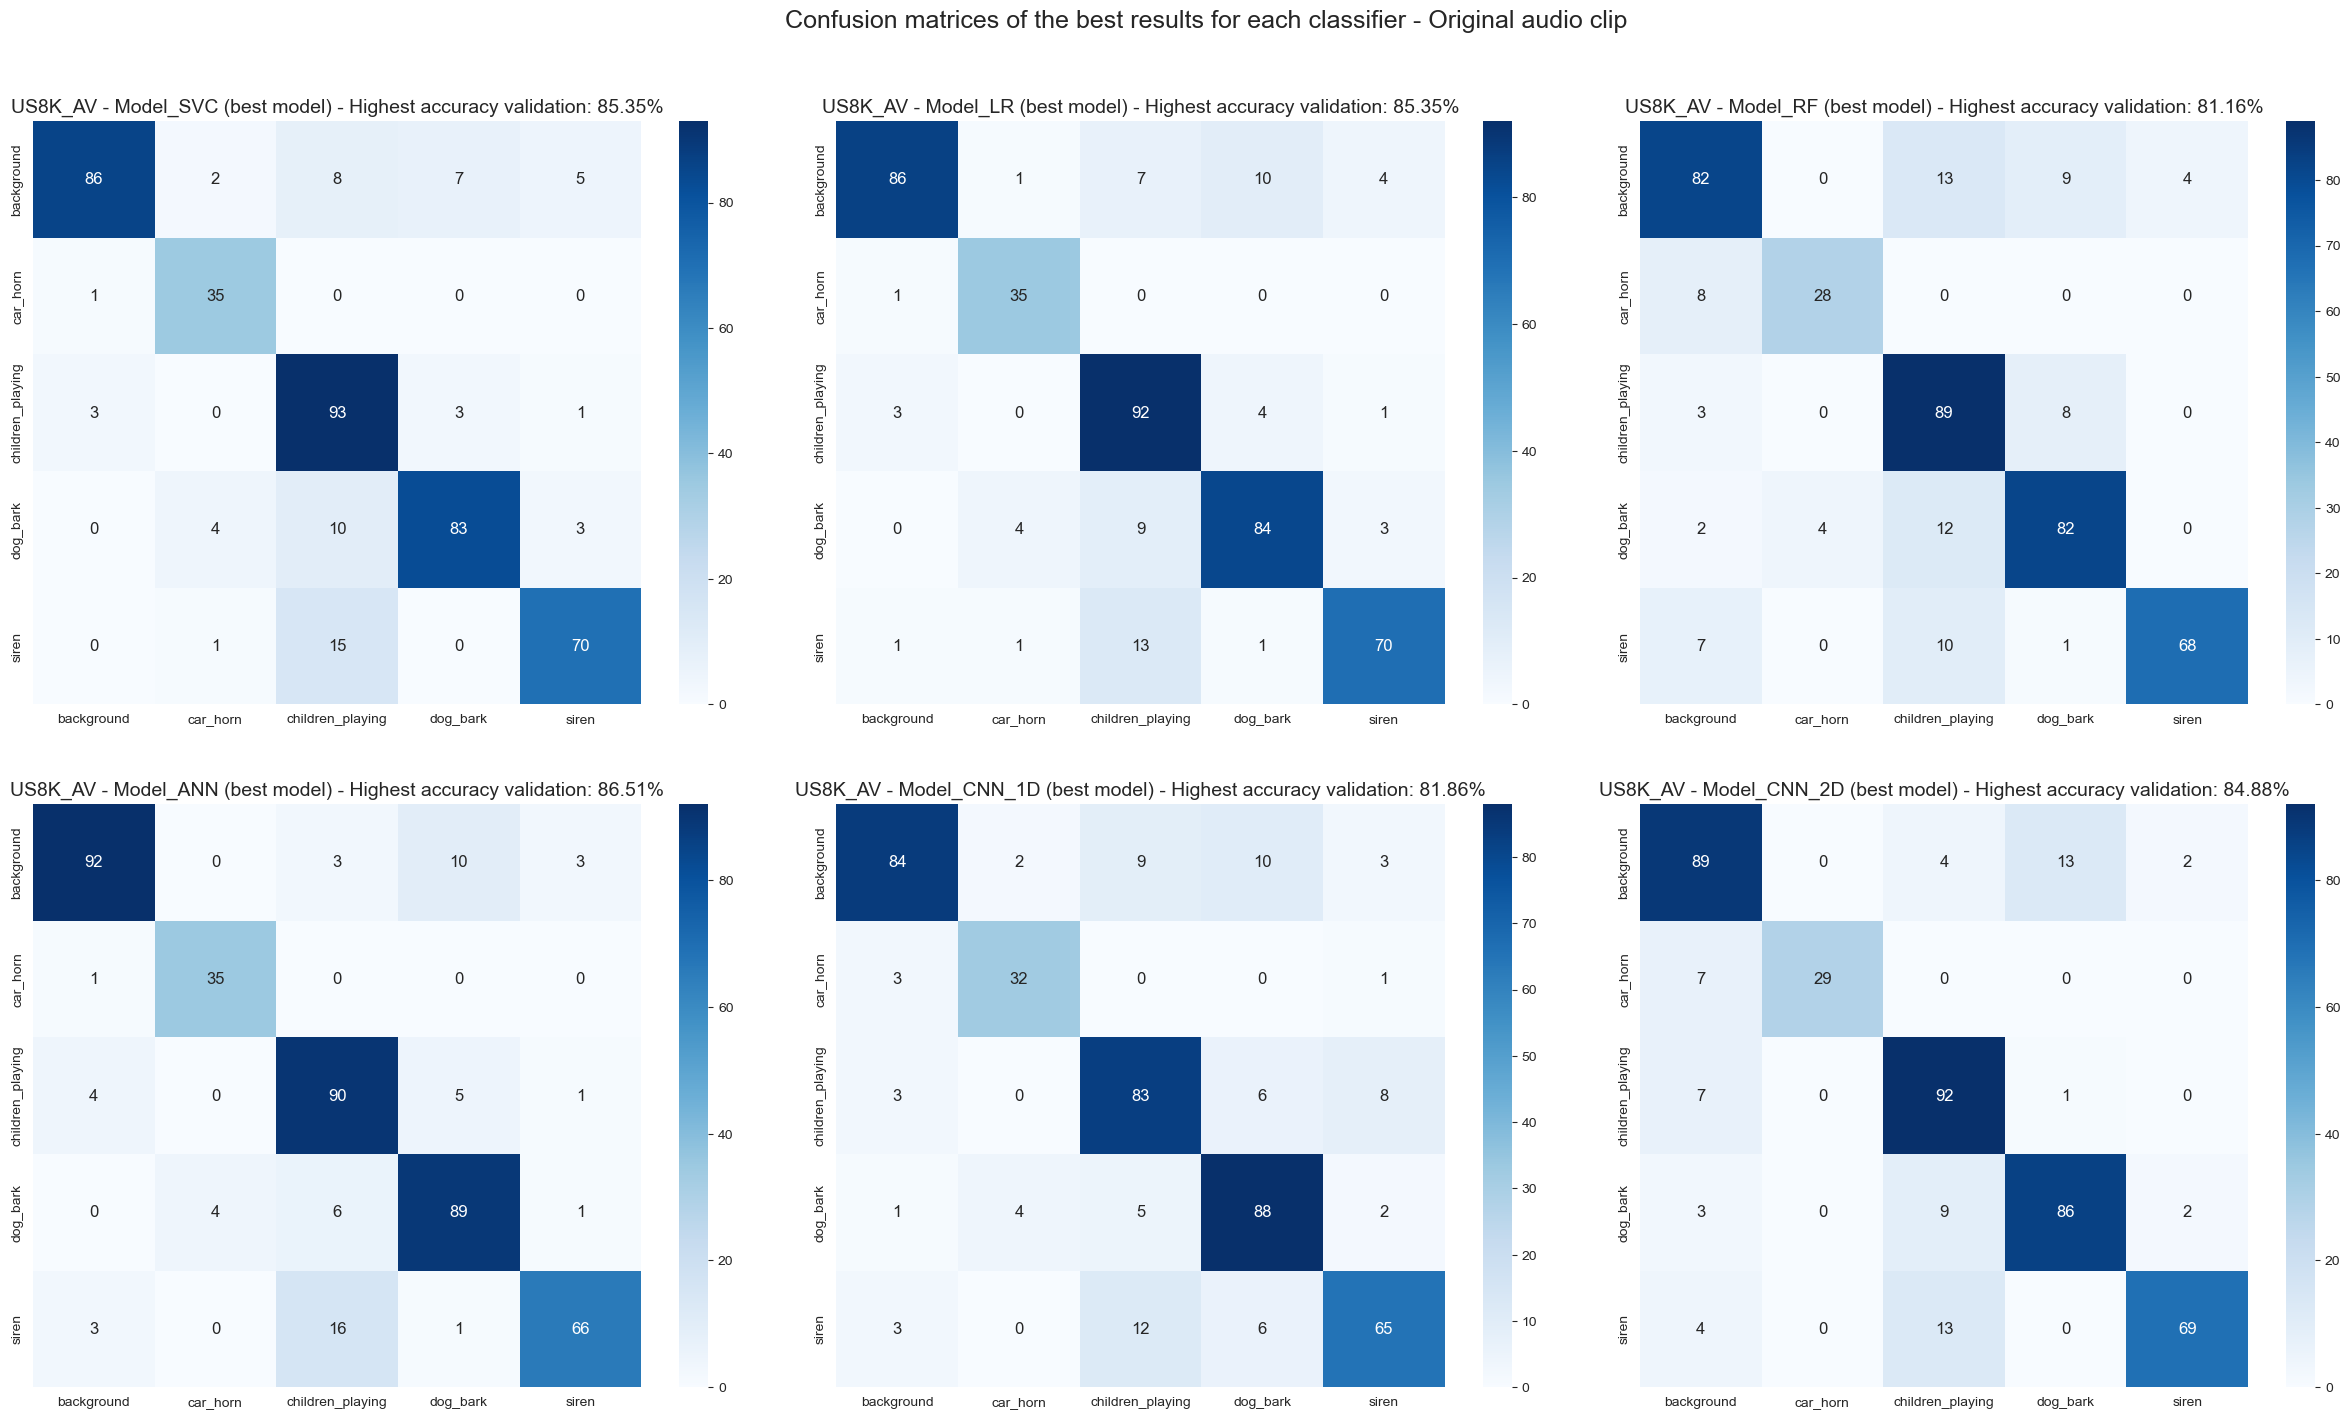

In [158]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

fig, axs = plt.subplots(2, 3, figsize=(25,15))
plt.suptitle('Confusion matrices of the best results for each classifier - Original audio clip', fontsize = 18,  y=0.97)

plot_confusion_matrix(y_val_audio_cat, 
                      predict_audio_dic['predict_audio_SVC'], 
                      audio_class_report_SVC_acc, 
                      cmap_cm, 
                      'Model_SVC_confusion_matrix',
                      ax=axs[0,0],
                      savepic = False)

plot_confusion_matrix(y_val_audio_cat, 
                      predict_audio_dic['predict_audio_LR'], 
                      audio_class_report_LR_acc, 
                      cmap_cm, 
                      'Model_LR_confusion_matrix',
                      ax=axs[0,1],
                      savepic = False)

plot_confusion_matrix(y_val_audio_cat, 
                      predict_audio_dic['predict_audio_RF'], 
                      audio_class_report_RF_acc, 
                      cmap_cm, 
                      'Model_RF_confusion_matrix',
                      ax=axs[0,2],
                      savepic = False)

plot_confusion_matrix(y_test_enc, 
                      predict_audio_dic['predict_audio_ANN'], 
                      audio_class_report_ANN_acc, 
                      cmap_cm, 
                      'Model_ANN_confusion_matrix',
                      ax=axs[1,0],
                      savepic = False)

plot_confusion_matrix(y_test_enc, 
                      predict_audio_dic['predict_audio_CNN1D'], 
                      audio_class_report_CNN1D_acc, 
                      cmap_cm, 
                      'Model_CNN_1D_confusion_matrix',
                      ax=axs[1,1],
                      savepic = False)

plot_confusion_matrix(y_test_enc,
                       predict_audio_dic['predict_audio_CNN2D'],
                       audio_class_report_CNN2D_acc,
                       cmap_cm,
                       'Model_CNN_2D_confusion_matrix',
                       ax=axs[1,2],
                       savepic = False)

plt.tight_layout(pad=4)
plt.savefig(os.path.join(path_pic, picture_name))
plt.show()

### Classification report per audio segment (windowed)

In [159]:
audioS_class_report_SVC = classification_report(y_val_cat,
                                                predict_audioClip_dic['predict_audioClip_SVC'],
                                                target_names=nom_classes,
                                               output_dict = True)
audioS_class_report_SVC_acc = audioS_class_report_SVC['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_SVC_acc*100:.2f}%\n')

audioS_class_report_SVC = metrics.classification_report(y_val_cat, 
                                                        predict_audioClip_dic['predict_audioClip_SVC'], 
                                                        target_names = nom_classes, 
                                                        output_dict = False)
print(audioS_class_report_SVC)

Accuracy for decision matrix: 81.83%

                  precision    recall  f1-score   support

      background       0.88      0.79      0.83       756
        car_horn       0.83      0.96      0.89       252
children_playing       0.73      0.85      0.78       700
        dog_bark       0.84      0.80      0.82       700
           siren       0.85      0.78      0.81       602

        accuracy                           0.82      3010
       macro avg       0.82      0.84      0.83      3010
    weighted avg       0.82      0.82      0.82      3010



In [160]:
audioS_class_report_LR = classification_report(y_val_cat,
                                               predict_audioClip_dic['predict_audioClip_LR'],
                                               target_names=nom_classes,
                                               output_dict = True)
audioS_class_report_LR_acc = audioS_class_report_LR['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_LR_acc*100:.2f}%\n')

audioS_class_report_LR = metrics.classification_report(y_val_cat, 
                                                       predict_audioClip_dic['predict_audioClip_LR'], 
                                                       target_names = nom_classes, 
                                                       output_dict = False)
print(audioS_class_report_LR)

Accuracy for decision matrix: 81.89%

                  precision    recall  f1-score   support

      background       0.90      0.77      0.83       756
        car_horn       0.84      0.96      0.89       252
children_playing       0.73      0.85      0.79       700
        dog_bark       0.82      0.81      0.81       700
           siren       0.85      0.79      0.82       602

        accuracy                           0.82      3010
       macro avg       0.83      0.84      0.83      3010
    weighted avg       0.83      0.82      0.82      3010



In [161]:
audioS_class_report_RF = classification_report(y_val_cat,
                                               predict_audioClip_dic['predict_audioClip_RF'],
                                               target_names=nom_classes,
                                               output_dict = True)
audioS_class_report_RF_acc = audioS_class_report_RF['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_RF_acc*100:.2f}%\n')

audioS_class_report_RF = metrics.classification_report(y_val_cat, 
                                                       predict_audioClip_dic['predict_audioClip_RF'], 
                                                       target_names = nom_classes, 
                                                       output_dict = False)
print(audioS_class_report_RF)

Accuracy for decision matrix: 80.56%

                  precision    recall  f1-score   support

      background       0.79      0.76      0.78       756
        car_horn       0.88      0.75      0.81       252
children_playing       0.72      0.85      0.78       700
        dog_bark       0.81      0.83      0.82       700
           siren       0.93      0.80      0.86       602

        accuracy                           0.81      3010
       macro avg       0.83      0.80      0.81      3010
    weighted avg       0.81      0.81      0.81      3010



In [162]:
y_test_encS = np.argmax(y_OHEV_val, axis=1)
y_test_encS

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [163]:
audioS_class_report_ANN = classification_report(y_test_encS, 
                                                predict_audioClip_dic['predict_audioClip_ANN'], 
                                                target_names=nom_classes,
                                                output_dict = True)
audioS_class_report_ANN_acc = audioS_class_report_ANN['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_ANN_acc*100:.2f}%\n')

audioS_class_report_ANN = classification_report(y_test_encS, 
                                                predict_audioClip_dic['predict_audioClip_ANN'], 
                                                target_names=nom_classes,
                                                output_dict = False)
print(audioS_class_report_ANN)

Accuracy for decision matrix: 82.19%

                  precision    recall  f1-score   support

      background       0.88      0.80      0.84       756
        car_horn       0.85      0.94      0.89       252
children_playing       0.75      0.85      0.80       700
        dog_bark       0.79      0.84      0.81       700
           siren       0.89      0.74      0.81       602

        accuracy                           0.82      3010
       macro avg       0.83      0.84      0.83      3010
    weighted avg       0.83      0.82      0.82      3010



In [164]:
audioS_class_report_CNN1D = classification_report(y_test_encS, 
                                                  predict_audioClip_dic['predict_audioClip_CNN1D'], 
                                                  target_names=nom_classes,
                                                  output_dict = True)
audioS_class_report_CNN1D_acc = audioS_class_report_CNN1D['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_CNN1D_acc*100:.2f}%\n')

audioS_class_report_CNN1D = classification_report(y_test_encS, 
                                                  predict_audioClip_dic['predict_audioClip_CNN1D'], 
                                                  target_names=nom_classes,
                                                  output_dict = False)
print(audioS_class_report_CNN1D)

Accuracy for decision matrix: 77.51%

                  precision    recall  f1-score   support

      background       0.83      0.73      0.78       756
        car_horn       0.84      0.88      0.86       252
children_playing       0.70      0.76      0.73       700
        dog_bark       0.76      0.85      0.80       700
           siren       0.80      0.71      0.75       602

        accuracy                           0.78      3010
       macro avg       0.79      0.79      0.78      3010
    weighted avg       0.78      0.78      0.77      3010



In [165]:
audioS_class_report_CNN2D = classification_report(y_test_encS, 
                                                  predict_audioClip_dic['predict_audioClip_CNN2D'], 
                                                  target_names=nom_classes,
                                                  output_dict = True)
audioS_class_report_CNN2D_acc = audioS_class_report_CNN2D['accuracy']
print(f'Accuracy for decision matrix: {audioS_class_report_CNN2D_acc*100:.2f}%\n')


audioS_class_report_CNN2D = classification_report(y_test_encS, 
                                                  predict_audioClip_dic['predict_audioClip_CNN2D'], 
                                                  target_names=nom_classes,
                                                  output_dict = False)
print(audioS_class_report_CNN2D)

Accuracy for decision matrix: 82.99%

                  precision    recall  f1-score   support

      background       0.79      0.80      0.79       756
        car_horn       0.95      0.82      0.88       252
children_playing       0.75      0.87      0.81       700
        dog_bark       0.85      0.85      0.85       700
           siren       0.93      0.81      0.87       602

        accuracy                           0.83      3010
       macro avg       0.86      0.83      0.84      3010
    weighted avg       0.84      0.83      0.83      3010



In [166]:
# Save the ground truth labels of the windowed audio (3,010 samples) as categorical an one hot encoder vector OHEV.

y_val_cat.tofile(os.path.join(path_arrays, '_y_val_audio_wind_cat.csv'), sep=',')
y_test_encS.tofile(os.path.join(path_arrays, '_y_val_audio_wind_enc.csv'), sep=',')

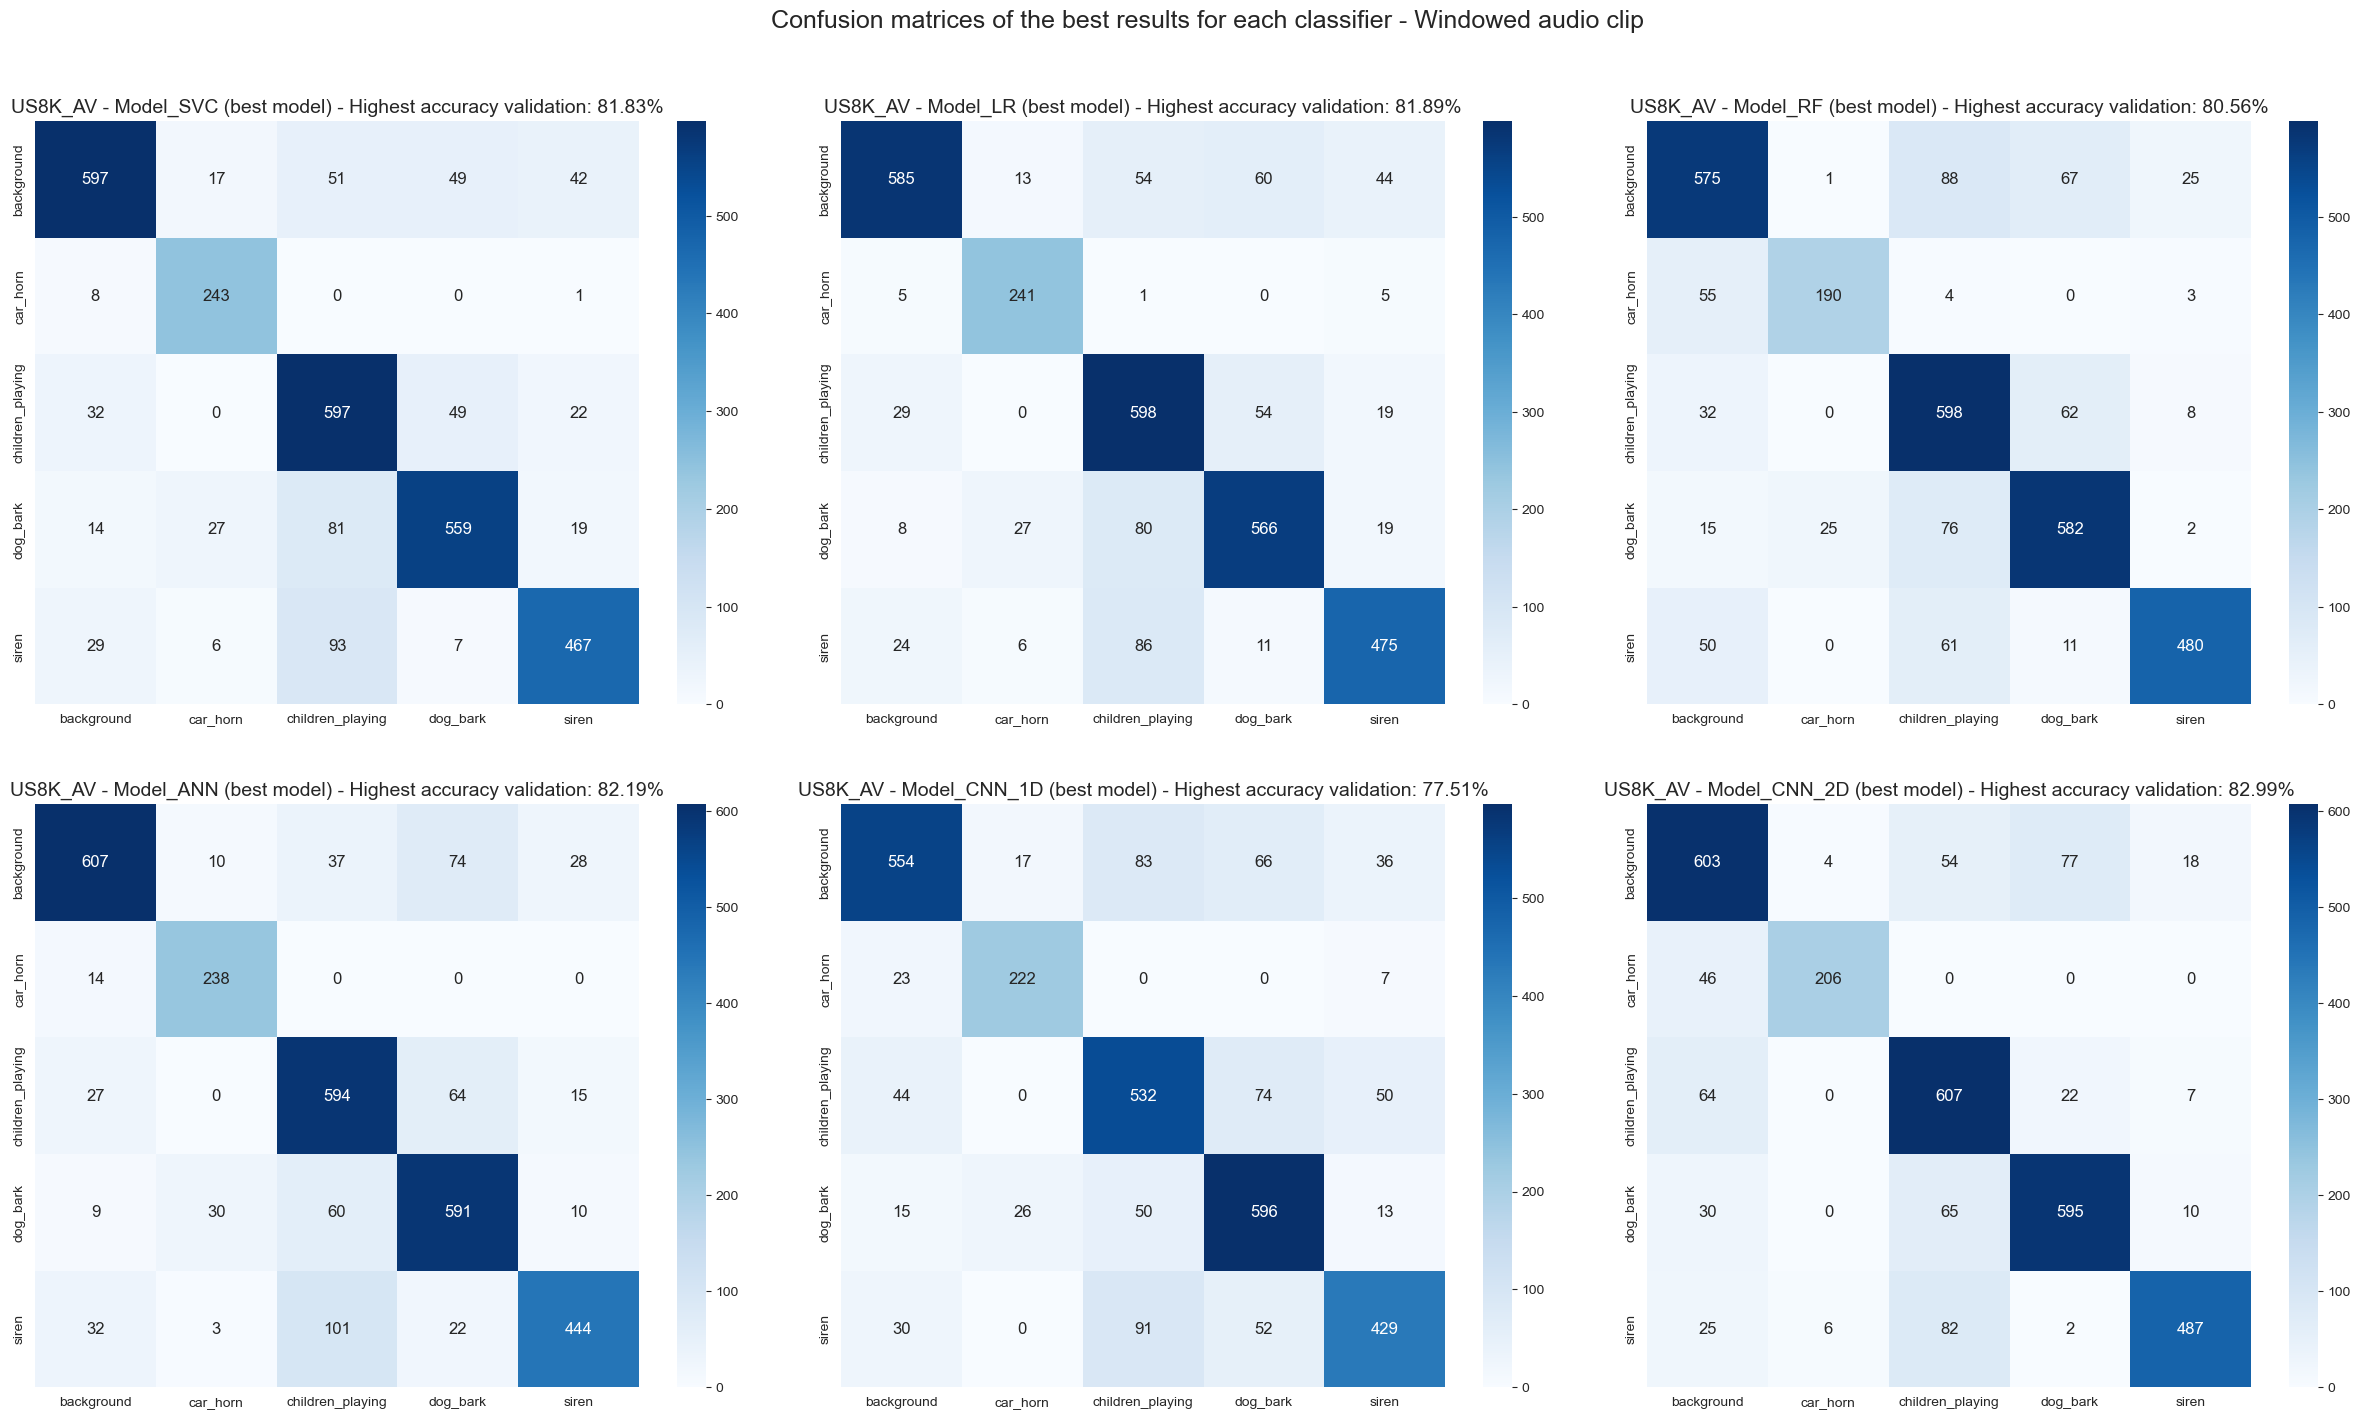

In [167]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

fig, axs = plt.subplots(2, 3, figsize=(25,15))
plt.suptitle('Confusion matrices of the best results for each classifier - Windowed audio clip', fontsize = 18,  y=0.97)

plot_confusion_matrix(y_val_cat, 
                      predict_audioClip_dic['predict_audioClip_SVC'], 
                      audioS_class_report_SVC_acc, 
                      cmap_cm, 
                      'Model_SVC_confusion_matrix',
                      ax=axs[0,0],
                      savepic = False)

plot_confusion_matrix(y_val_cat, 
                      predict_audioClip_dic['predict_audioClip_LR'], 
                      audioS_class_report_LR_acc, 
                      cmap_cm, 
                      'Model_LR_confusion_matrix',
                      ax=axs[0,1],
                      savepic = False)

plot_confusion_matrix(y_val_cat, 
                      predict_audioClip_dic['predict_audioClip_RF'], 
                      audioS_class_report_RF_acc, 
                      cmap_cm, 
                      'Model_RF_confusion_matrix',
                      ax=axs[0,2],
                      savepic = False)

plot_confusion_matrix(y_test_encS, 
                      predict_audioClip_dic['predict_audioClip_ANN'], 
                      audioS_class_report_ANN_acc, 
                      cmap_cm, 
                      'Model_ANN_confusion_matrix',
                      ax=axs[1,0],
                      savepic = False)

plot_confusion_matrix(y_test_encS, 
                      predict_audioClip_dic['predict_audioClip_CNN1D'], 
                      audioS_class_report_CNN1D_acc, 
                      cmap_cm, 
                      'Model_CNN_1D_confusion_matrix',
                      ax=axs[1,1],
                      savepic = False)

plot_confusion_matrix(y_test_encS,
                       predict_audioClip_dic['predict_audioClip_CNN2D'],
                       audioS_class_report_CNN2D_acc,
                       cmap_cm,
                       'Model_CNN_2D_confusion_matrix',
                       ax=axs[1,2],
                       savepic = False)

plt.tight_layout(pad=4)
plt.savefig(os.path.join(path_pic, picture_name))
plt.show()

# End of the notebook